# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

In [2]:
#!pip install dtale

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


import warnings
warnings.filterwarnings("ignore")


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

import dtale

## Data Overview

- Observations
- Sanity checks

In [4]:
# loading the dataset
visa = pd.read_csv("EasyVisa.csv")

In [5]:
# making a copy of the dataset
data = visa.copy()

In [6]:
# Function to perform the data overview: shape, info, describe, missing vakues, duplicates, head and tail

from IPython.display import display, HTML
def display_dataframe_info(data_display, df_name="Your Dataframe Name", title="Dataframe Information"):
    """
    Displays detailed information about a dataframe using IPython.display and formatting.

    Args:
        data_display: The Pandas DataFrame to analyze.
        title (optional): A title for the displayed information.
        df_name (optional): The name of the dataframe to display after the title.

    Returns:
        None
    """
    display(HTML(f"<h1 style='font-weight: bold'>{title} for {df_name}</h1>"))

    # Display shape, info and description

    display(HTML(f"<p style='font-weight: bold'>Shape:</p>"))
    display(data_display.shape)
    display(HTML(f"<p style='font-weight: bold'>Information:</p>"))
    display(data_display.info())
    display(HTML(f"<p style='font-weight: bold'>Description:</p>"))
    display(data_display.describe(include = "all").T)
    
    # Display head and tail

    display(HTML(f"<p style='font-weight: bold'>Head (First 5 rows):</p>"))
    display(data_display.head())
    display(HTML(f"<p style='font-weight: bold'>Tail (Last 5 rows):</p>"))
    display(data_display.tail())

    # Display duplicates

    duplicate_count = data_display.duplicated().sum()
    display(HTML(f"<p style='font-weight: bold'>Duplicates:</p>"))
    display(f"Number of duplicate rows: {duplicate_count}")

    # Optionally show specific duplicates

    if duplicate_count > 0:
        display(HTML(f"<p style='font-weight: bold'>Duplicate Rows:</p>"))
        display(data_display[data_display.duplicated()])
        
    # Display missing values

    display(HTML(f"<p style='font-weight: bold'>Missing Values:</p>"))
    missing_values_df = data_display.isnull().sum().reset_index(name="Count")
    missing_values_df["Percentage"] = (
        missing_values_df["Count"] / data_display.shape[0]
    ) * 100
    top_missing_values = missing_values_df.nlargest(10, "Count").rename(
        columns={"index": "Column Name"}
    )
    display(top_missing_values)


In [7]:
display_dataframe_info(data,"EasyVisa", "Work Visa Processing")

(25480, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


None

count unique         top   freq        mean  \
case_id                     25480  25480      EZYV01      1         NaN   
continent                   25480      6        Asia  16861         NaN   
education_of_employee       25480      4  Bachelor's  10234         NaN   
has_job_experience          25480      2           Y  14802         NaN   
requires_job_training       25480      2           N  22525         NaN   
no_of_employees       25480.00000    NaN         NaN    NaN  5667.04321   
yr_of_estab           25480.00000    NaN         NaN    NaN  1979.40993   
region_of_employment        25480      5   Northeast   7195         NaN   
prevailing_wage       25480.00000    NaN         NaN    NaN 74455.81459   
unit_of_wage                25480      4        Year  22962         NaN   
full_time_position          25480      2           Y  22773         NaN   
case_status                 25480      2   Certified  17018         NaN   

                              std        min         25%         50%  \
case_id                       NaN        NaN         NaN         NaN   
continent                     NaN        NaN         NaN         NaN   
education_of_employee         NaN        NaN         NaN         NaN   
has_job_experience            NaN        NaN         NaN         NaN   
requires_job_training         NaN        NaN         NaN         NaN   
no_of_employees       22877.92885  -26.00000  1022.00000  2109.00000   
yr_of_estab              42.36693 1800.00000  1976.00000  1997.00000   
region_of_employment          NaN        NaN         NaN         NaN   
prevailing_wage       52815.94233    2.13670 34015.48000 70308.21000   
unit_of_wage                  NaN        NaN         NaN         NaN   
full_time_position            NaN        NaN         NaN         NaN   
case_status                   NaN        NaN         NaN         NaN   

                               75%          max  
case_id                        NaN          NaN  
continent                      NaN          NaN  
education_of_employee          NaN          NaN  
has_job_experience             NaN          NaN  
requires_job_training          NaN          NaN  
no_of_employees         3504.00000 602069.00000  
yr_of_estab             2005.00000   2016.00000  
region_of_employment           NaN          NaN  
prevailing_wage       107735.51250 319210.27000  
unit_of_wage                   NaN          NaN  
full_time_position             NaN          NaN  
case_status                    NaN          NaN

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0        592.20290         Hour                  Y      Denied  
1      83425.65000         Year                  Y   Certified  
2     122996.86000         Year                  Y      Denied  
3      83434.03000         Year                  Y      Denied  
4     149907.39000         Year                  Y   Certified

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South      77092.57000         Year                  Y   
25476            Northeast     279174.79000         Year                  Y   
25477                South     146298.85000         Year                  N   
25478                 West      86154.77000         Year                  Y   
25479              Midwest      70876.91000         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

'Number of duplicate rows: 0'

Column Name  Count  Percentage
0                case_id      0     0.00000
1              continent      0     0.00000
2  education_of_employee      0     0.00000
3     has_job_experience      0     0.00000
4  requires_job_training      0     0.00000
5        no_of_employees      0     0.00000
6            yr_of_estab      0     0.00000
7   region_of_employment      0     0.00000
8        prevailing_wage      0     0.00000
9           unit_of_wage      0     0.00000

##### Observations
1.  There are 25,480 rows of data and 12 columns (attributes).
2.  There are no missing values.
3.  There are no duplicated rows.
4.  From data info:
   > 1. We see that every column has 25,480 non-null values (hence no missing values).
     2. There are 3 numeric variables (1 float and 2 integer) and 9 object variables.
1. From the data description:
   > 1. `case_id`, is the unique identifier for each booking.
   > 2.  There are 6 unique continent values, the most frequent is Asia with 16861 visa applications
   > 3.  There are 4 unique values for `education_of_employee`, with Bachelor's being the most common with 10234 applications with Bachelor's
   > 4.  `has_job_experience` has 2 unique values.  Y is the most common with 14, 802 applications having job experience
   > 5.  `requires_job_training` has 2 uniquer values with 22,525 applications not requiring job training
   > 6.  The average number of employees is 5667 with the minimum being -26.  This needs further investigation.
   > 7.  The average `yr_of_estab` is 1979.  The minimum being 1800 and the maximum being 2016
   > 8.  There are 5 unique `region_of_employment`.  Northeast is the most popular with 7195 applications for this region
   > 9.  The average `prevailing_wage` is 74,455 with a minimum of 2.31 and a maximum of 319,210
   > 10.  There are 4 unique values for `unit_of_wage`.  Year is the most frequent with 22,962 applications with yearly salaries
   > 11.  There are 2 unique values for `full_time_position`.  Y is the most popular with 22,773 applications for jobs with full time positions
   > 12.  There are 2 unique values for `case_status`, Certified is the most frequent with 17 018 applications being certified

#### Fixing datatypes
> Converting "objects" to "category" reduces the data space required to store the dataframe

In [8]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [9]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


> We see that the oject data types have been converted to category and the file size reduced from 2.3+MB to 2.0MB

**Dropping columns which are not adding any information.**
> We are dropping the case_id column as this is the unique values for each case and does not add any value to building the model

In [11]:
data.drop(['case_id'],axis=1,inplace=True)

**Let's look at the unique values of all the categories**

In [12]:
cols_cat= data.select_dtypes(['category'])

In [13]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
Unique values in region_of_employment are :
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
*******

In [14]:
# making a copy of the dataset
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
   >High school has the highest rate of work visa cancellations.  Doctorate has the highest rate of work visa certifications. 34% of applications with high school education was approved, 66% of applications with bachelors was approved, 78% of applications with masters education was approvedand 87% of applications with Docotrate education was approved.  The higher the level the education the higher the rate of approval.  

3. How does the visa status vary across different continents?
 > South America has the highest rate of denials with 58% denials. The highest rate of certification is from Europe with 79%, Africa with 72% and Asia with 65%.  66% of the overall applications are from Asia. 

5. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
>  Applicants without experience have a higher rate of being denied, 56%.  75% of applications with experience have been certified

7. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
>Applications with hourl rate of pay has the highest rate of being denied 34%.  Applications with yearly rate of pay has the highest rate of certifications, with 70%
8. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
>Certified visas have a higher average prevailing wage.

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

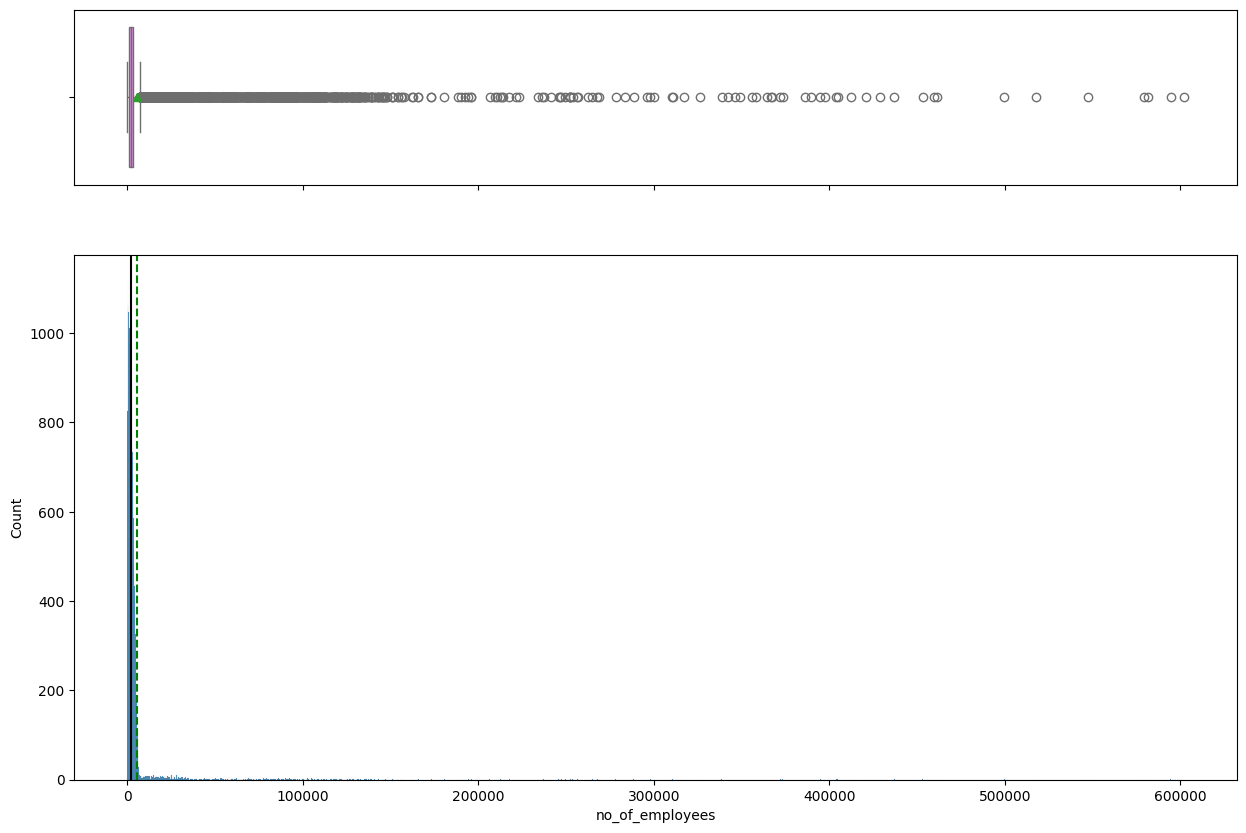

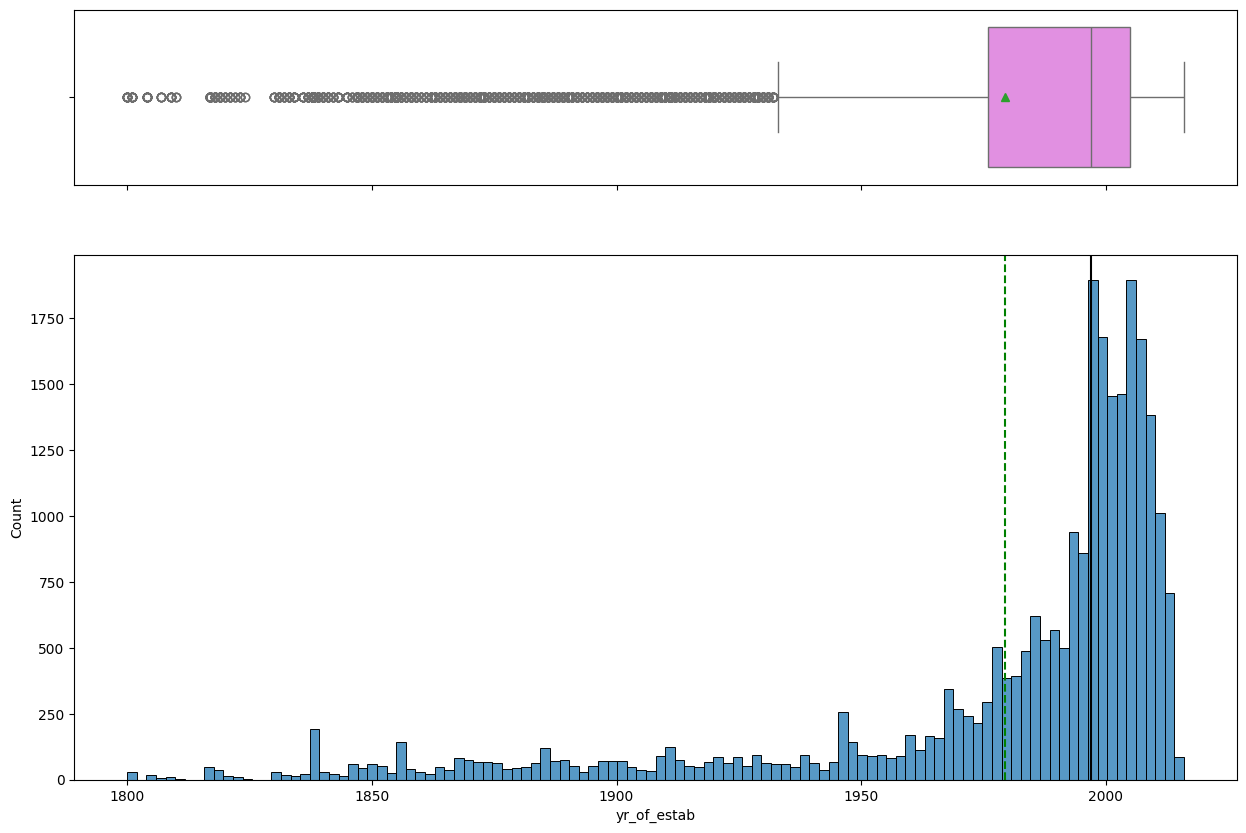

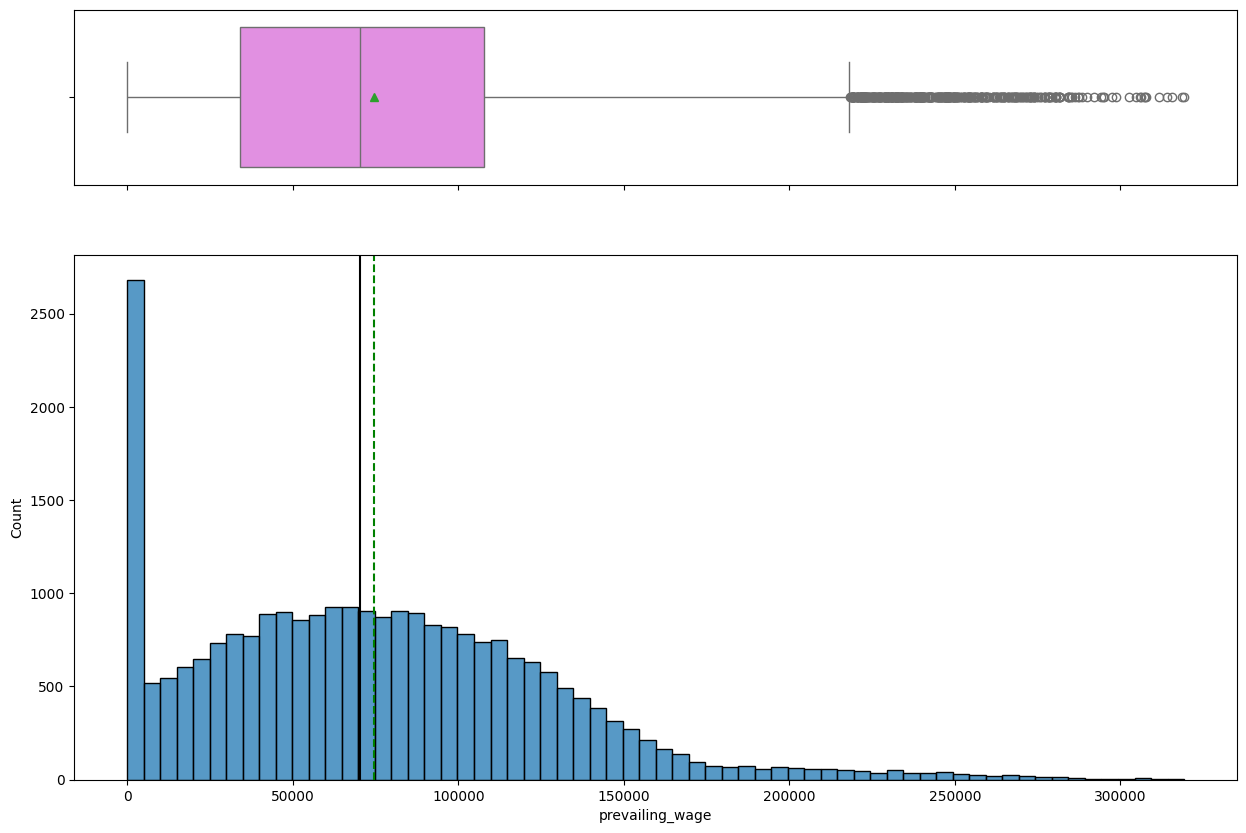

In [19]:
# loop to plot histogram_plot for numeric variables
num_cols = df.select_dtypes(include = np.number).columns
for col in num_cols:
    histogram_boxplot(df, col)

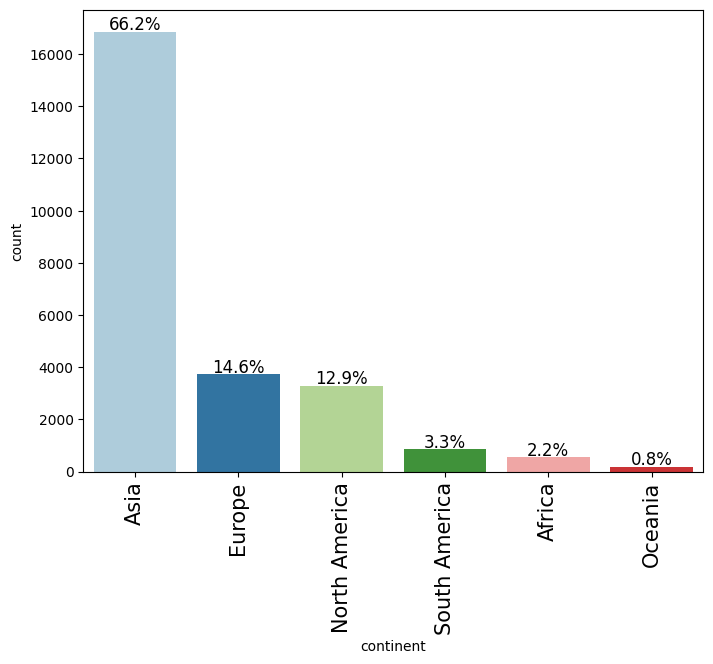

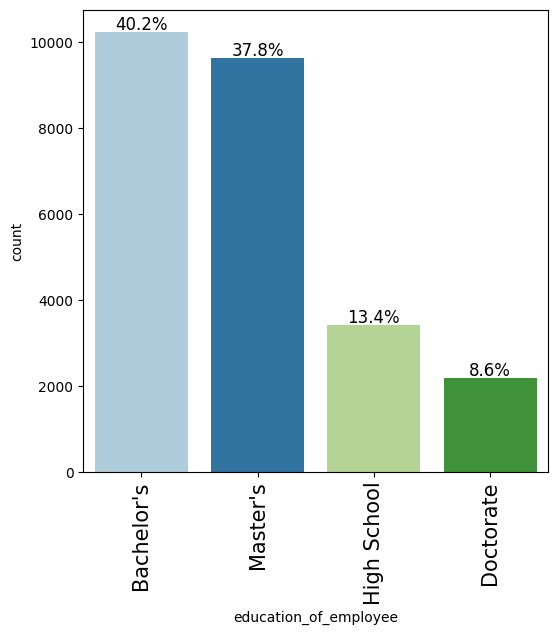

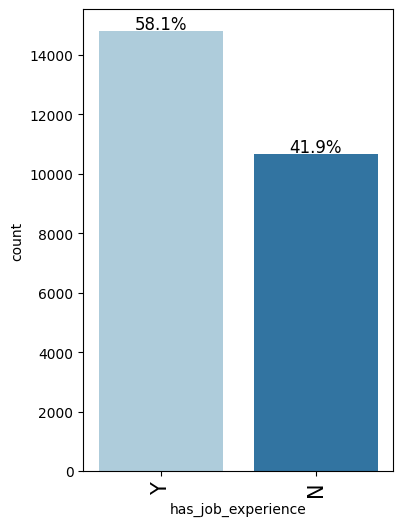

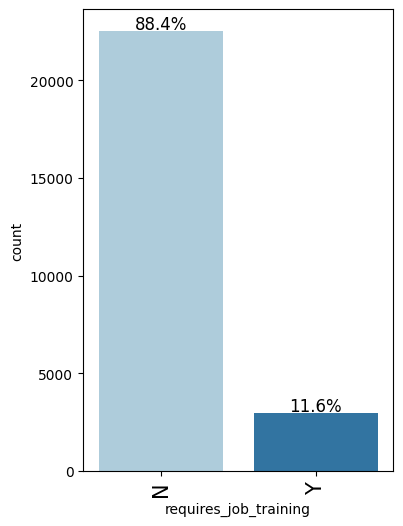

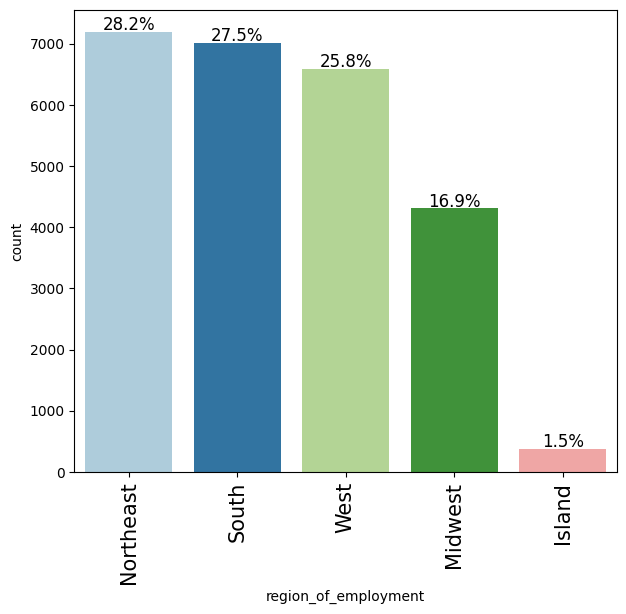

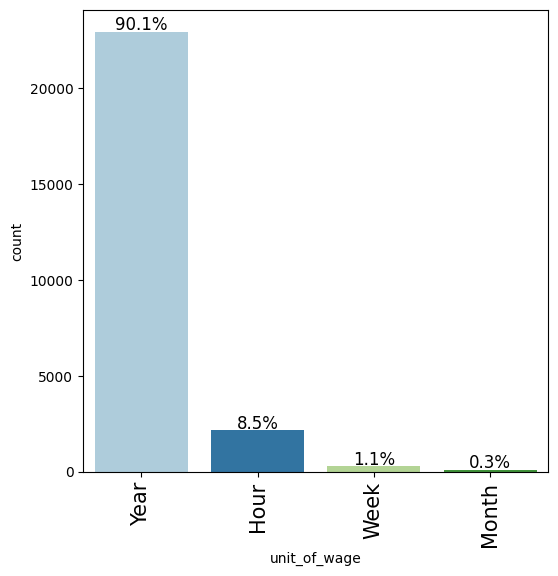

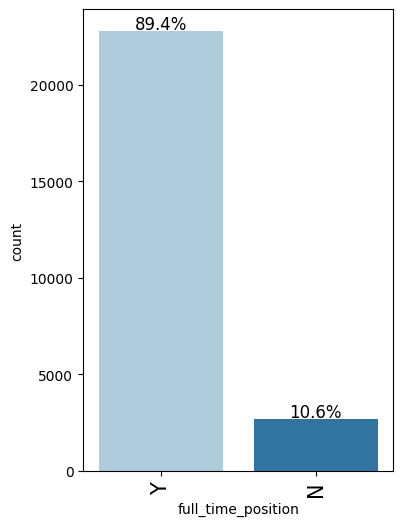

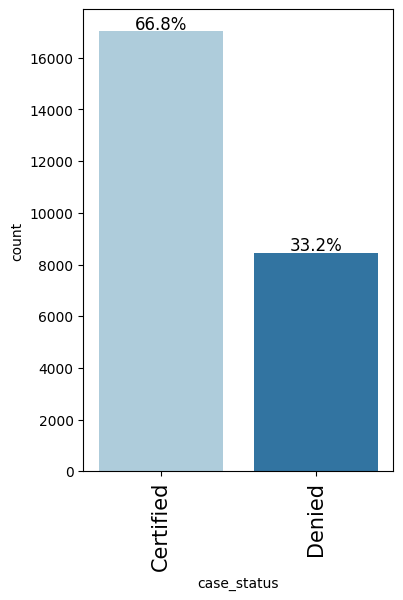

In [20]:
# loop to plot labeled_barplot for non-numeric variables
non_num_cols = df.select_dtypes(exclude = np.number).columns
#X = df1.drop(["normalized_used_price"], axis=1)
for col in non_num_cols:
    labeled_barplot(df, col, perc=True)

#### examining `no_of_employees` to see why some have negative values

In [21]:
df[(df["no_of_employees"]<=0)].reset_index()

index      continent education_of_employee has_job_experience  \
0     245         Europe              Master's                  N   
1     378           Asia            Bachelor's                  N   
2     832  South America              Master's                  Y   
3    2918           Asia              Master's                  Y   
4    6439           Asia            Bachelor's                  N   
5    6634           Asia            Bachelor's                  Y   
6    7224         Europe             Doctorate                  N   
7    7281           Asia           High School                  N   
8    7318           Asia            Bachelor's                  Y   
9    7761           Asia              Master's                  N   
10   9872         Europe              Master's                  Y   
11  11493           Asia           High School                  Y   
12  13471  North America              Master's                  N   
13  14022           Asia            Bachelor's                  N   
14  14146           Asia            Bachelor's                  N   
15  14726           Asia              Master's                  N   
16  15600           Asia            Bachelor's                  N   
17  15859           Asia           High School                  N   
18  16157           Asia              Master's                  Y   
19  16883  North America            Bachelor's                  Y   
20  17006           Asia             Doctorate                  Y   
21  17655  North America            Bachelor's                  Y   
22  17844           Asia            Bachelor's                  N   
23  17983           Asia            Bachelor's                  N   
24  20815           Asia            Bachelor's                  N   
25  20984         Europe             Doctorate                  Y   
26  21255  North America           High School                  N   
27  21760           Asia            Bachelor's                  Y   
28  21944         Africa              Master's                  Y   
29  22084  North America            Bachelor's                  Y   
30  22388           Asia              Master's                  Y   
31  23186           Asia              Master's                  N   
32  23476         Europe              Master's                  Y   

   requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                      N              -25         1980            Northeast   
1                      Y              -11         2011            Northeast   
2                      N              -17         2002                South   
3                      N              -26         2005              Midwest   
4                      N              -14         2013                South   
5                      N              -26         1923                 West   
6                      N              -25         1998              Midwest   
7                      N              -14         2000              Midwest   
8                      Y              -26         2006                South   
9                      N              -11         2009              Midwest   
10                     N              -26         1996                South   
11                     N              -14         1999                South   
12                     N              -17         2003            Northeast   
13                     Y              -11         1946            Northeast   
14                     Y              -26         1954                 West   
15                     N              -11         2000              Midwest   
16                     N              -14         2014                South   
17                     N              -11         1969                South   
18                     N              -11         1994                South   
19                     N              -26         1968            Northeast  

>  There are 33 applications where the number of employees is less than or equal to 0.  The negative sign can be a data entry error.  We can fix this column by imputing with the absolute value.

In [22]:
# Calculating the absolute value of the no_of_employees column to remove the negative numbers
df['no_of_employees']= abs(df['no_of_employees'])

In [23]:
# checking in the number of applications with a negative no_of_employees is 0
df[(df["no_of_employees"]<=0)].reset_index()

Empty DataFrame
Columns: [index, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []

>  The negative values in the `no_of_employees` column have been removed

#### Observations
1.  Numeric Variables
   >1 `no_of_employees` is right skewed, with the majority less than 3504.  There are outliers
>2 `yr_of_estab` is left skewed with a mean of approx 1979.  There are outliers
>3. `prevailing_wage` is right skewed.  It is bimodal,  one peak is close to 0 which can indicate the hourly rate and another peak at 75, 000.  There are outliers
2.  Non-Numeric
>1.  'continent': The most common continent is Asia with 66.2% of the applications.  The least common is Oceania with 0.8%
>2.  `education_of_employee`: 40.2% of the visa applications have a Bachelor's degree, followed by 37.80% with a Master's.  The least amount of visa applications are for Doctorates with 8.6%
>3.  `has_job_experience`: The majority of applicants, 58.1%, have job experience
>4.  `requires_job_training`:nOnly 11.6% of the applicants require job training.
>5.  `region_of_employment`: 28.2%, 27.5% and 25.8% of the applications ar for the Northeast, South and West regions respectively.  The island region has the least ampiunt of applications with 1.5%
>6.  `unit_of_wage`:  The majority of applications had a yearly unit of wage with 90.1%.  Hourly wage was 8.5%, weekly was 1.1% and monthly was 0.3%.
>7.  `full_time_position`:  89.4%of the visa applications was for full time positions'
>8.  `case_status`: This is the target variable with 66.8% certified and 33.2% was not certified

### Bivariate and Multivariate analysis

### Correlation Check

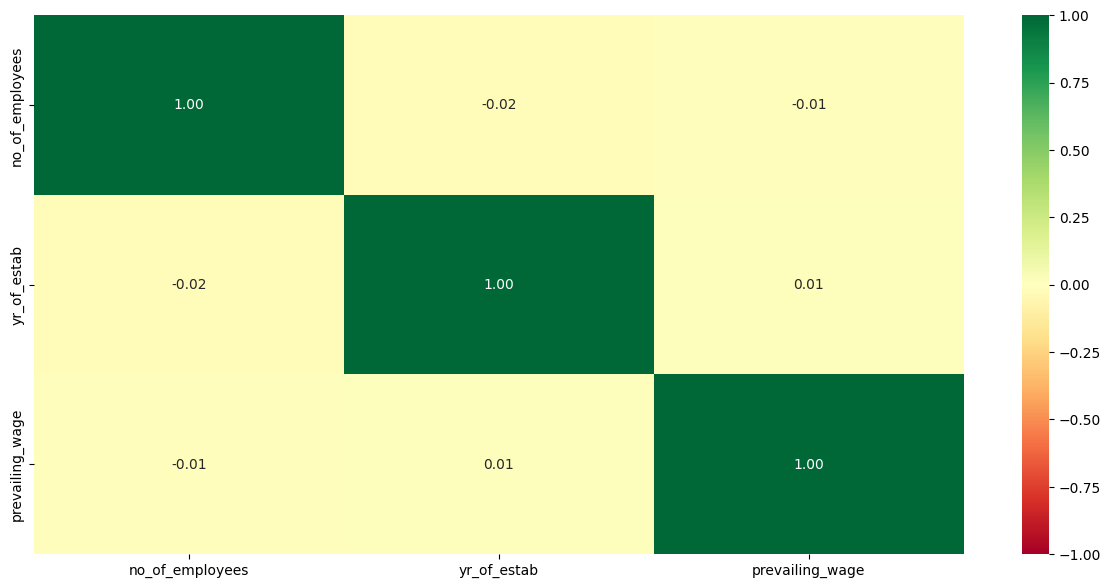

In [24]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdYlGn"
)
plt.show()

>  There is no correlation amongst the numeric variables

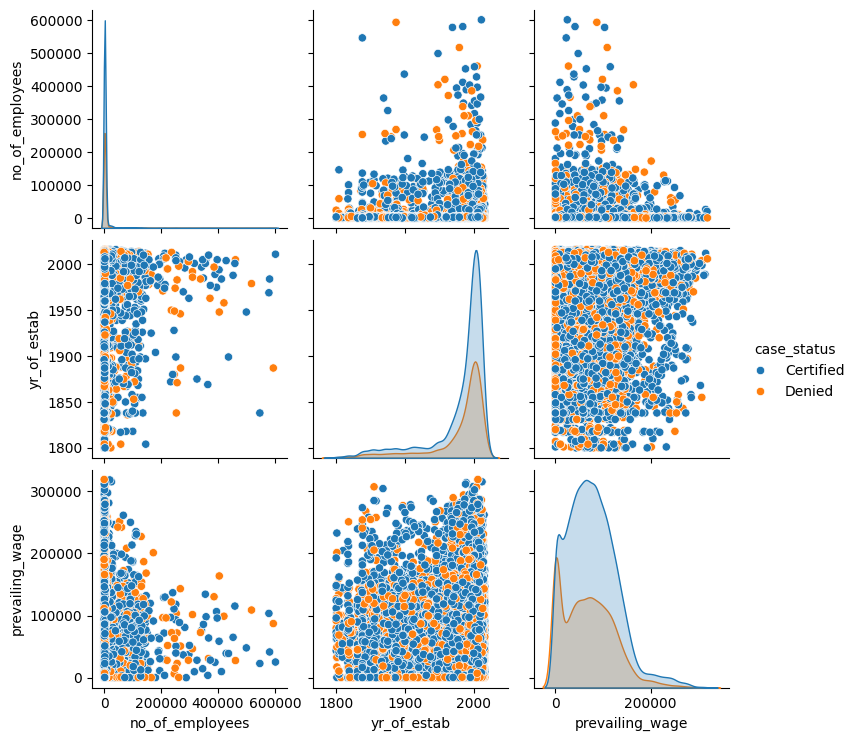

In [25]:
sns.pairplot(df,hue='case_status')
plt.show()

#### `case_status` vs `continent`

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


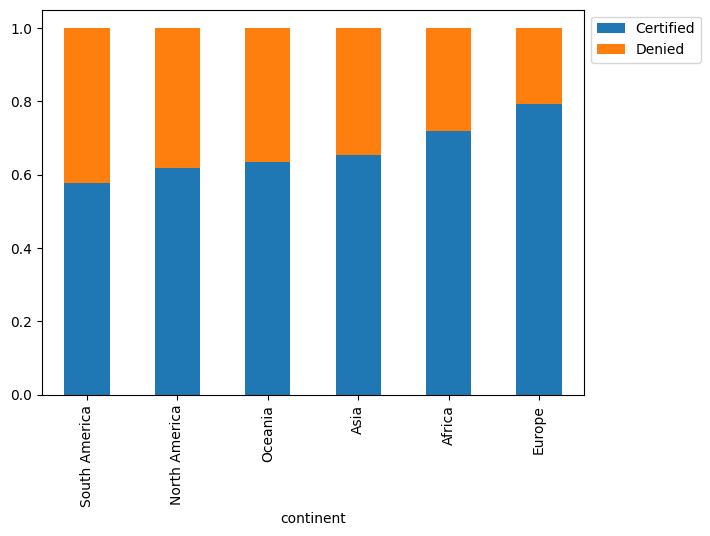

In [26]:
stacked_barplot(df, "continent", "case_status")

> 1. South American has the highest rate of denied work visas, followed by North America and Oceania.
> 3. Europe has the highest rate for certified visas.
> 4. In terms of numbers, Asia has the highest number of certified visas with approx. 11,000 of the 17,000 certified visas coming from Asia.  Asia also has the largest number of visa applicatins with 16,861 visa applications
> 5. In terms of numbers, Oceania has the least number of certified visas with approx. 122 of the 17,000 certified visas coming from Oceania.  Oceania also has the least number of visa applications with 192 visa applications

#### `case_status` vs `education_of_employee`

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


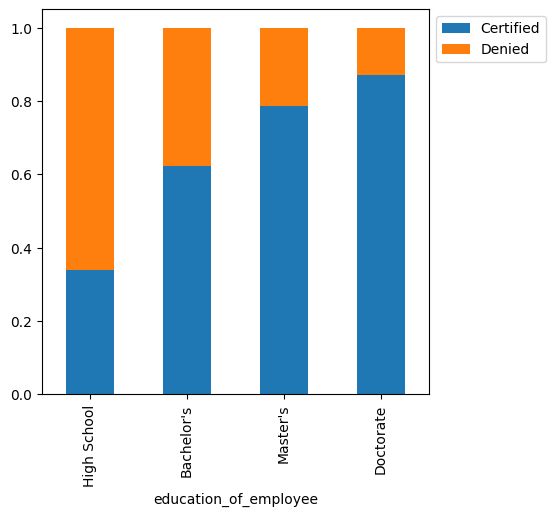

In [27]:
stacked_barplot(df, "education_of_employee", "case_status")

> 1. High School has the lowest rate of certified visas, Doctorate has the highest rate of certified visas
> 2. In terms of numbers, Bachelors has the largest amount of visas applications with 10,234 visas being applied for and 6,367 of the visas being approved
> 3. In terms of numbers, Doctorate had the smallest number of visa applications with 2192 visas being applied for, of this 1912 was approved

#### `case_status` vs `has_job_experience`

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


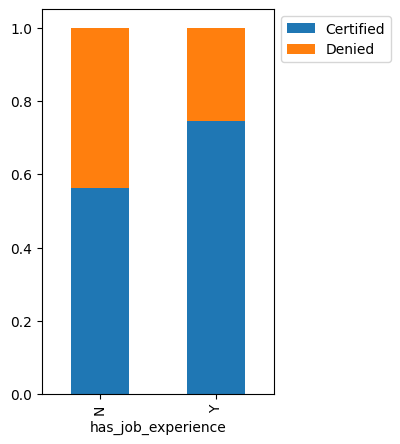

In [28]:
stacked_barplot(df, "has_job_experience", "case_status")

> 1. Those who have job experience have a higher rate of having their work visa certified
> 2. In terms of numbers, approx 14,000 applications had job experience.  approx 11,000 of these was certified.

#### `case_status` vs `requires_job_training`

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


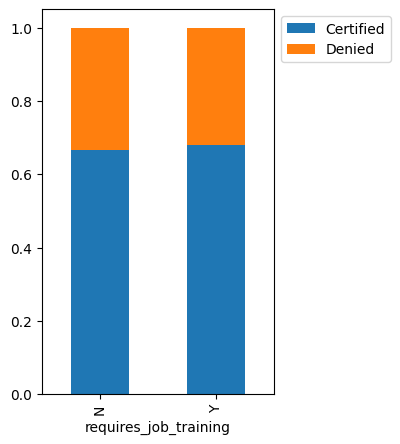

In [29]:
stacked_barplot(df, "requires_job_training", "case_status")

> 1.  Applications which requires job training have a slightly higher rate of certified visas than those which requires training
> 2.  In terms of numbers, approx 22,500 applications did not require job training,  of this approx 15,000 was certified.
> 3.  In terms of numbers, approx 3000 applications required job training and of this approx 2000 was certified.

#### `case_status` vs `no_of_employees`

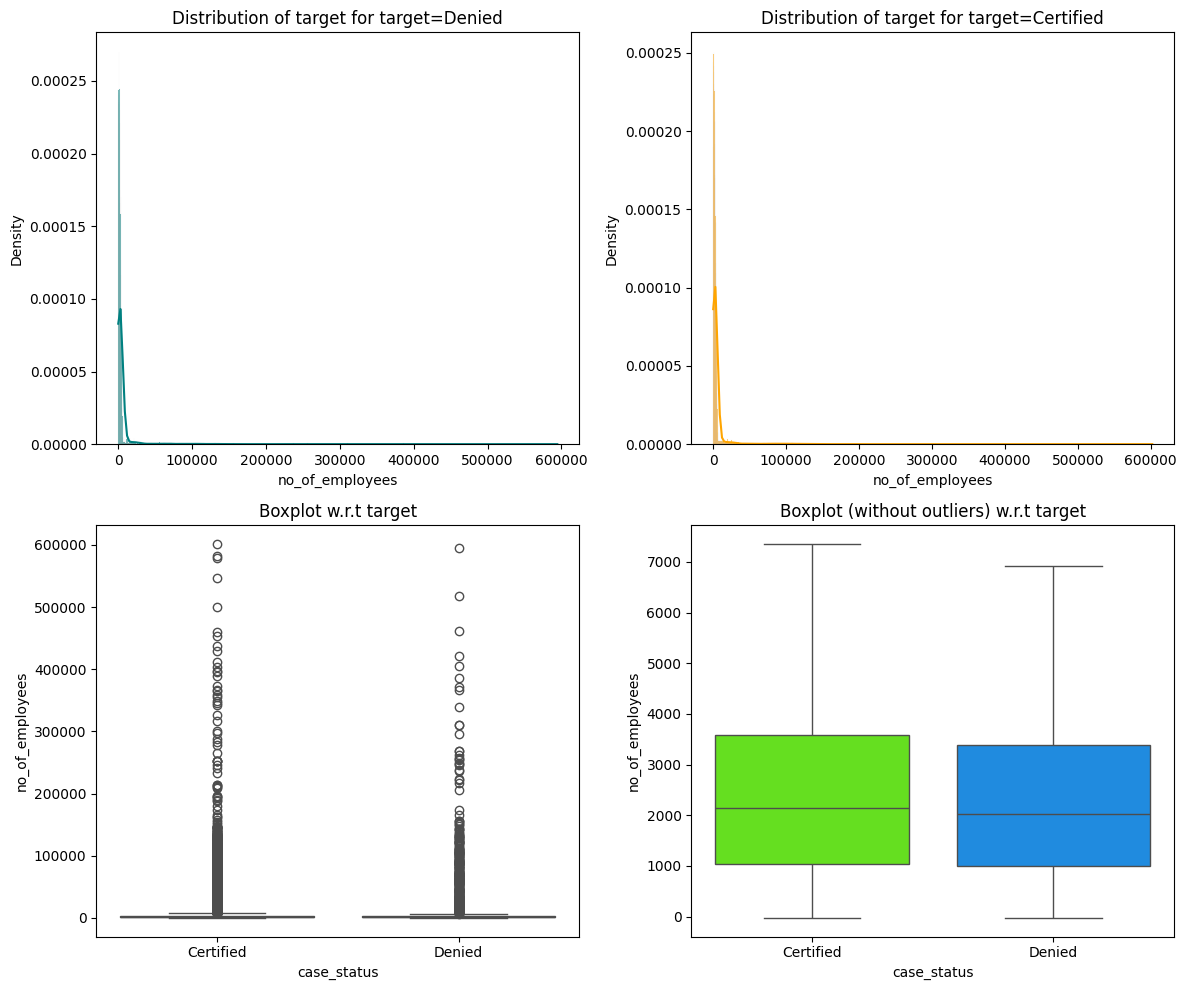

In [30]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

> 1.  In general, work visa applications which was certified tend to have a higher number of employees
> 2.  The majority of applications had less than approx 3500 employees
> 3.  Both certified and denied visa applications were from companies which had a lrage number of employees, 10,000 to approx 60,000 employees 

#### `case_status` vs `yr_of_estab`

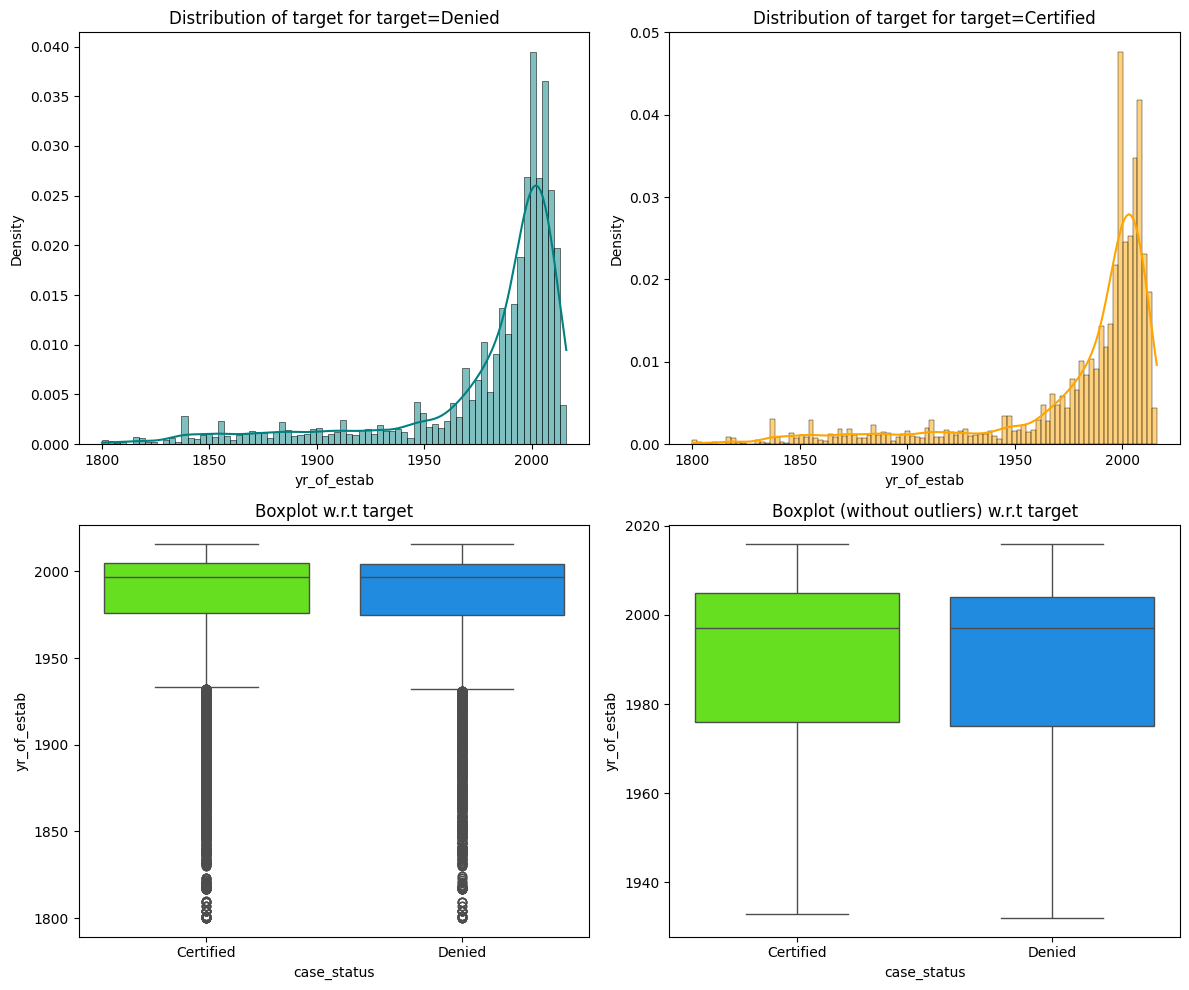

In [31]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

> 1.  We can see that most of the applications are made from companies which were established after about 1975

#### `case_status` vs `region_of_employment`

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


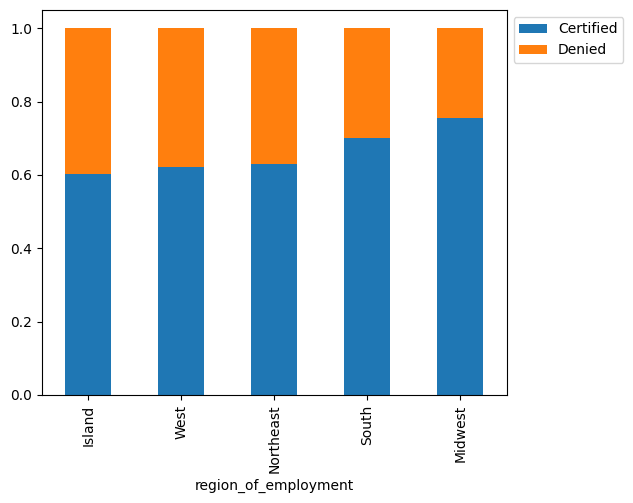

In [32]:
stacked_barplot(df, "region_of_employment", "case_status")

> 1.  The highest rate of work visa certifications are for Midwest.  The lowest rate of work vis certifictions is for Island
> 2.  In terms of numbers, Northeast had the largest number of visa applications with 7195 applications, with approx 4,500 certified.
> 3.  In terms of numbers Island has the smallest number of visa applications with 375 applications, with 226 being certified.

#### `case_status` vs `prevailing_wage`

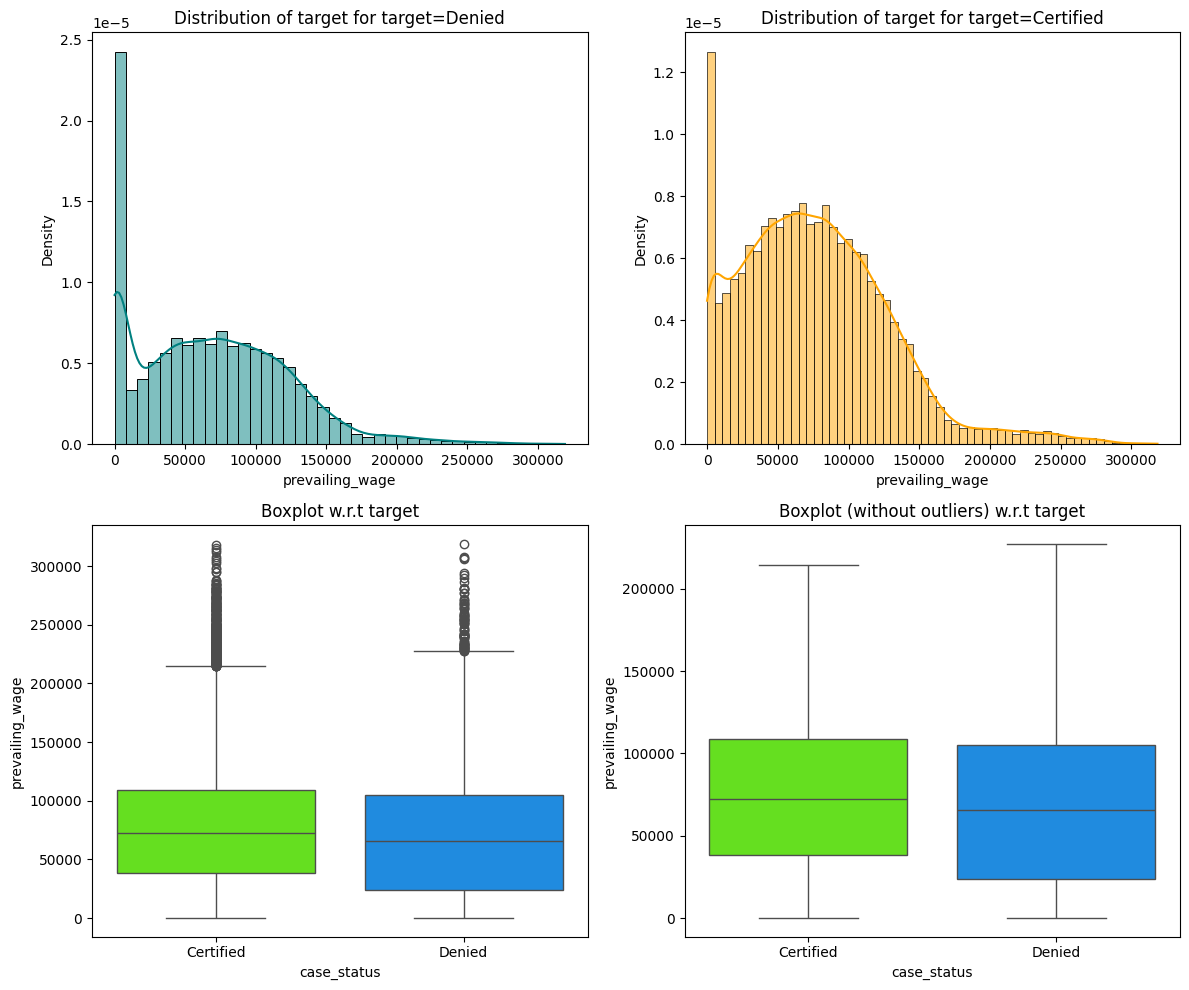

In [33]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

<Figure size 1200x900 with 0 Axes>

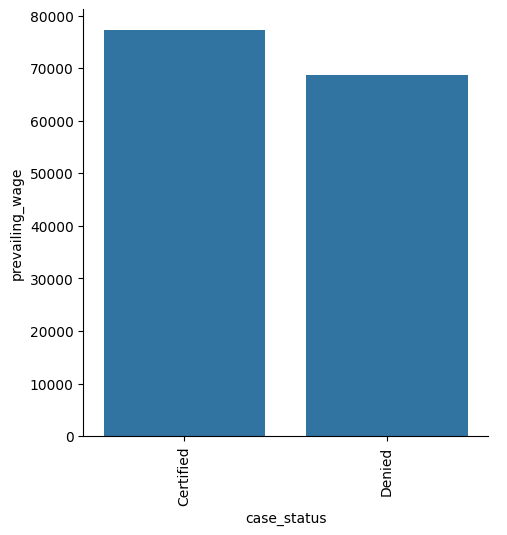

In [34]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'case_status' , y = 'prevailing_wage', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

<Figure size 1200x900 with 0 Axes>

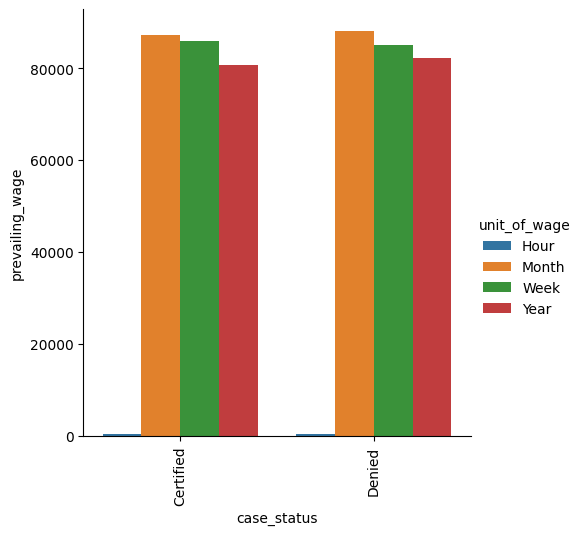

In [35]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'case_status' , y = 'prevailing_wage', kind = "bar" , hue="unit_of_wage" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

In [36]:
df[(df["unit_of_wage"]=="Hour")].reset_index()

index      continent education_of_employee has_job_experience  \
0         0           Asia           High School                  N   
1         7  North America            Bachelor's                  Y   
2        54           Asia              Master's                  Y   
3        62           Asia           High School                  N   
4        70           Asia           High School                  Y   
...     ...            ...                   ...                ...   
2152  25444  South America              Master's                  Y   
2153  25450           Asia            Bachelor's                  N   
2154  25461           Asia              Master's                  Y   
2155  25465  North America           High School                  N   
2156  25470  North America              Master's                  Y   

     requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                        N            14513         2007                 West   
1                        N             3035         1924                 West   
2                        N            11733         1995            Northeast   
3                        N             5110         2004                 West   
4                        N             1320         2001            Northeast   
...                    ...              ...          ...                  ...   
2152                     N             1081         1838            Northeast   
2153                     N             3312         2009            Northeast   
2154                     N             2861         2004                 West   
2155                     N             2577         1995                South   
2156                     N             2272         1970            Northeast   

      prevailing_wage unit_of_wage full_time_position case_status  
0           592.20290         Hour                  Y      Denied  
1           418.22980         Hour                  Y      Denied  
2           230.80720         Hour                  Y   Certified  
3           103.22160         Hour                  Y      Denied  
4           230.32700         Hour                  Y      Denied  
...               ...          ...                ...         ...  
2152        156.60700         Hour                  Y   Certified  
2153        682.10480         Hour                  Y      Denied  
2154         54.91960         Hour                  Y      Denied  
2155        481.22380         Hour                  Y   Certified  
2156        516.41010         Hour                  Y   Certified  

[2157 rows x 12 columns]

In [37]:
df[(df["unit_of_wage"]=="Week")].reset_index()

index      continent education_of_employee has_job_experience  \
0      113  North America           High School                  Y   
1      116           Asia            Bachelor's                  Y   
2      169           Asia              Master's                  N   
3      243  North America              Master's                  N   
4      365           Asia             Doctorate                  Y   
..     ...            ...                   ...                ...   
267  24762           Asia            Bachelor's                  Y   
268  24776           Asia              Master's                  Y   
269  25114  North America            Bachelor's                  Y   
270  25409           Asia              Master's                  Y   
271  25432           Asia            Bachelor's                  Y   

    requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                       N             1019         2005                South   
1                       N              509         1997                South   
2                       N              373         1992                 West   
3                       N             1720         1995            Northeast   
4                       N            70113         1897            Northeast   
..                    ...              ...          ...                  ...   
267                     N              979         1919            Northeast   
268                     N             1391         1996                South   
269                     N             3077         2003            Northeast   
270                     N              416         1965            Northeast   
271                     N             1236         2008                 West   

     prevailing_wage unit_of_wage full_time_position case_status  
0        98966.72000         Week                  Y   Certified  
1        32400.20000         Week                  Y   Certified  
2        71825.63000         Week                  Y      Denied  
3        62112.22000         Week                  Y      Denied  
4        67492.78000         Week                  Y   Certified  
..               ...          ...                ...         ...  
267      53604.22000         Week                  Y      Denied  
268     170229.93000         Week                  Y   Certified  
269     110996.01000         Week                  Y   Certified  
270      66068.46000         Week                  Y   Certified  
271     154057.64000         Week                  Y   Certified  

[272 rows x 12 columns]

In [38]:
df[(df["unit_of_wage"]=="Month")].reset_index()

index      continent education_of_employee has_job_experience  \
0     220           Asia            Bachelor's                  Y   
1     241        Oceania             Doctorate                  Y   
2     438           Asia           High School                  Y   
3     498           Asia            Bachelor's                  N   
4     540         Africa              Master's                  Y   
5    1071           Asia            Bachelor's                  Y   
6    1531        Oceania            Bachelor's                  Y   
7    1587           Asia            Bachelor's                  Y   
8    1639           Asia            Bachelor's                  Y   
9    1770  North America            Bachelor's                  Y   
10   1837         Europe              Master's                  Y   
11   2348  North America            Bachelor's                  Y   
12   2534           Asia            Bachelor's                  N   
13   2547           Asia           High School                  Y   
14   2585           Asia           High School                  N   
15   2687         Europe            Bachelor's                  Y   
16   2724         Europe              Master's                  Y   
17   3229           Asia            Bachelor's                  Y   
18   3310           Asia              Master's                  N   
19   3405           Asia              Master's                  Y   
20   4465           Asia            Bachelor's                  N   
21   4840           Asia            Bachelor's                  Y   
22   5269           Asia              Master's                  N   
23   5722  South America            Bachelor's                  Y   
24   6395  North America            Bachelor's                  Y   
25   7192  North America            Bachelor's                  Y   
26   8037           Asia            Bachelor's                  Y   
27   8503           Asia            Bachelor's                  Y   
28   8582  North America            Bachelor's                  Y   
29   9282           Asia              Master's                  Y   
30   9330  North America              Master's                  Y   
31   9494  North America            Bachelor's                  Y   
32   9826           Asia           High School                  N   
33   9890           Asia           High School                  N   
34  10014           Asia            Bachelor's                  N   
35  10457  South America              Master's                  Y   
36  10711           Asia              Master's                  Y   
37  11052         Europe            Bachelor's                  N   
38  11662           Asia             Doctorate                  N   
39  11680           Asia              Master's                  Y   
40  11864           Asia           High School                  N   
41  11913  North America              Master's                  Y   
42  12025           Asia            Bachelor's                  Y   
43  12066           Asia            Bachelor's                  Y   
44  12081           Asia            Bachelor's                  N   
45  12616           Asia              Master's                  N   
46  12785           Asia            Bachelor's                  N   
47  13658           Asia              Master's                  N   
48  14302  North America              Master's                  Y   
49  14385           Asia              Master's                  Y   
50  14422  North America              Master's                  Y   
51  15062           Asia            Bachelor's                  Y   
52  15212           Asia              Master's                  Y   
53  15228           Asia              Master's                  Y   
54  15374  North America             Doctorate                  N   
55  15637  North America              Master's                  N   
56  15869  North America            Bachelor's                  N   
57

> 1.  We see that applications with a higher prevailing wage have a higher rate of certification.
> 2.  We also see that the hourly wages are very low, as expected.  However, monthly wages are higher than weekly which in turn was higher than yearly.  It appears the monthly and weekly wages was calculated as yearly, however, hourly was not.

#### `case_status` vs `unit_of_wage`

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


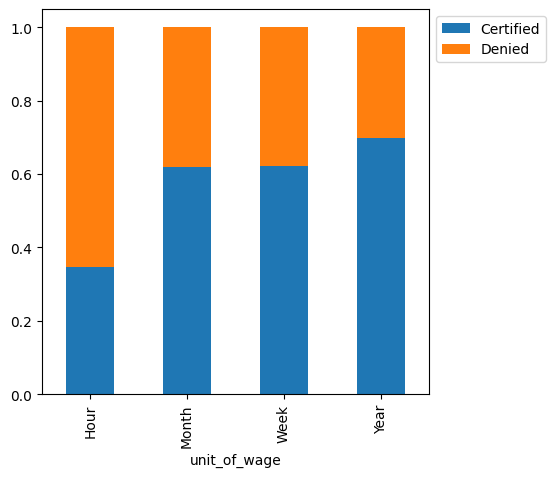

In [39]:
stacked_barplot(df, "unit_of_wage", "case_status")

> 1.  Applications with a Yearly unit of wage have the highest certification rate
> 2.  Applications with a Hour unit of wage have the lowest certification rate
> 3.  In terms of numbers, Year have the highest number of applications i.e. appro 23,000 of which approx 16,000 was certified
> 4. In terms of numbers, Month have the smallest number of applications i.e. appro 90 of which 55 was certified

#### `case_status` vs `full_time_position`

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


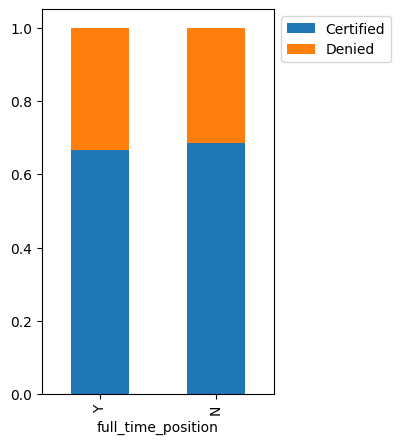

In [40]:
stacked_barplot(df, "full_time_position", "case_status")

> 1.  Applications which did not have a full time position had a higher rate of being certified
> 2.  In terms of numbers, approx 22,700 applicatons had full time positions, of which approx 15,000 was approved
> 3.  In terms of numbers, approx 2,700 applicatons had full time positions, of which 1855 was approved

#### `continent` vs `education_of_employee`

continent              Africa   Asia  Europe  North America  Oceania  \
education_of_employee                                                  
All                       551  16861    3732           3292      192   
Master's                  288   6480    1097           1408       68   
Bachelor's                143   7168    1299           1225       66   
High School                66   2290     490            401       36   
Doctorate                  54    923     846            258       22   

continent              South America    All  
education_of_employee                        
All                              852  25480  
Master's                         293   9634  
Bachelor's                       333  10234  
High School                      137   3420  
Doctorate                         89   2192  
------------------------------------------------------------------------------------------------------------------------


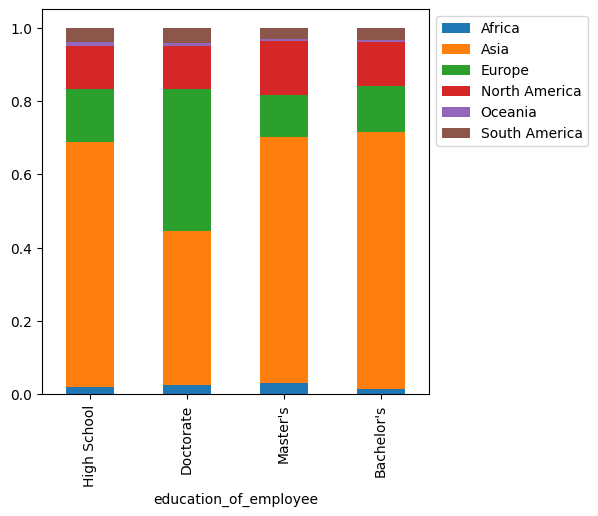

In [41]:
stacked_barplot(df, "education_of_employee", "continent")

> 1. In the work visa applications, the highest rate of applicants with High School, Master's and Bachelor's are from Asia
> 2. In the work visa applications, the highest rate of applicants with Doctorate are from Asia and Europe

#### `continent` vs `has_job_experience`

continent           Africa   Asia  Europe  North America  Oceania  \
has_job_experience                                                  
All                    551  16861    3732           3292      192   
Y                      334   9790    2156           1944      103   
N                      217   7071    1576           1348       89   

continent           South America    All  
has_job_experience                        
All                           852  25480  
Y                             475  14802  
N                             377  10678  
------------------------------------------------------------------------------------------------------------------------


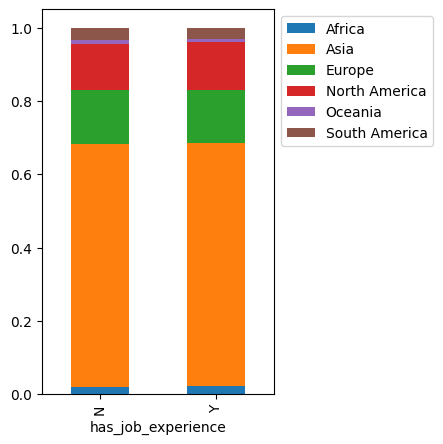

In [42]:
stacked_barplot(df, "has_job_experience", "continent")

> 1. We can see that those requiring job experience and not requiring job experience are more or less equally for the different continents.
> 2. Asia has the highest rate for those applications which have and do not have job experience

#### `continent` vs `requires_job_training`

continent              Africa   Asia  Europe  North America  Oceania  \
requires_job_training                                                  
All                       551  16861    3732           3292      192   
N                         510  15113    2993           3044      163   
Y                          41   1748     739            248       29   

continent              South America    All  
requires_job_training                        
All                              852  25480  
N                                702  22525  
Y                                150   2955  
------------------------------------------------------------------------------------------------------------------------


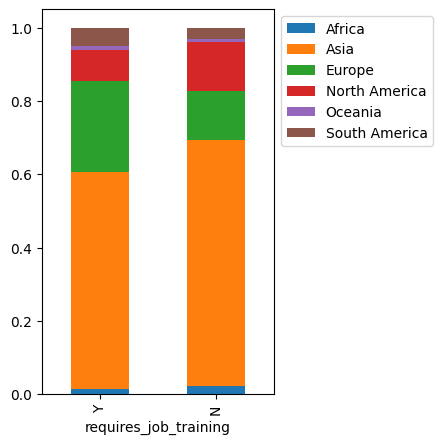

In [43]:
stacked_barplot(df, "requires_job_training", "continent")

> 1.  For applications coming from Asia, North America, Oceania and Africa, there is a higher rate for those who do not need job training compared to those who require job training
> 2.  For applications coming from Europe, South America, there is a higher rate for those who need job training that those who do not need job training

#### `continent` vs `no_of_employees`

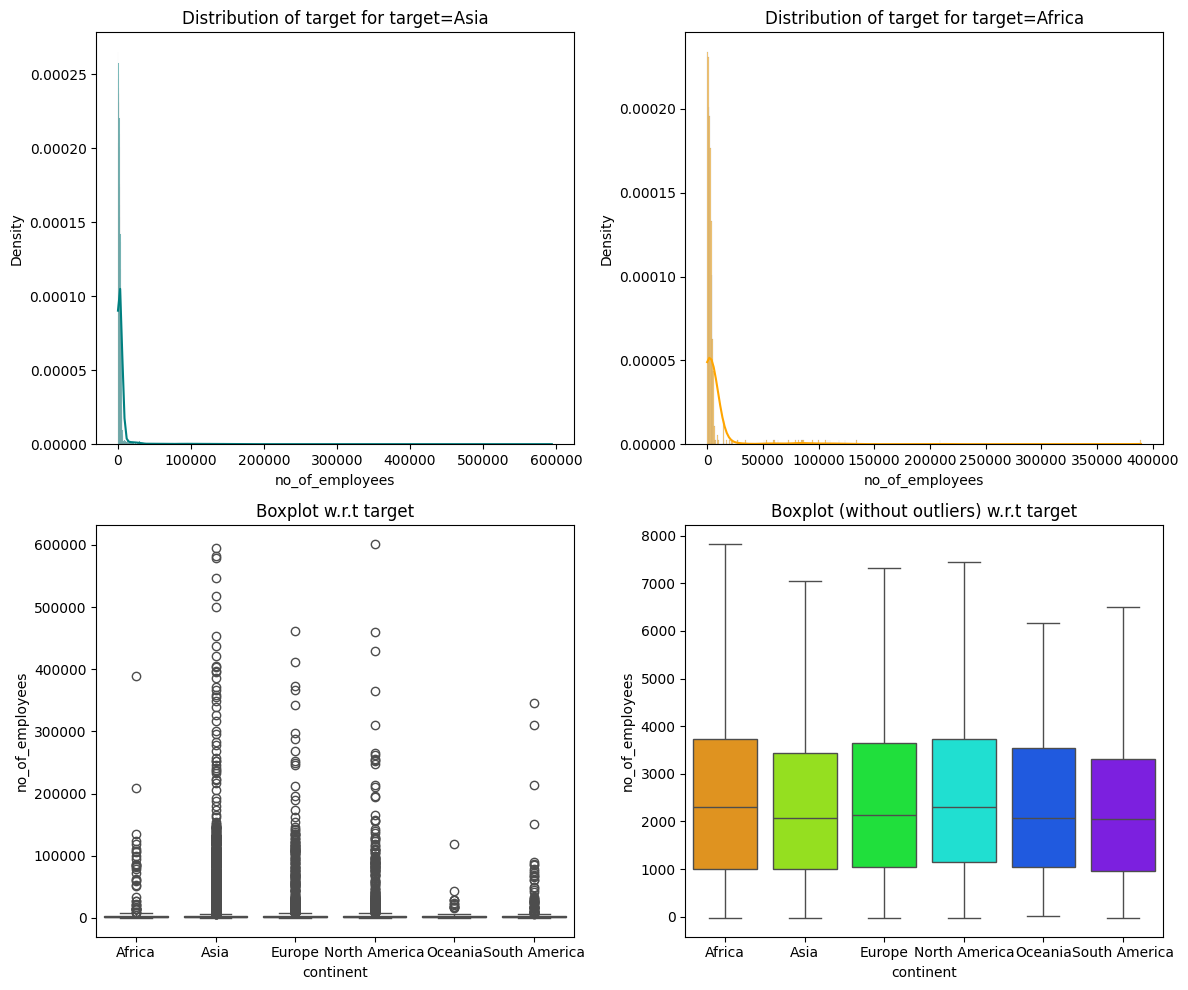

In [44]:
distribution_plot_wrt_target(data, "no_of_employees", "continent")

> 1.  In general, work visa applications which are from Africa and North America are for companies where there are higher number of employees

#### `continent` vs `yr_of_estab`

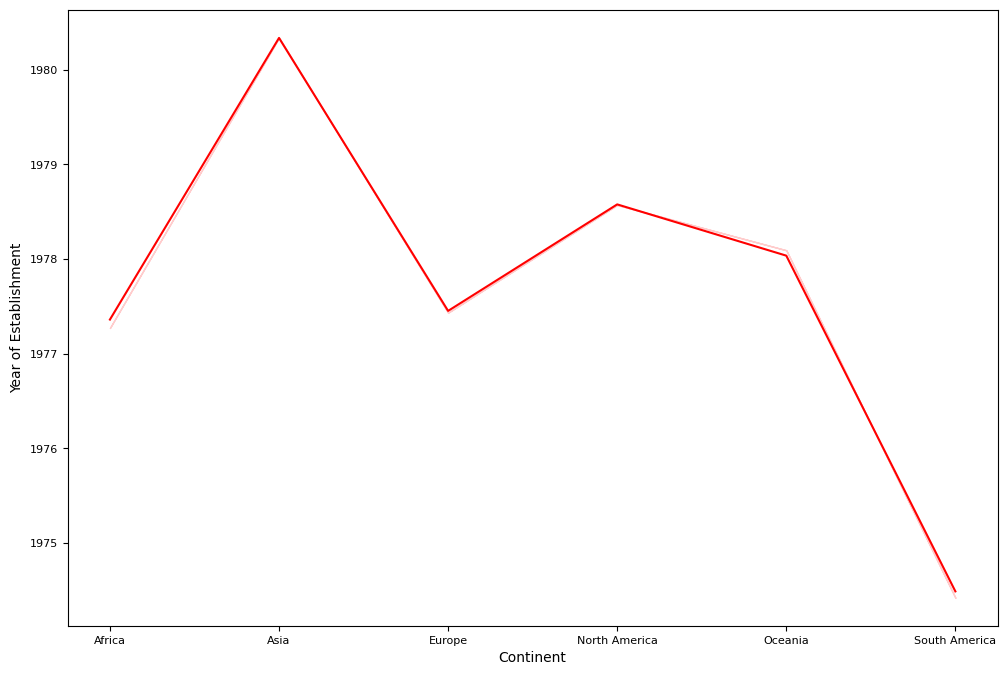

In [45]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="continent", y="yr_of_estab", ci=False, color="red")
plt.xlabel("Continent",fontsize=10)
plt.ylabel("Year of Establishment", fontsize=10)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1.  We can see that in general, applications coming from Asia are for companies with a more recent year of establishments.
> 2.  In general, applications coming from South America are for older companies.

#### `continent` vs `region_of_employment`

continent             Africa   Asia  Europe  North America  Oceania  \
region_of_employment                                                  
All                      551  16861    3732           3292      192   
West                     137   3870    1459            834       57   
Northeast                212   4589     965           1114       49   
South                    102   4805     973            870       44   
Midwest                   92   3371     303            392       38   
Island                     8    226      32             82        4   

continent             South America    All  
region_of_employment                        
All                             852  25480  
West                            229   6586  
Northeast                       266   7195  
South                           223   7017  
Midwest                         111   4307  
Island                           23    375  
-----------------------------------------------------------------------

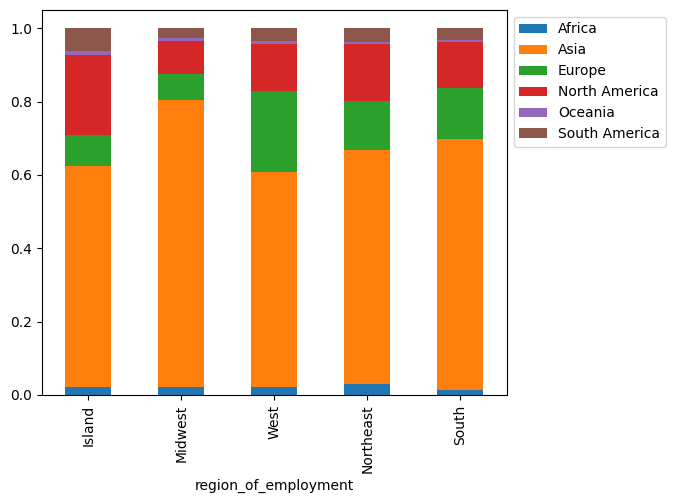

In [46]:
stacked_barplot(df, "region_of_employment", "continent")

> 1.  For all regions of employment, the higest rate of continent applications are from Asia.
> 2.  Midwest has the highest rate of applications from Asia
> 3.  Island have the highest rate of applications from North America

#### `continent` vs `prevailing_wage`

<Figure size 1200x900 with 0 Axes>

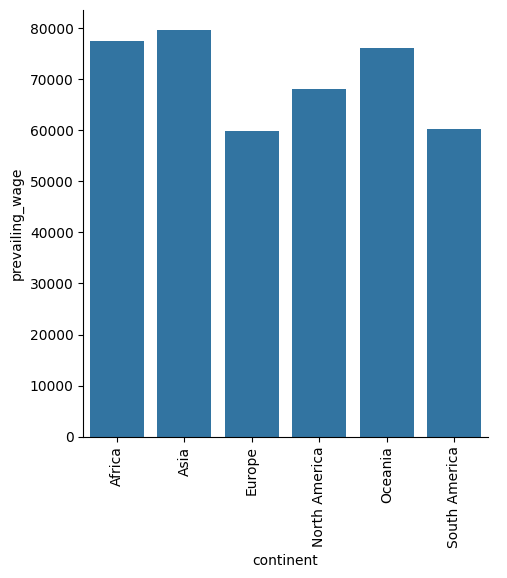

In [47]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'continent' , y = 'prevailing_wage', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

<Figure size 1200x900 with 0 Axes>

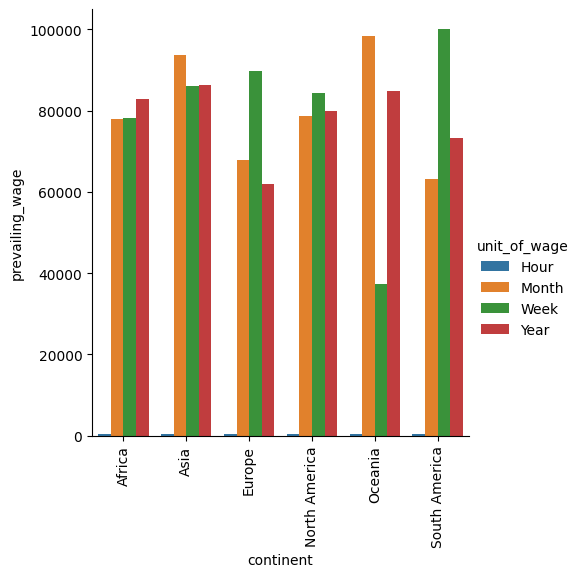

In [48]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'continent' , y = 'prevailing_wage', kind = "bar" , hue="unit_of_wage" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  We see that applications from Africa and Asia have a higher prevailing wage.
> 2.  Applications from Europe have the lowest prevailing wages
> 3. For applications from Africa, yearly wage is the largest
> 4. For applications from Asia and Oceania, Monthly prevailing wage is the most
> 5. For Europe, North America and South America, Weekly prevailing wage is the most

#### `continent` vs `unit_of_wage`

unit_of_wage   Hour  Month  Week   Year    All
continent                                     
All            2157     89   272  22962  25480
Asia           1311     58   154  15338  16861
North America   495     17    75   2705   3292
Europe          140      7    17   3568   3732
Africa           36      3     8    504    551
Oceania          18      2     4    168    192
South America   157      2    14    679    852
------------------------------------------------------------------------------------------------------------------------


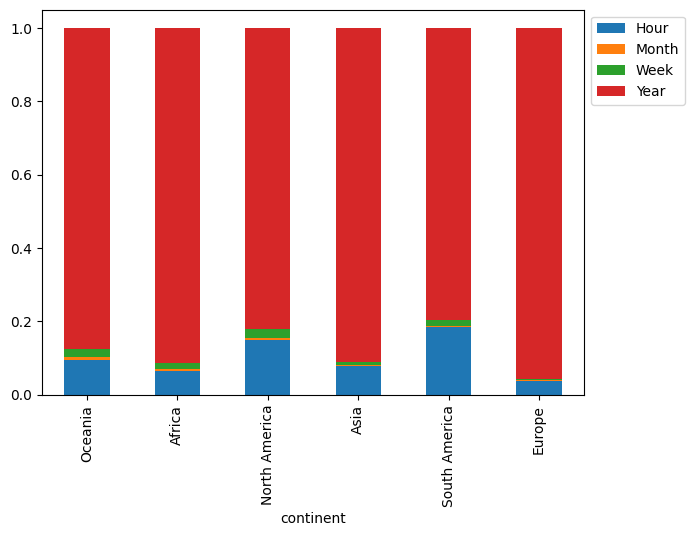

In [49]:
stacked_barplot(df, "continent", "unit_of_wage")

> 1.  For all continents, Yearly rate has the highest rate of applications, followed by Hourly
> 2.  Monthly rate had the lowest rate of applications

#### `continent` vs `full_time_position`

full_time_position     N      Y    All
continent                             
All                 2707  22773  25480
Asia                1941  14920  16861
North America        571   2721   3292
Europe               115   3617   3732
Africa                31    520    551
South America         31    821    852
Oceania               18    174    192
------------------------------------------------------------------------------------------------------------------------


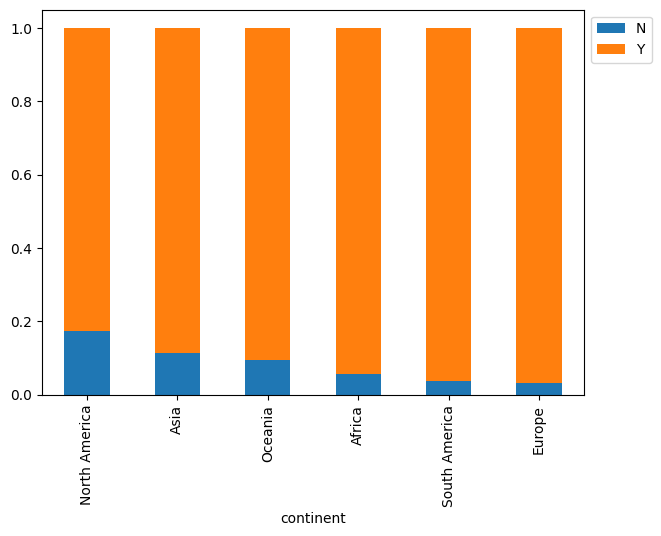

In [50]:
stacked_barplot(df, "continent", "full_time_position")

> 1.  For all continents, Full time positions had the highest rate of applications.
> 2.  Europe hd the highest rate of applications with full time jobs
> 3.  North America had the highest rate of applications for jobs which were not full time

#### `education_of_employee` vs `has_job_experience`

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
has_job_experience                                                        
All                         10234       2192         3420      9634  25480
Y                            5886       1251         2024      5641  14802
N                            4348        941         1396      3993  10678
------------------------------------------------------------------------------------------------------------------------


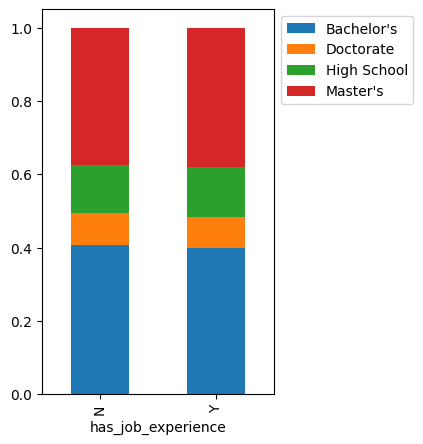

In [51]:
stacked_barplot(df, "has_job_experience", "education_of_employee")

> 1. The rate of applications for those who have job experience is almost the same as those who do not have job experience.
> 2. applicatins with Bachelor's and Master's have the highest rates of applications.

#### `education_of_employee` vs `requires_job_training`

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
requires_job_training                                                     
All                         10234       2192         3420      9634  25480
N                            8971       1778         2990      8786  22525
Y                            1263        414          430       848   2955
------------------------------------------------------------------------------------------------------------------------


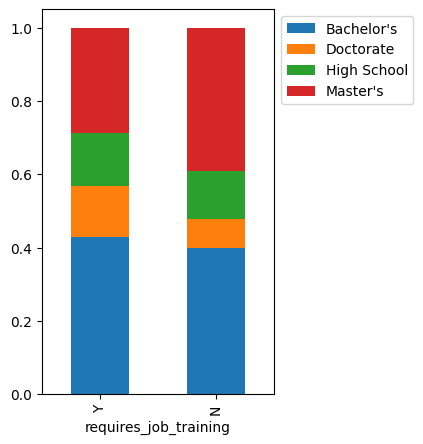

In [52]:
stacked_barplot(df, "requires_job_training", "education_of_employee")

> 1.  Those who have Bachelor's have a higher rate of requiring job applications
> 2.  Those who have Master's have a higher rate of not requiring job training

#### `education_of_employee` vs `no_of_employees`

<Figure size 1200x900 with 0 Axes>

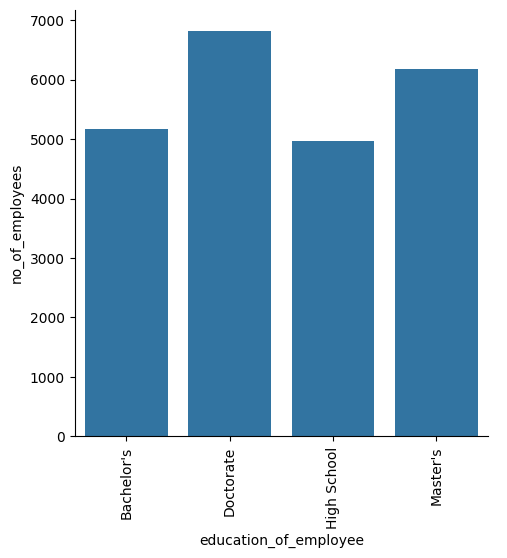

In [53]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'education_of_employee' , y = 'no_of_employees', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Companines which have more employees tend to apply for work visas for employees with Doctorate and Master's

#### `education_of_employee` vs `yr_of_estab`

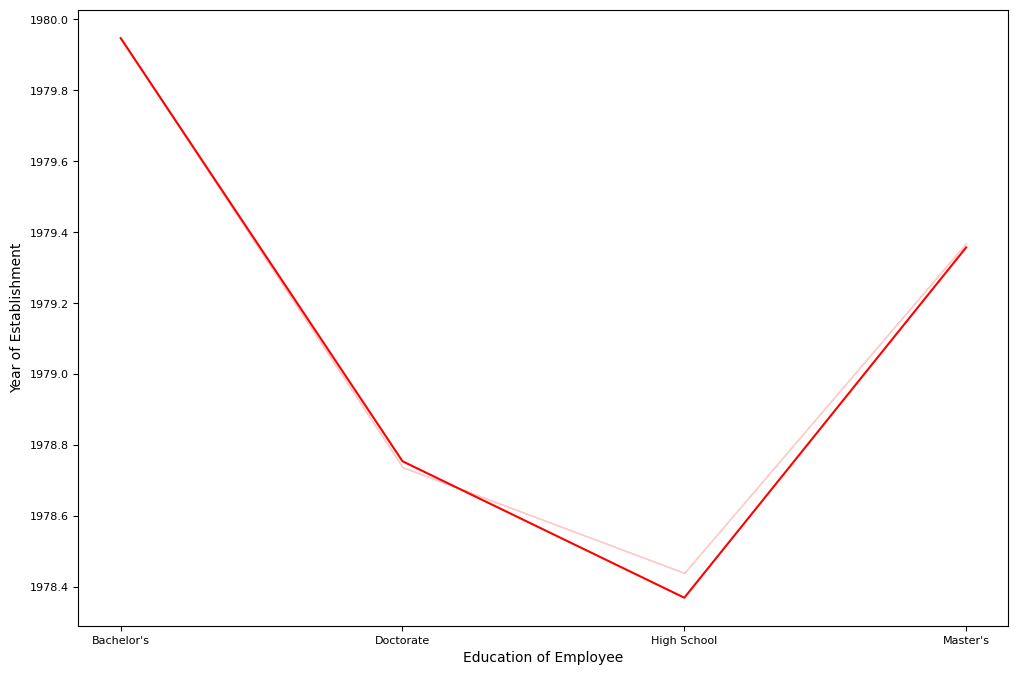

In [54]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="education_of_employee", y="yr_of_estab", ci=False, color="red")
plt.xlabel("Education of Employee",fontsize=10)
plt.ylabel("Year of Establishment", fontsize=10)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1.  We can see that in general, applications where the candidate have a Bachelor's tend to be for newer companies.
> 2.  Applications where the candidate have a High School education tend to be for older companies.

#### `education_of_employee` vs `region_of_employment`

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


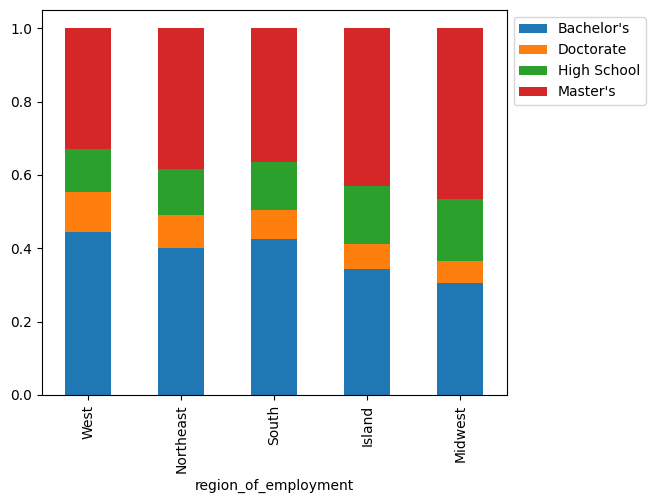

In [55]:
stacked_barplot(df, "region_of_employment", "education_of_employee")

> 1.  Applications for the Midwest and Island has the highest rate of candidates with Master's
> 2.  Applications for South and West has the highest rate of candidates with Bachelor's
> 3.  The majority of candidates with Doctorate apply for the West region
> 4.  The highest rate of the High School candidates apply for Island and Midwest

#### `education_of_employee` vs `prevailing_wage`

<Figure size 1200x900 with 0 Axes>

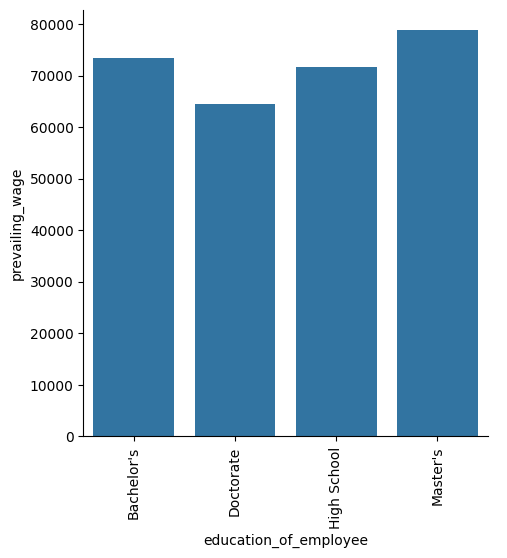

In [56]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'education_of_employee' , y = 'prevailing_wage', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

<Figure size 1200x900 with 0 Axes>

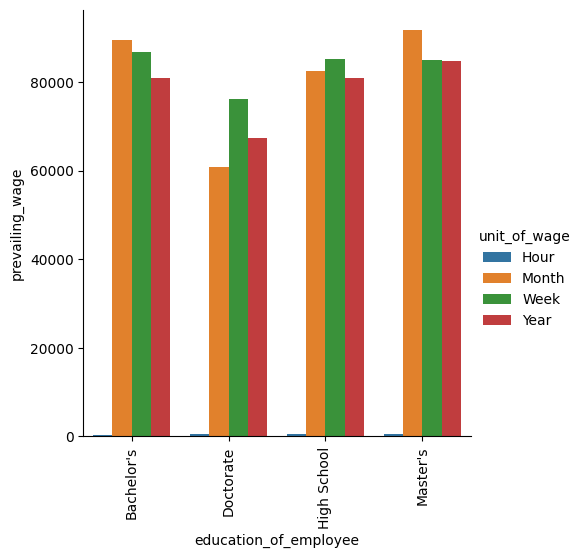

In [57]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'education_of_employee' , y = 'prevailing_wage', kind = "bar" , hue="unit_of_wage" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Applications with Master's have the highest prevailing wage
> 2.  Applications with Doctorate have the lowest prevailing wage
> 3.  The monthly previaling wage for Bachelors is the highest compared to week and year
> 4.  The weekly previaling wage for Doctorate is the highest compared to year and month
> 5.  The weekly previaling wage for High School is the highest compared to month and year
> 6.  The monthly previaling wage for Master's is the highest compared to year and month
> 7.  Masters monthly prevailing wage is the highest of all the prevailing wages

#### `continent` vs `unit_of_wage`

unit_of_wage           Hour  Month  Week   Year    All
education_of_employee                                 
All                    2157     89   272  22962  25480
Bachelor's              981     41   126   9086  10234
Master's                685     30   106   8813   9634
High School             395     13    32   2980   3420
Doctorate                96      5     8   2083   2192
------------------------------------------------------------------------------------------------------------------------


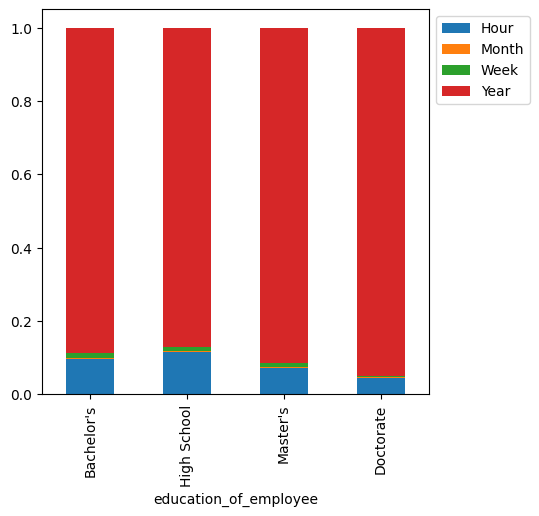

In [58]:
stacked_barplot(df, "education_of_employee", "unit_of_wage")

> 1.  Unit of wage of Year has the highest rate of applications, especially for Doctorate
> 2.  High School has the highest rate of applications for Hour unit of wage

#### `education_of_employee` vs `full_time_position`

full_time_position        N      Y    All
education_of_employee                    
All                    2707  22773  25480
Master's               1738   7896   9634
Bachelor's              683   9551  10234
High School             206   3214   3420
Doctorate                80   2112   2192
------------------------------------------------------------------------------------------------------------------------


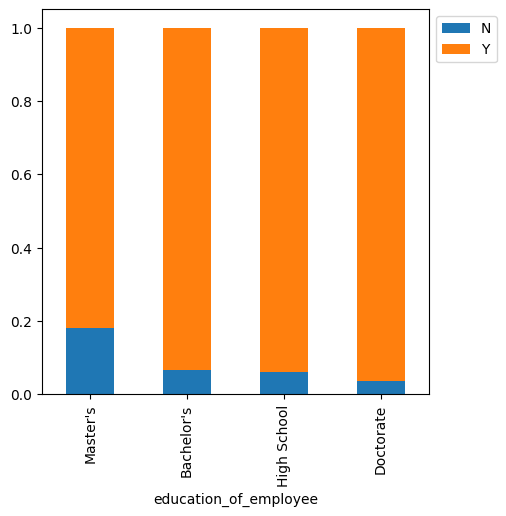

In [59]:
stacked_barplot(df, "education_of_employee", "full_time_position")

> 1.  Doctorate has the highest rate of full time positions, followed by High School, then Bachelor's and finally Master's

#### `has_job_experience` vs `requires_job_training`

has_job_experience         N      Y    All
requires_job_training                     
All                    10678  14802  25480
N                       8988  13537  22525
Y                       1690   1265   2955
------------------------------------------------------------------------------------------------------------------------


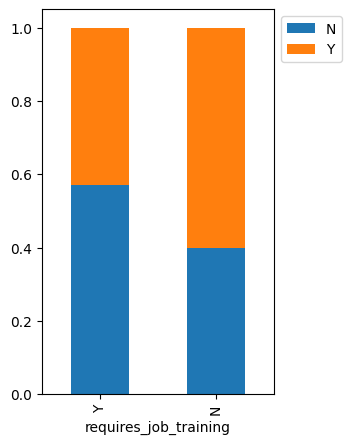

In [60]:
stacked_barplot(df, "requires_job_training", "has_job_experience")

> 1.  Those who do not require job training and have job experience have the highest rate of applicatons.
> 2.  For those who require job training they have a higher rate of no job experience

#### `has_job_experience` vs `no_of_employees`

<Figure size 1200x900 with 0 Axes>

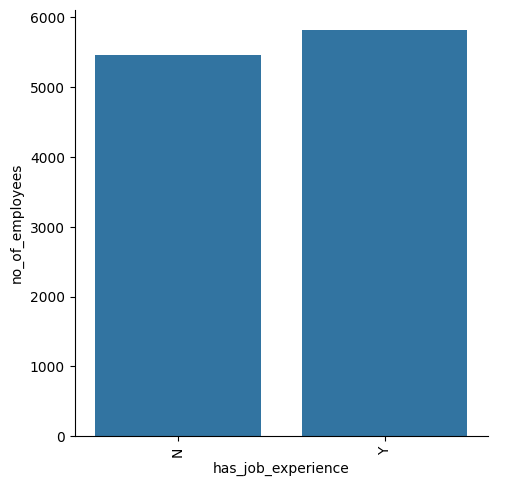

In [61]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'has_job_experience' , y = 'no_of_employees', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Companines which have more employees tend to apply for work visas for employees who have job experience

#### `has_job_experience` vs `yr_of_estab`

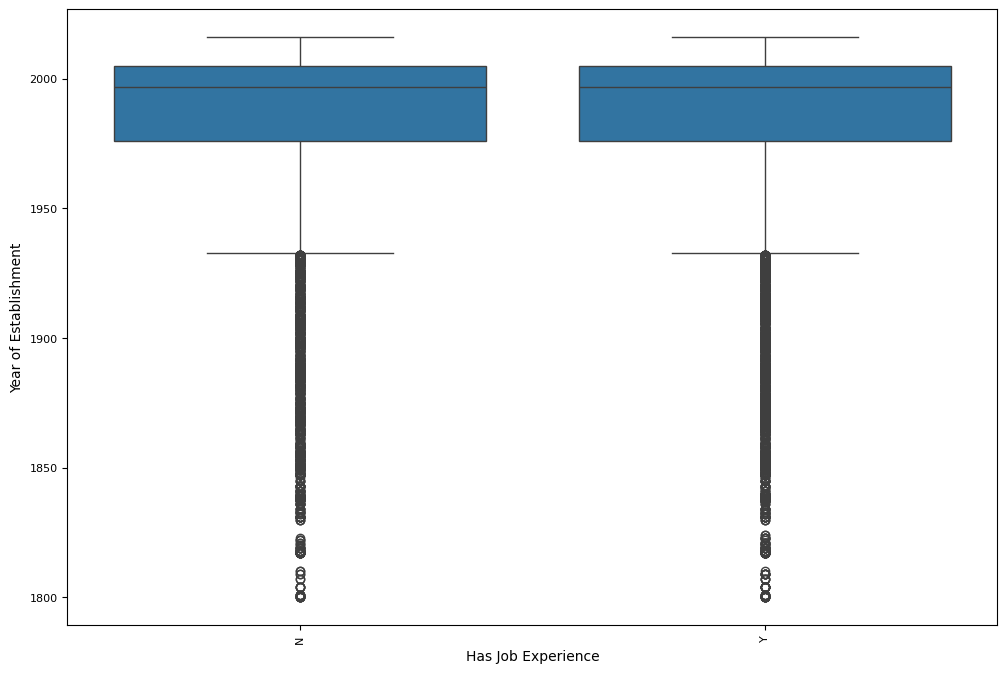

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x= 'has_job_experience', y='yr_of_estab')
plt.xlabel("Has Job Experience",fontsize=10)
plt.ylabel("Year of Establishment", fontsize=10)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
plt.xticks(rotation=90);

> 1. Has job experience do not seem to be affected by the year of establishment

#### `has_job_experience` vs `region_of_employment`

has_job_experience        N      Y    All
region_of_employment                     
All                   10678  14802  25480
Northeast              2934   4261   7195
South                  2920   4097   7017
West                   2705   3881   6586
Midwest                1964   2343   4307
Island                  155    220    375
------------------------------------------------------------------------------------------------------------------------


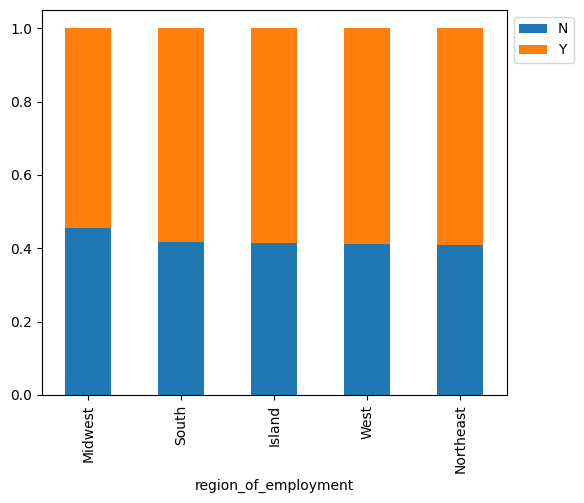

In [63]:
stacked_barplot(df, "region_of_employment", "has_job_experience")

> 1.  Applications for all the locations have a higher rate of candidates with job experience than without job experience

#### `has_job_experience` vs `prevailing_wage`

<Figure size 1200x900 with 0 Axes>

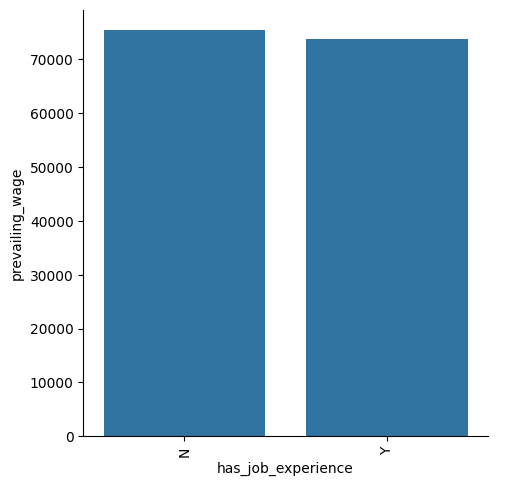

In [64]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'has_job_experience' , y = 'prevailing_wage', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

<Figure size 1200x900 with 0 Axes>

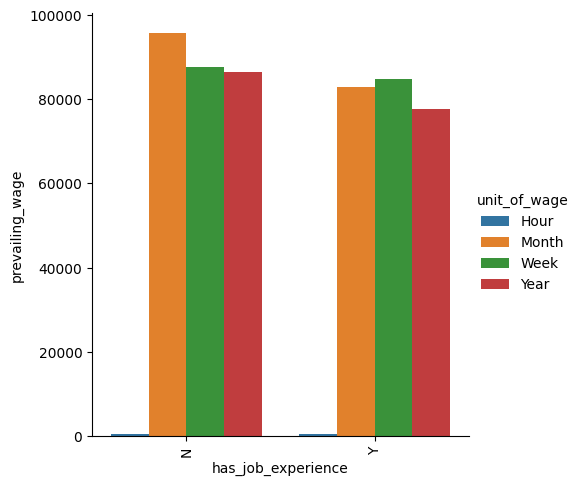

In [65]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'has_job_experience' , y = 'prevailing_wage', kind = "bar" , hue="unit_of_wage" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Applications with no job experience appear to have higher prevailing wage
> 2.  For applications with no job experience, average Monthly unit of wage is the highest, average hourly is the lowest
> 3.  For applications with job experience the average weekly salary is highest prevailing wage and average yearly salary is the lowest

#### `has_job_experience` vs `unit_of_wage`

unit_of_wage        Hour  Month  Week   Year    All
has_job_experience                                 
All                 2157     89   272  22962  25480
Y                    792     57   199  13754  14802
N                   1365     32    73   9208  10678
------------------------------------------------------------------------------------------------------------------------


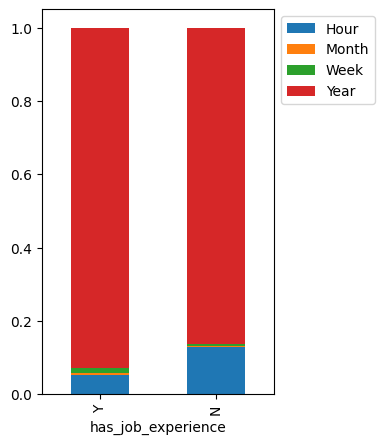

In [66]:
stacked_barplot(df, "has_job_experience", "unit_of_wage")

> 1.  Unit of wage of Year has the highest rate of applications for those who have job experience
> 2.  The applications which does not have job expeience have a higher rate of hour unit of wage compared to those which did have job experience

#### `has_job_experience` vs `full_time_position`

full_time_position     N      Y    All
has_job_experience                    
All                 2707  22773  25480
Y                   1410  13392  14802
N                   1297   9381  10678
------------------------------------------------------------------------------------------------------------------------


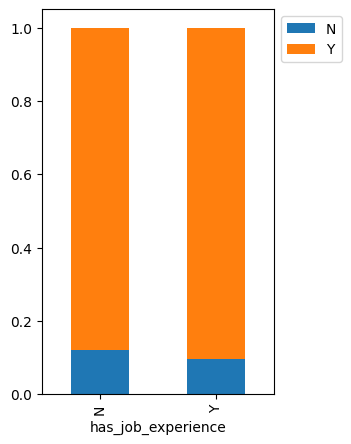

In [67]:
stacked_barplot(df, "has_job_experience", "full_time_position")

> 1.  Applications where the candidate has job experiece has a higher rate of full time positions compared to those applications where the candidate does not have job experience

#### `requires_job_training` vs `no_of_employees`

<Figure size 1200x900 with 0 Axes>

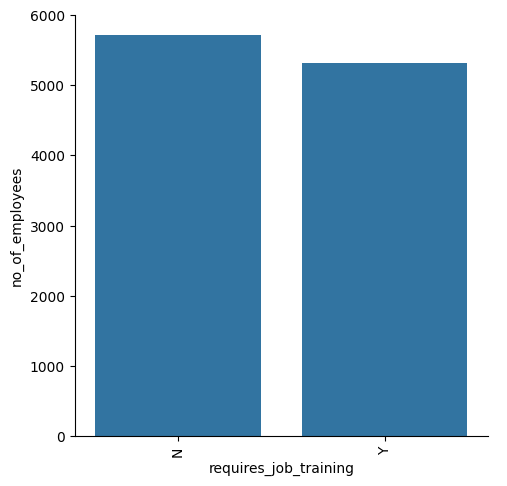

In [68]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'requires_job_training' , y = 'no_of_employees', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Companines which have more employees tend to apply for work visas for employees who require job training

#### `requires_job_training` vs `yr_of_estab`

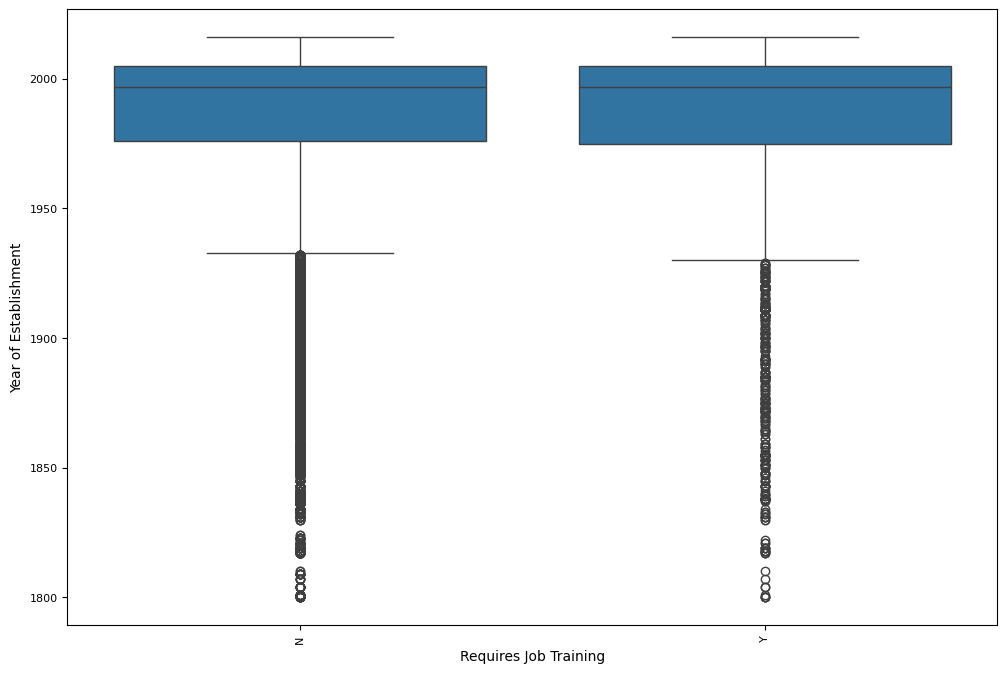

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x= 'requires_job_training', y='yr_of_estab')
plt.xlabel("Requires Job Training",fontsize=10)
plt.ylabel("Year of Establishment", fontsize=10)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
plt.xticks(rotation=90);

> 1. Applications which require job training do not seem to be affected by the year of establishment

#### `requires_job_training` vs `region_of_employment`

requires_job_training      N     Y    All
region_of_employment                     
All                    22525  2955  25480
South                   5877  1140   7017
West                    5632   954   6586
Northeast               6589   606   7195
Midwest                 4074   233   4307
Island                   353    22    375
------------------------------------------------------------------------------------------------------------------------


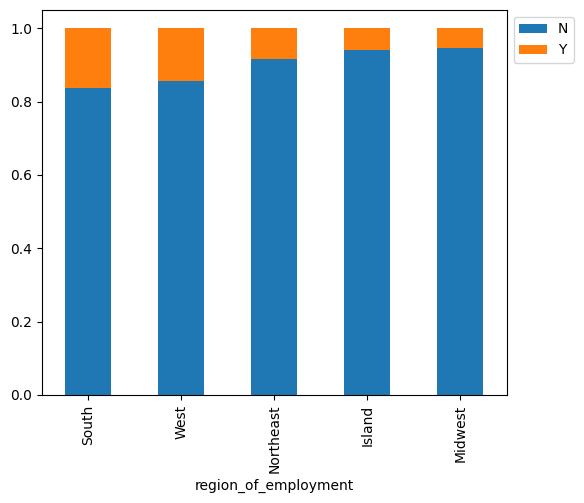

In [70]:
stacked_barplot(df, "region_of_employment", "requires_job_training")

> 1.  Applications for all the locations have a higher rate of candidates who do not require job training
> 2.  South location have the highest rate of emplyees who require job training

#### `requires_job_training` vs `prevailing_wage`

<Figure size 1200x900 with 0 Axes>

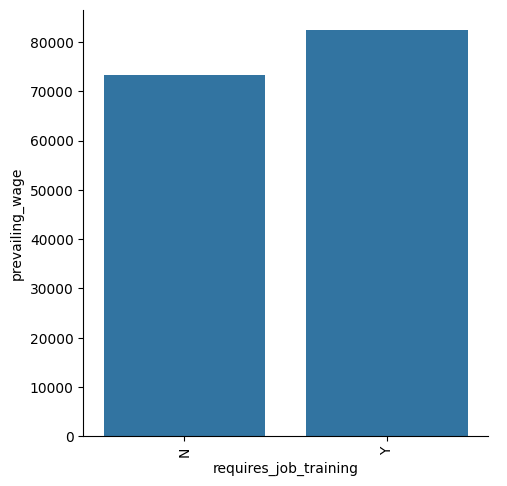

In [71]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'requires_job_training' , y = 'prevailing_wage', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

<Figure size 1200x900 with 0 Axes>

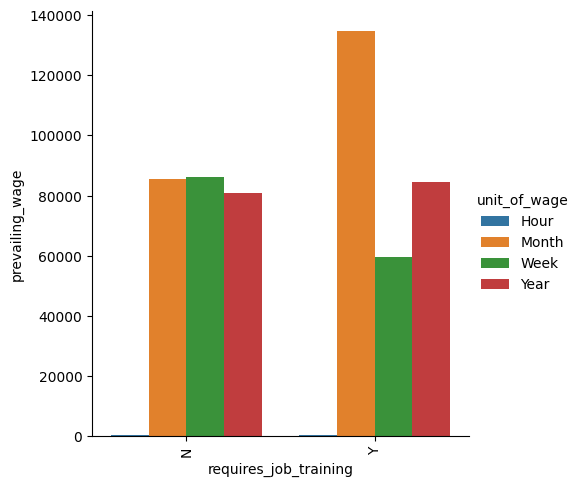

In [72]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'requires_job_training' , y = 'prevailing_wage', kind = "bar" , hue="unit_of_wage" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Applications for jobs which requires trianing have ahigher rate of prevailing wage
> 2.  For the applications which do not require training, weekly unit of wage is highest, hourly unit of wage is the lowest
> 3.  For the applications which requires training, monthly unit of wage is highest, hourly unit of wage is the lowest

#### `requires_job_training` vs `unit_of_wage`

unit_of_wage           Hour  Month  Week   Year    All
requires_job_training                                 
All                    2157     89   272  22962  25480
N                      2086     85   267  20087  22525
Y                        71      4     5   2875   2955
------------------------------------------------------------------------------------------------------------------------


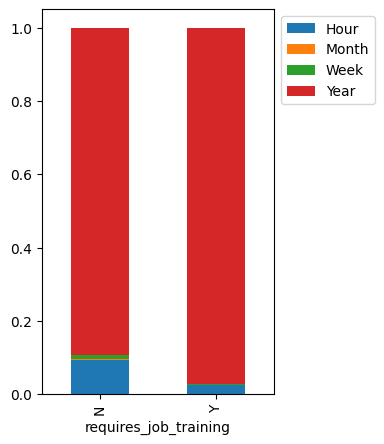

In [73]:
stacked_barplot(df, "requires_job_training", "unit_of_wage")

> 1.  Unit of wage of Year has the highest rate of applications for those who require job trianing
> 2.  The applications which do not require job training,  have a higher rate of hour unit of wage compared to those which did require job training

#### `requires_job_training` vs `full_time_position`

full_time_position        N      Y    All
requires_job_training                    
All                    2707  22773  25480
N                      2656  19869  22525
Y                        51   2904   2955
------------------------------------------------------------------------------------------------------------------------


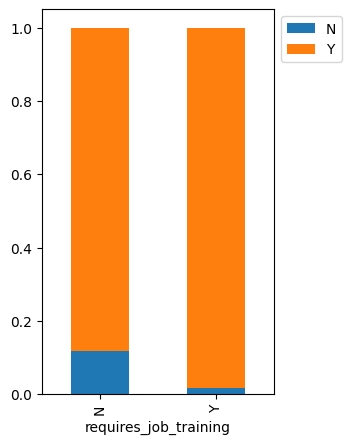

In [74]:
stacked_barplot(df, "requires_job_training", "full_time_position")

> 1.  Applications where the candidate requires job experience have a higher rate of full time positions

#### `no_of_employees` vs `yr_of_estab`

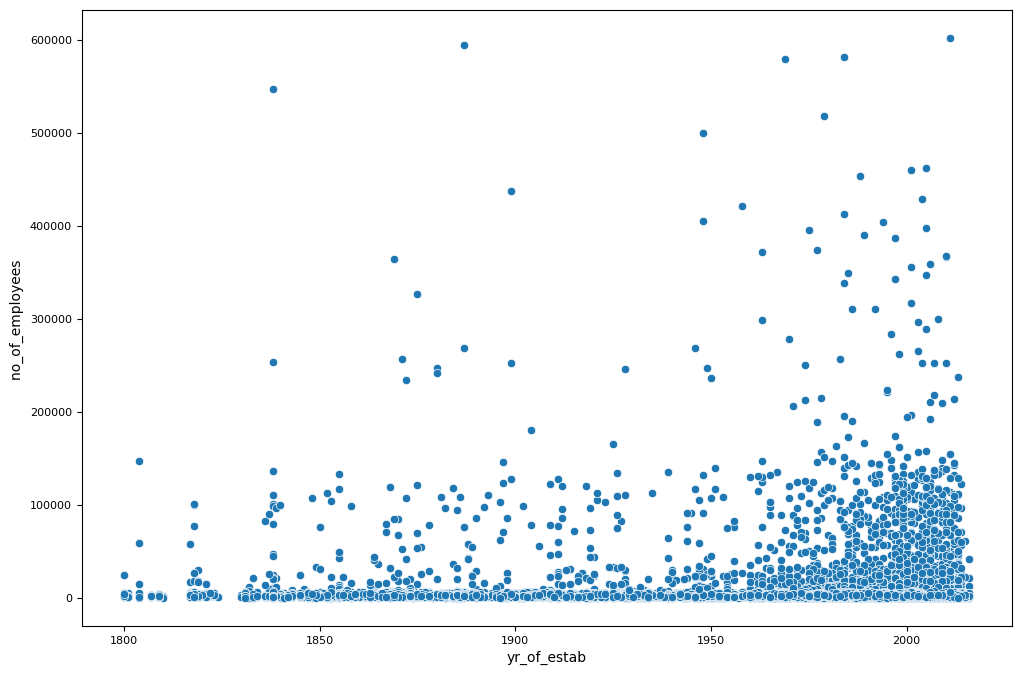

In [75]:
# plotting food preparation time vs rating
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x= 'yr_of_estab', y='no_of_employees')
plt.xlabel("yr_of_estab",fontsize=10)
plt.ylabel("no_of_employees ", fontsize=10)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1. We see there is a higher concentration of applocations for the newer companies with less than 20,000 employees

#### `no_of_employees` vs `region_of_employment`

<Figure size 1200x900 with 0 Axes>

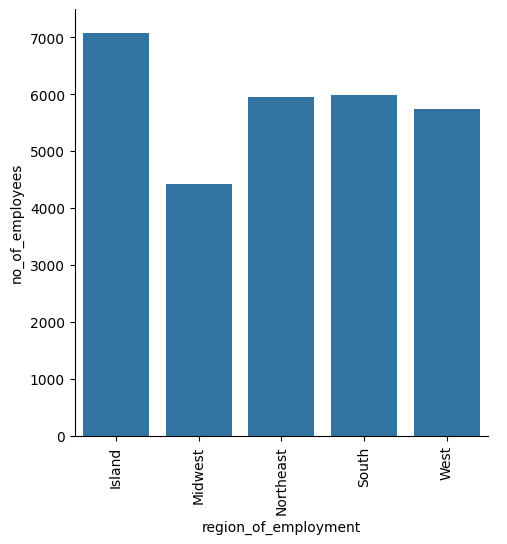

In [76]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'region_of_employment' , y = 'no_of_employees', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Applications for Island locations tend to be for comapines with a higher number of employees
> 2.  Applications for Midwest locations tend to be for comapines with a lower number of employees

#### `no_of_employees` vs `prevailing_wage`

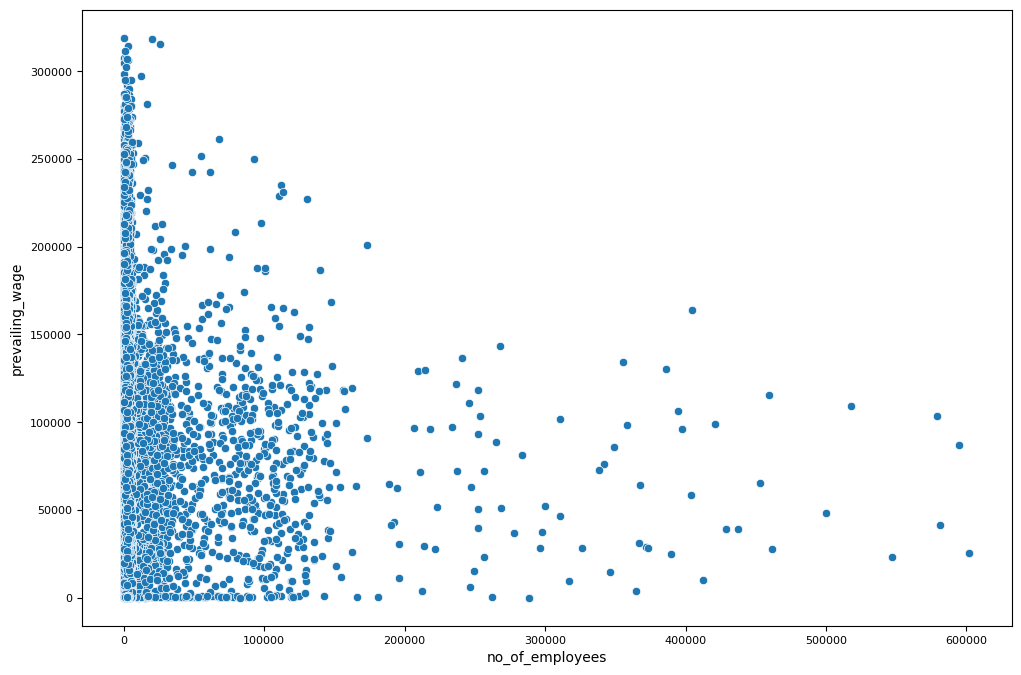

In [77]:
# plotting food preparation time vs rating
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x= 'no_of_employees', y='prevailing_wage')

plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1.  Applications for jobs with the highest prevailing wage tends to be for companies with a smaller number of employees
> 2.  Applications for jobs with thehighest number of employees have a prevailing wage of approx 150,000 and below

#### `no_of_employees` vs `unit_of_wage`

<Figure size 1200x900 with 0 Axes>

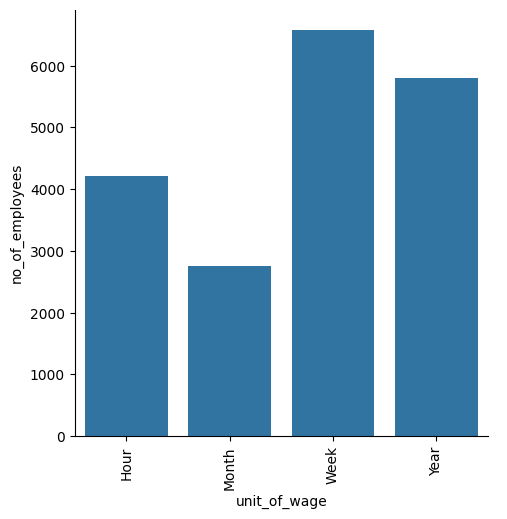

In [78]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'unit_of_wage' , y = 'no_of_employees', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Applications with companies which has the larger number of employees tend to have a weekly salary unit of wage
> 2.  Applications with companies which has the smaller number of employees tend to have a Montlhly salary unit of wage

#### `no_of_employees` vs `full_time_position`

<Figure size 1200x900 with 0 Axes>

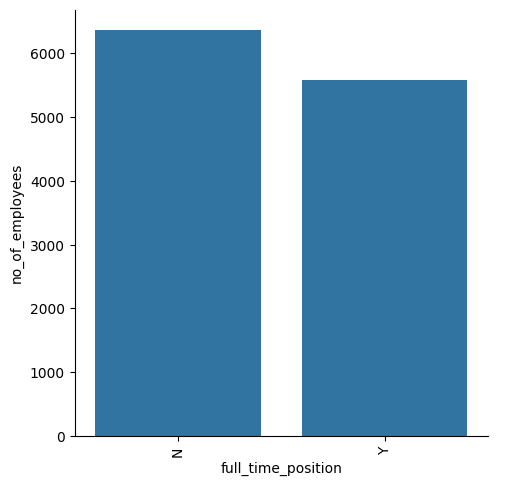

In [79]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'full_time_position' , y = 'no_of_employees', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  Applications where the position is fully time is more likely for companies with a larger number of employees

#### `yr_of_estab` vs `region_of_employment`

unit_of_wage           Hour  Month  Week   Year    All
requires_job_training                                 
All                    2157     89   272  22962  25480
N                      2086     85   267  20087  22525
Y                        71      4     5   2875   2955
------------------------------------------------------------------------------------------------------------------------


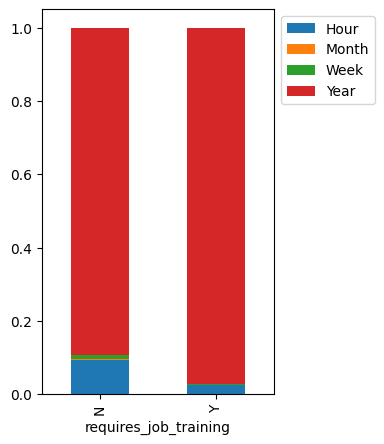

In [80]:
stacked_barplot(df, "requires_job_training", "unit_of_wage")

> 1.  Year of establishment does not seem to affect the region of employment

#### `yr_of_estab` vs `prevailing_wage`

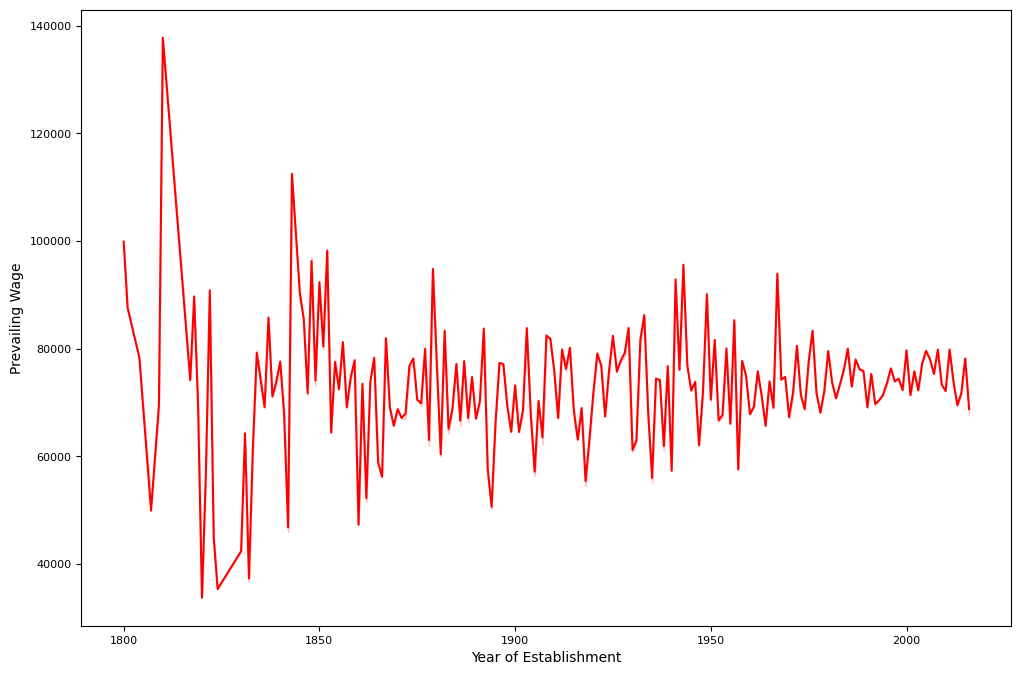

In [81]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="yr_of_estab", y="prevailing_wage", ci=False, color="red")
plt.xlabel("Year of Establishment",fontsize=10)
plt.ylabel("Prevailing Wage", fontsize=10)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1.  Applications for jobs from older compaines ten to have more variation in the prevailing wages.
> 2.  Applications for jobs from the newer companies tend to have less variation in the prevailing wages

#### `yr_of_estab` vs `unit_of_wage`

<Figure size 1200x900 with 0 Axes>

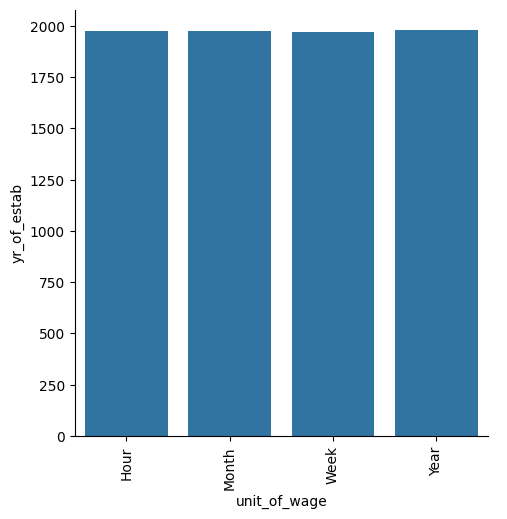

In [82]:
plt.figure(figsize=(12,9))
sns.catplot(data=df,x = 'unit_of_wage' , y = 'yr_of_estab', kind = "bar" ,ci = False); 
plt.xticks( rotation=90);
plt.show()

> 1.  There does not seem to be any relationship between year of establishment and unit of wage

#### `yr_of_estab` vs `full_time_position`

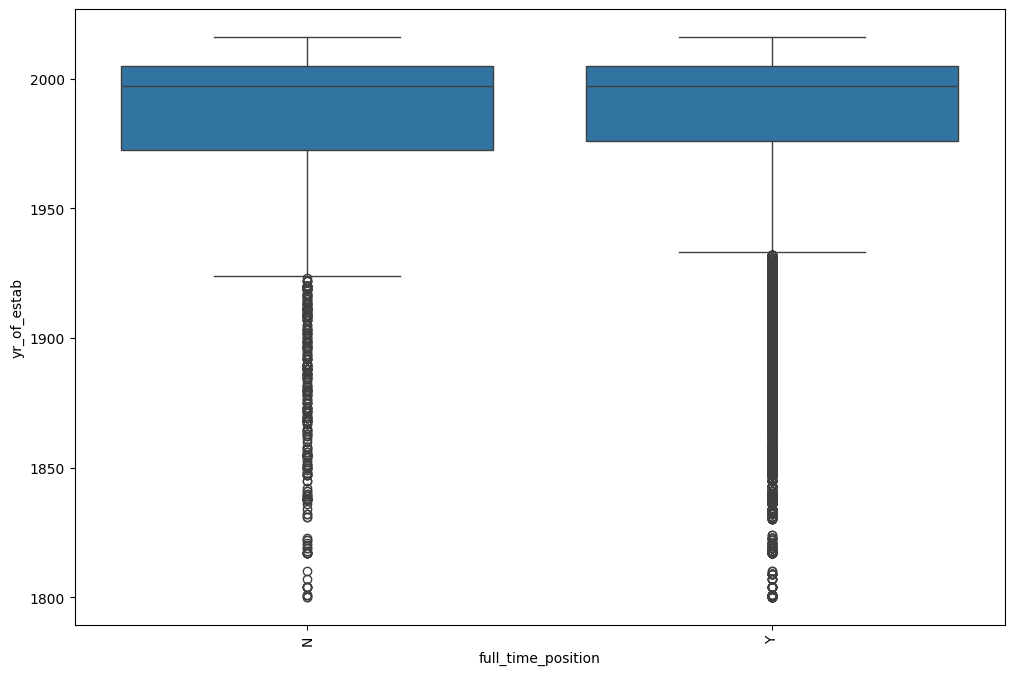

In [83]:
plt.figure(figsize=(12, 8));
sns.boxplot(data=df, x="full_time_position", y="yr_of_estab");
plt.xticks(rotation=90);
plt.show();

> 1.  Year of establishment and full time position do not seem to be related

#### `region_of_employment` vs `prevailing_wage`

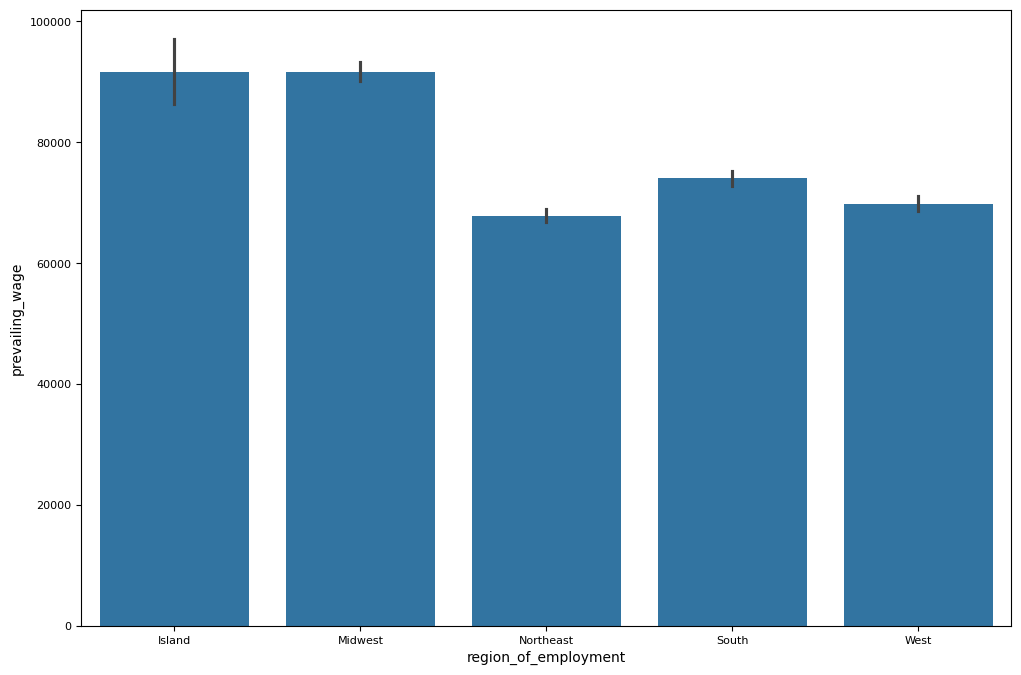

In [84]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x= 'region_of_employment', y='prevailing_wage')
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1.  Island and Miswest have the highest prevailing wages
> 2.  Northeast have the lowest prevailing wages

#### `region_of_employment` vs `unit_of_wage`

unit_of_wage          Hour  Month  Week   Year    All
region_of_employment                                 
All                   2157     89   272  22962  25480
Northeast              865     29    92   6209   7195
South                  696     28    68   6225   7017
West                   432     19    77   6058   6586
Midwest                146     13    32   4116   4307
Island                  18      0     3    354    375
------------------------------------------------------------------------------------------------------------------------


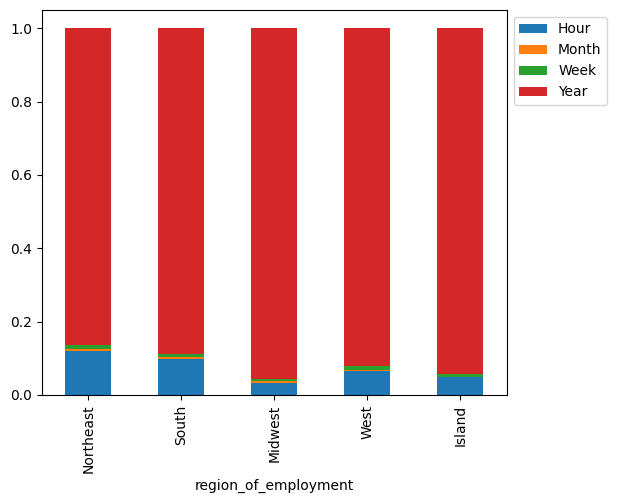

In [85]:
stacked_barplot(df, "region_of_employment", "unit_of_wage")

> 1.  For all regions Year has the highers rate of applications, followed by hour

#### `region_of_employment` vs `full_time_position`

full_time_position       N      Y    All
region_of_employment                    
All                   2707  22773  25480
South                  935   6082   7017
Northeast              804   6391   7195
West                   473   6113   6586
Midwest                450   3857   4307
Island                  45    330    375
------------------------------------------------------------------------------------------------------------------------


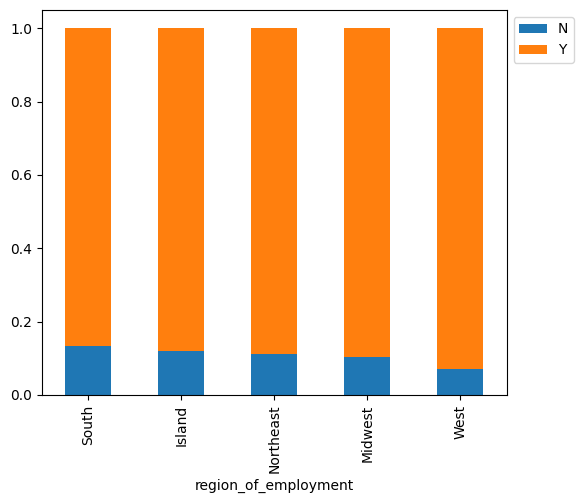

In [86]:
stacked_barplot(df, "region_of_employment", "full_time_position")

> 1.  For all regions of employment, Fulltime has the highest rate

#### `prevailing_wage` vs `unit_of_wage`

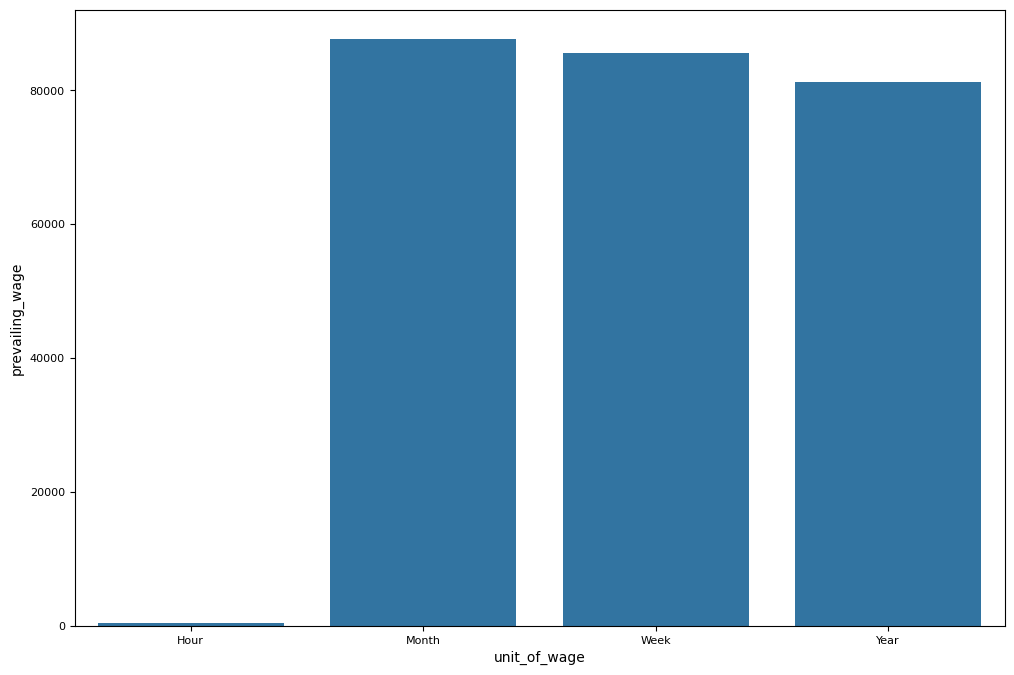

In [87]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x= 'unit_of_wage', y='prevailing_wage', ci=False,)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1.  Hour has the lowest prevailing wage
> 2.  Month has the highest prevailing wages, followed by Week then Year

#### `unit_of_wage` vs `full_time_position`

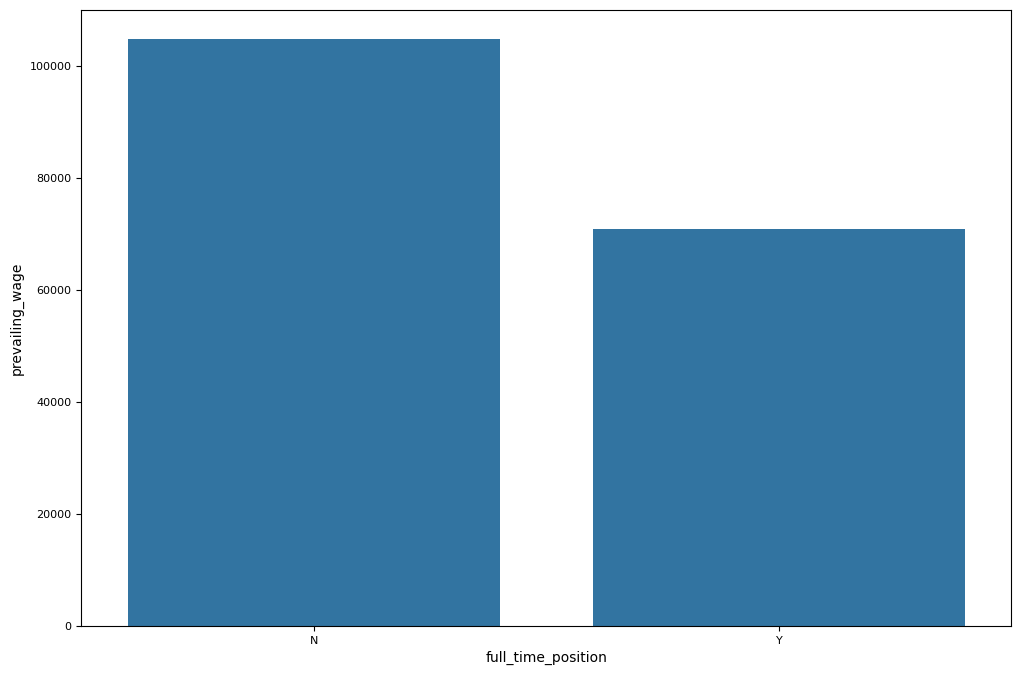

In [88]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x= 'full_time_position', y='prevailing_wage', ci=False,)
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);
#plt.xticks(rotation=90);

> 1.  Full time positions have a lower prevailing wage

#### `unit_of_wage` vs `full_time_position`

unit_of_wage        Hour  Month  Week   Year    All
full_time_position                                 
All                 2157     89   272  22962  25480
Y                   2138     84   262  20289  22773
N                     19      5    10   2673   2707
------------------------------------------------------------------------------------------------------------------------


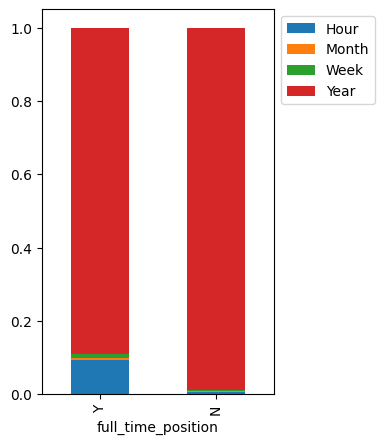

In [89]:
stacked_barplot(df, "full_time_position", "unit_of_wage")

> 1.  Applications for both full time and not full time have a higher rate of year wages.
> 2.  The highest rate of hour wage is in full time positions

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [90]:
# making a copy of the dataset

df1 = data.copy()


# checking the head of df1 to ensure it was copied without errors
df1.head()


continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West        592.20290   
1             2412         2002            Northeast      83425.65000   
2            44444         2008                 West     122996.86000   
3               98         1897                 West      83434.03000   
4             1082         2005                South     149907.39000   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

#### Outlier Detection

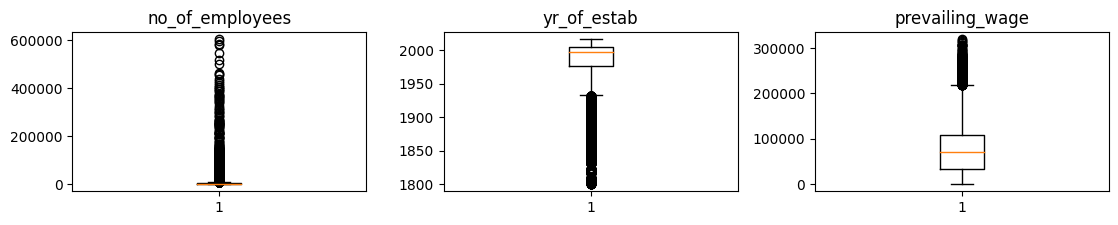

In [91]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

>  There are outliers in the numeric dataset.  However there is not enough information to decide if there are exaplinable.  The do appear to be explainable as it is not unusual to find comapnies with 200,000+ employees, or companies establishes in 1800's ( a google search shows that companies such as Macy's and Saks Fifth Avenue were established in 1800's) and it is not uncommon for salaries to be above 200,000.  Hence we will not treat outliers

In [92]:
df1.head()


continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West        592.20290   
1             2412         2002            Northeast      83425.65000   
2            44444         2008                 West     122996.86000   
3               98         1897                 West      83434.03000   
4             1082         2005                South     149907.39000   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

## Data Preparation for Model Building

**Encoding `Certified` as 1 and `Denied` as 0 as EasyVisa wants a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval.**

In [93]:
df1['case_status'] = df1['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

# X = df1.drop(['case_status'],axis=1)
#y = df1['case_status']
#X = pd.get_dummies(X,drop_first=True, dtype = float)

In [94]:
df1.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West        592.20290   
1             2412         2002            Northeast      83425.65000   
2            44444         2008                 West     122996.86000   
3               98         1897                 West      83434.03000   
4             1082         2005                South     149907.39000   

  unit_of_wage full_time_position case_status  
0         Hour                  Y           0  
1         Year                  Y           1  
2         Year                  Y           0  
3         Year                  Y           0  
4         Year                  Y           1

#### Creating training and test datasets

In [95]:
# specifying the independent  and dependent variables
X = df1.drop(["case_status"], axis=1)
Y = df1["case_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True, dtype = int)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [96]:
# Checking that All variables are numeric for the model to run
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              25480 non-null  float64
 1   no_of_employees                    25480 non-null  int64  
 2   yr_of_estab                        25480 non-null  int64  
 3   prevailing_wage                    25480 non-null  float64
 4   continent_Asia                     25480 non-null  int32  
 5   continent_Europe                   25480 non-null  int32  
 6   continent_North America            25480 non-null  int32  
 7   continent_Oceania                  25480 non-null  int32  
 8   continent_South America            25480 non-null  int32  
 9   education_of_employee_Doctorate    25480 non-null  int32  
 10  education_of_employee_High School  25480 non-null  int32  
 11  education_of_employee_Master's     25480 non-null  int

> All variables are of numeric datatype

In [97]:
# Checking the shape of the training and test data to ensure that they have the same distribution of 1's and 0's
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 22)
Shape of test set :  (7644, 22)
Percentage of classes in training set:
case_status
1   0.66360
0   0.33640
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1   0.67792
0   0.32208
Name: proportion, dtype: float64


> The ratio of the  distribution of 1's and 0's (Certified and Denied) have been maintained in the train and test datasets

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [98]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [99]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model performance evaluation

**Model can make wrong predictions as**:

1. Predicting a visa would be Certified but in reality the visa was Denied (False Positive).

2. Predicting a would be Denied but in reality it was Certified (False Negative).

**Which case is more important?**

* Both the cases are important as:

  * False Positive - If we predict a visa would be certified but actually the visa was Denied then EasyVisa would be recommending someone unsuitable for the job.  This can have a negative impact as an unqualified person or unsuitable person would be give the work visa and may not be able to perform the job. Additionally, this also means that a qualified suitable person for the job was not given the visa. There could be legal implications if the person does not have the required certifications for the job, and result in sanctions or penalities for the employer.  Each false positive takes up recourses from applying for the visa to processing the visa to visa approval, this resources could be better utilized.  Too many false positives can affect the reputation of EasyVisa.  Hence it is important that we reduce False Positives

  * False Negative - A high number of false negatives means that many job seekers who are qualified and suitable would be denied.  This is a loss not only for the applicant, but for the employers who are searching for the best candidate for the job. This can result in dissatisfaction from both employers and applicatants and lead to a negative reputation of the visa process.  False negatives can result in shortages of qualified workers which can afffect negatively business operations and productivity.  False negatives can put a strain on resurses as this process was meant to weed out those who meet the requirements of the job, so that they can be transferred to the next step of the visa application process. If we deny those who are qualified, this means that we are also approving those who may not be suitable and hence wasting resources in the visa application process and canditate we are moving forward in the work visa application.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

## Building a Logistic Regression model

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [100]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            case_status   No. Observations:                17836
Model:                          Logit   Df Residuals:                    17814
Method:                           MLE   Df Model:                           21
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  0.1652
Time:                        05:16:40   Log-Likelihood:                -9508.8
converged:                       True   LL-Null:                       -11390.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.7941      0.855     -2.099      0.036      -3.469      -0.119
no_of_employees                   -6.105e-08   7.73e-07     -0

> 1. Negative values of the coefficient show that the probability of visa certification decreases with the increase of the corresponding attribute value.
> 2. Positive values of the coefficient show that the probability of visa certification increases with the increase of the corresponding attribute value.
> 3. p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.  We see that `no_of_employees`, `r_of_estab`, `prevailing_wage`, `continent_Oceania`, `requires_job_training_Y`, `region_of_employment_Northeast`, `region_of_employment_West`,   all have high p-values 

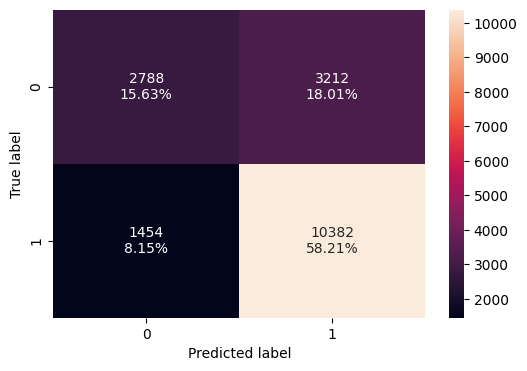

In [101]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [102]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.73839 0.87715    0.76372 0.81652

> 1. The f1_score of the model is ~0.82 and we will try to maximize it further
> 2. The variables used to build the model might contain multicollinearity, which will affect the p-values
> 3. We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.
- There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [103]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                               2312.44135
no_of_employees                        1.00316
yr_of_estab                            1.00464
prevailing_wage                        1.33634
continent_Asia                        10.95941
continent_Europe                       6.79208
continent_North America                6.30699
continent_Oceania                      1.36944
continent_South America                2.53376
education_of_employee_Doctorate        1.16246
education_of_employee_High School      1.16517
education_of_employee_Master's         1.26274
has_job_experience_Y                   1.04679
requires_job_training_Y                1.07425
region_of_employment_Midwest          10.06640
region_of_employment_Northeast        14.17464
region_of_employment_South            13.88554
region_of_employment_West             13.57050
unit_of_wage_Month                     1.04820
unit_of_wage_Week                      1.15706
unit_of_wage_Year        

> High Multicollnearity values was found in the dummy vaiables for `continent_Asia`, `region_of_employment_Midwest`, `region_of_employment_Northeast`, `region_of_employment_South`, `region_of_employment_West` and `const`.  We do not consider multicollnearity in the constant. The remaining high multicollnearity are part of dummy variables, there are no treatment necessary for multicollinearity.

### Removing high p-value variables

> The p-values are high for `no_of_employees`, `r_of_estab`, `prevailing_wage`, `continent_Oceania`, `requires_job_training_Y`, `region_of_employment_Northeast`, `region_of_employment_West`.  We will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [104]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_South America', 'education_of_employee_Doctorate', 'education_of_employee_High School', "education_of_employee_Master's", 'has_job_experience_Y', 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year', 'full_time_position_Y']


In [105]:
X_train2 = X_train[selected_features]

In [106]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:            case_status   No. Observations:                17836
Model:                          Logit   Df Residuals:                    17820
Method:                           MLE   Df Model:                           15
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  0.1649
Time:                        05:16:42   Log-Likelihood:                -9511.6
converged:                       True   LL-Null:                       -11390.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.5992      0.146    -10.987      0.000      -1.884      -1.314
continent_Asia                       -0.2404      0.111     -2

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

> **Coefficient Interpretations**
> * Coefficient of `continent_Europe`, `education_of_employee_Doctorate`, `education_of_employee_Master's`, `has_job_experience_Y`,`region_of_employment_Midwest`, `region_of_employment_Northeast`, `region_of_employment_South`, `unit_of_wage_Month`, `unit_of_wage_Week`, `unit_of_wage_Year`, `full_time_position_Y`,are all positive.  An increase in these will lead to increase in chances of the visa being certified
> * Coefficient of  `continent_Asia`, `continent_North America`,`continent_South America`, `education_of_employee_High School` are all negative.  An increase in these will lead to decrease in chances of a visa being certified.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [107]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  continent_Asia  continent_Europe  \
Odds          0.20206         0.78634           1.64884   
Change_odd% -79.79440       -21.36575          64.88424   

             continent_North America  continent_South America  \
Odds                         0.73047                  0.64302   
Change_odd%                -26.95308                -35.69831   

             education_of_employee_Doctorate  \
Odds                                 3.80122   
Change_odd%                        280.12182   

             education_of_employee_High School  \
Odds                                   0.25943   
Change_odd%                          -74.05711   

             education_of_employee_Master's  has_job_experience_Y  \
Odds                                2.37318               2.53937   
Change_odd%                       137.31763             153.93697   

             region_of_employment_Midwest  region_of_employment_Northeast  \
Odds                              2.40065                         1.22446   
Change_odd%                     140.06519                        22.44640   

             region_of_employment_South  unit_of_wage_Month  \
Odds                            1.81008             2.59316   
Change_odd%                    81.00756           159.31609   

             unit_of_wage_Week  unit_of_wage_Year  full_time_position_Y  
Odds                   2.66689            3.62093               1.28785  
Change_odd%          166.68888          262.09260              28.78497

> **Coefficient interpretations**
> * `continent_Asia`: Holding all other features constant, the odds of a visa being certified where the continent was Asia is ~0.78 times less likely than the visa application where the continent was Africa or a ~21.6% decrease in the odds of a visa being certified than the visa application where the continent was Africa
> *  `continent_Europe`: Holding all other features constant, the odds of a visa being certified where the continent was Europe is ~1.64 times more likely than the visa application where the continent was Africa or a ~65% increase in the odds of a visa being certified than the visa application where the continent was Africa
> *   `continent_North America`:Holding all other features constant, the odds of a visa being certified where the continent was North America is `~0.73 times less likely than the visa application where the continent was Africa or a ~27% decrease in the odds of a visa being certified than the visa application where the continent was Africa
> *    `unit_of_wage_Month`: Holding all other features constant a 1 unit change in the unit_of_wage_Month will increase the odds of a visa being certified by ~2.6 times or a ~159.3% increase in odds of a visa being certified

**Interpretation for other attributes can be done similarly.**

### Checking performance of the new model

**Training set performance**

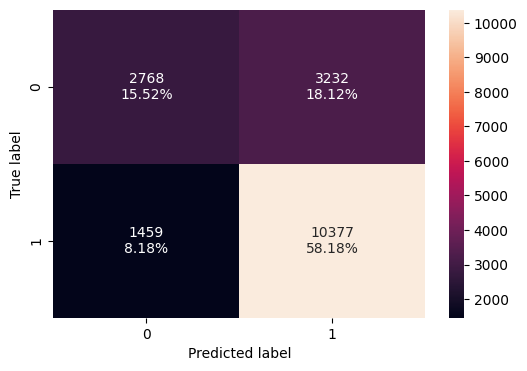

In [108]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [109]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.73699 0.87673    0.76251 0.81564

**Test set performance**

> We have to first drop the columns from the test set that were dropped from the training set.

In [110]:
X_test2 = X_test[list(X_train2.columns)]

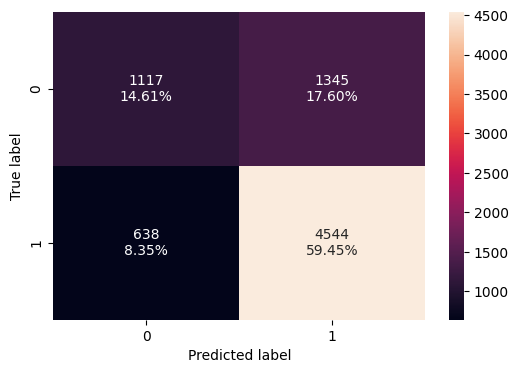

In [111]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [112]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.74058 0.87688    0.77161 0.82088

> 1. The model f1_score  ~0.816 and ~0.821 on the train and test sets respectively.
> 2. As the train and test performances are comparable, the model is not overfitting
> 3. Moving forward we will try to improve the performance of the model

## Model Performance Improvement

> 1. Let's see if the f1_score can be improved further by changing the model threshold
> 2. First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
> 3. Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

ROC-AUC on training set

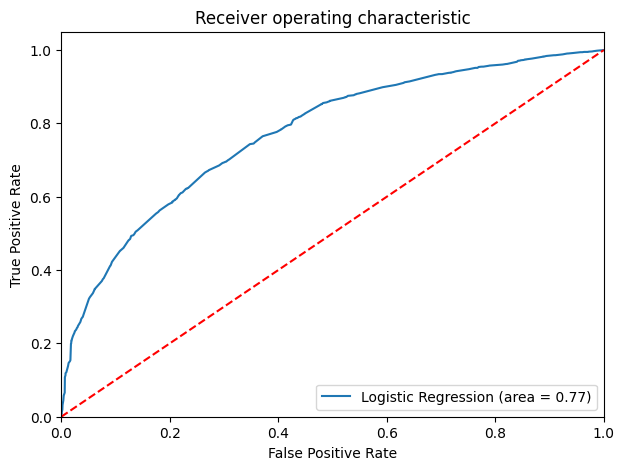

In [113]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

> Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [114]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6972487588268409


**Checking model performance on training set**

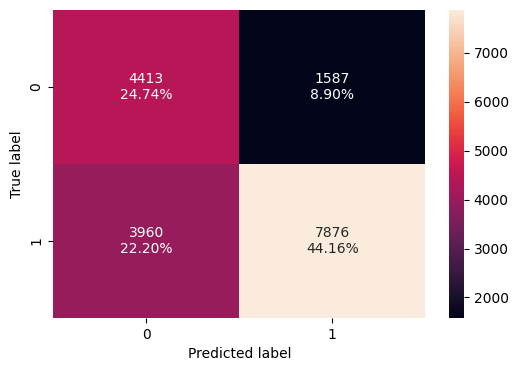

In [115]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [116]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.68900 0.66543    0.83229 0.73957

> On the training data: 
> 1. F1, Accuracy and Recall of model has decreased. Precision increased.
> 2. We can try to improve the model

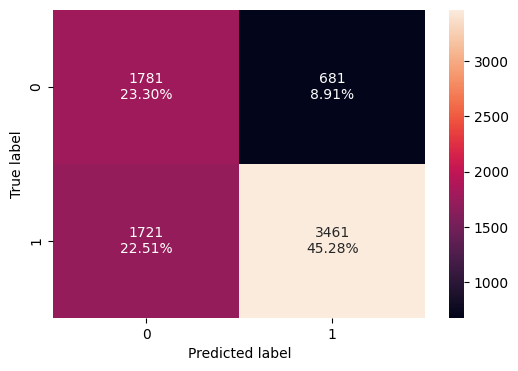

In [117]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [118]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.68577 0.66789    0.83559 0.74239

> The F1 score, recall and accuracy decreased, wherey Precision increased

### Precision-Recall Curve

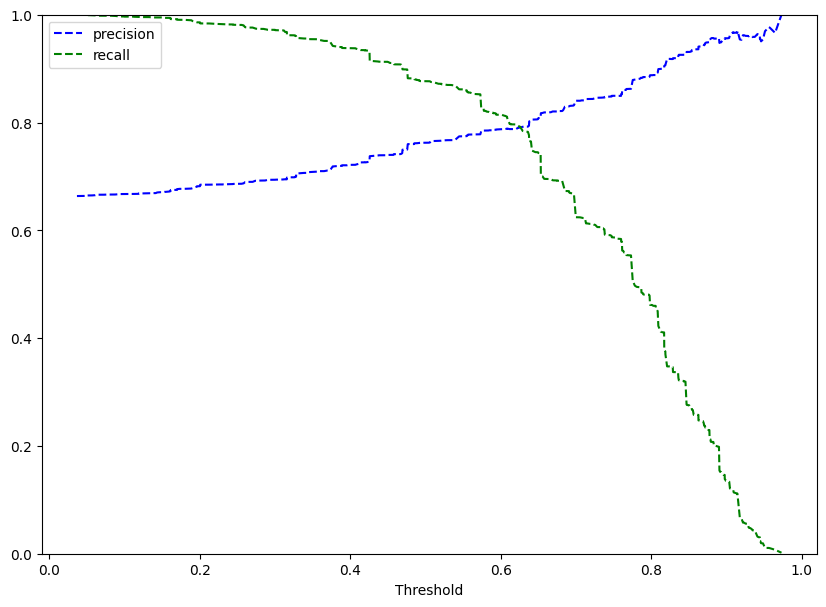

In [119]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

> At the threshold of ~0.65, we get balanced recall and precision.

In [120]:
# setting the threshold
optimal_threshold_curve = 0.65

**Checking model performance on training set**

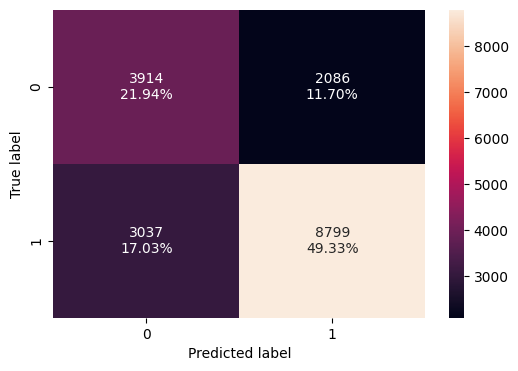

In [121]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [122]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.71277 0.74341    0.80836 0.77453

**Checking model performance on test set**

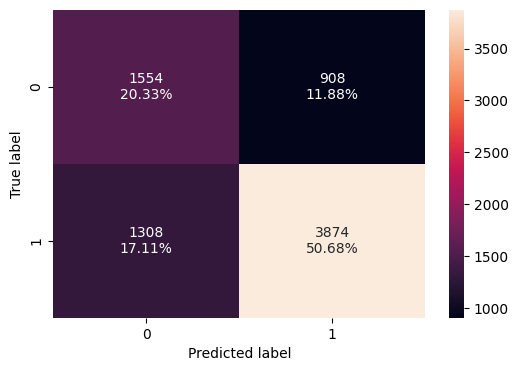

In [123]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [124]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.71010 0.74759    0.81012 0.77760

> The precision recall curve performs better than the AUC-ROC curve

## Model Performance Comparison and Final Model Selection

In [125]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.73699   
Recall                                         0.87673   
Precision                                      0.76251   
F1                                             0.81564   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.68900   
Recall                                0.66543   
Precision                             0.83229   
F1                                    0.73957   

           Logistic Regression-0.41 Threshold  
Accuracy                              0.71277  
Recall                                0.74341  
Precision                             0.80836  
F1                                    0.77453

In [126]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.697 Threshold",
    "Logistic Regression-0.65 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.74058   
Recall                                         0.87688   
Precision                                      0.77161   
F1                                             0.82088   

           Logistic Regression-0.697 Threshold  \
Accuracy                               0.68577   
Recall                                 0.66789   
Precision                              0.83559   
F1                                     0.74239   

           Logistic Regression-0.65 Threshold  
Accuracy                              0.71010  
Recall                                0.74759  
Precision                             0.81012  
F1                                    0.77760

> All the three models are performing well on both training and test data without the problem of overfitting
> The model with a a threshold of 0.5 (the default threshold) is giving the best F1 score. This is the best model using this approach.

Now we will build Decision Trees and compare its results to the logistic regression results to determine the best model

## Final Model Summary

* We have been able to build a predictive model that can be used by EasyVisa to predict visa certifications with an f1_score of ~0.82 on the training and test set.

* All the logistic regression models have given a generalized performance on the training and test set.

* The following coefficients if increased will increase the chances of a work visa certification. 
> `Coefficient of continent_Europe`, `education_of_employee_Doctorate`, `education_of_employee_Master's`, `has_job_experience_Y`,`region_of_employment_Midwest`, `region_of_employment_Northeast`, `region_of_employment_South`, `unit_of_wage_Month`, `unit_of_wage_Week`, `unit_of_wage_Year`, `full_time_position_Y`

* The following coefficients if increased will decrease the chances of a work visa certification.
> `continent_Asia`, `continent_North America`,`continent_South America`, `education_of_employee_High School`d.

## Building a Decision Tree model

In [127]:
# specifying the independent  and dependent variables
X = df1.drop(["case_status"], axis=1)
Y = df1["case_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True, dtype = int)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [128]:
# Checking that sll variables are numeric for the model to run
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              25480 non-null  float64
 1   no_of_employees                    25480 non-null  int64  
 2   yr_of_estab                        25480 non-null  int64  
 3   prevailing_wage                    25480 non-null  float64
 4   continent_Asia                     25480 non-null  int32  
 5   continent_Europe                   25480 non-null  int32  
 6   continent_North America            25480 non-null  int32  
 7   continent_Oceania                  25480 non-null  int32  
 8   continent_South America            25480 non-null  int32  
 9   education_of_employee_Doctorate    25480 non-null  int32  
 10  education_of_employee_High School  25480 non-null  int32  
 11  education_of_employee_Master's     25480 non-null  int

In [129]:
# Checking the shape of the training and test data to ensure that they have the same distribution of 1's and 0's
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 22)
Shape of test set :  (7644, 22)
Percentage of classes in training set:
case_status
1   0.66360
0   0.33640
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1   0.67792
0   0.32208
Name: proportion, dtype: float64


### Decision Tree Default

In [130]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

> We are interested in the model which gives us the largest F1 score so as to reduce the both Precision and Recall to ensure we do not deny excellent candidates from a work visa and from recommending a work visa to someone who is not suitable for the position.

In [131]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [132]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

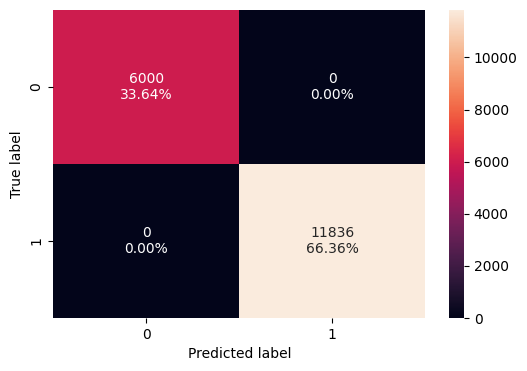

In [133]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [134]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

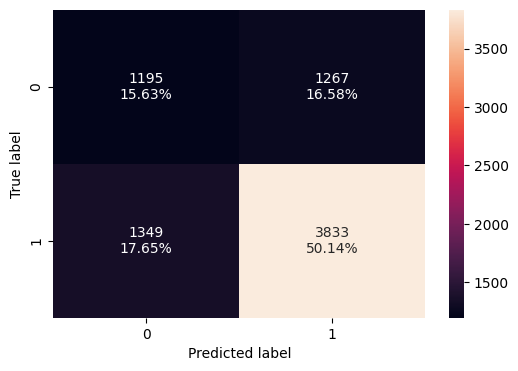

In [135]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [136]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.65777 0.73968    0.75157 0.74557

> This model is overfitting

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [137]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

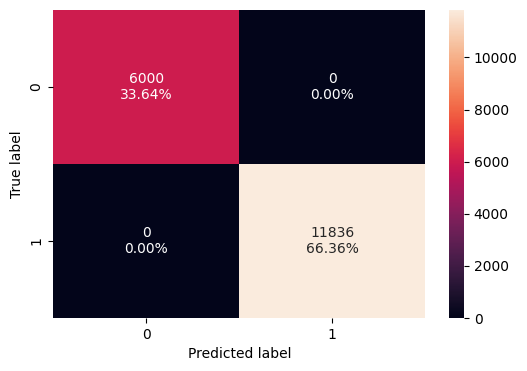

In [138]:
confusion_matrix_sklearn(model, X_train, y_train)

In [139]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

> 1. The model classifies almost perfectly on the training data, with very minimal errors in the False Positives and False Negatives (less than 1%)
> 2. As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
> 3. This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

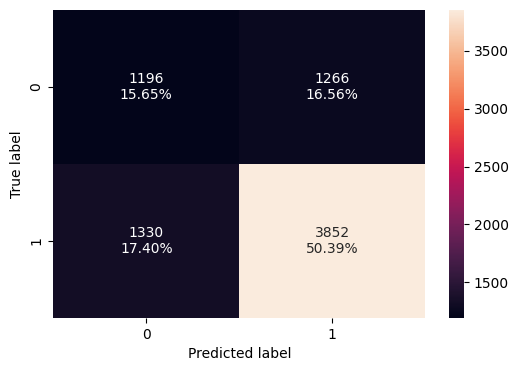

In [140]:
confusion_matrix_sklearn(model, X_test, y_test)

In [141]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.66039 0.74334    0.75264 0.74796

> As expected, the performance measurements reduced accross all 4 measurements: Accuracy, Recall, Precision and F1.  Although these as good results, we still conculde the model is overfitting because it was 100% on the training data and approx. 25% less on the test data 

**Let's use pruning techniques to try and reduce overfitting.**

## Do we need to prune the tree? YES

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [142]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

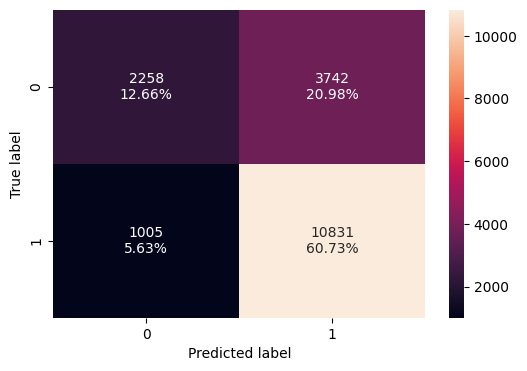

In [143]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [144]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.73385 0.91509    0.74322 0.82025

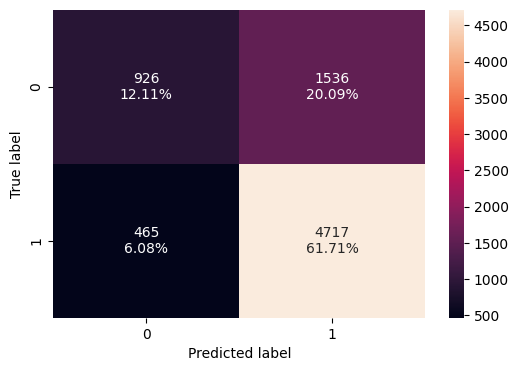

In [145]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [146]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.73823 0.91027    0.75436 0.82501

> 1. The model is more generalized now as we can see from the results on the training data.
> 2. The model is no longer overfitting

In [147]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

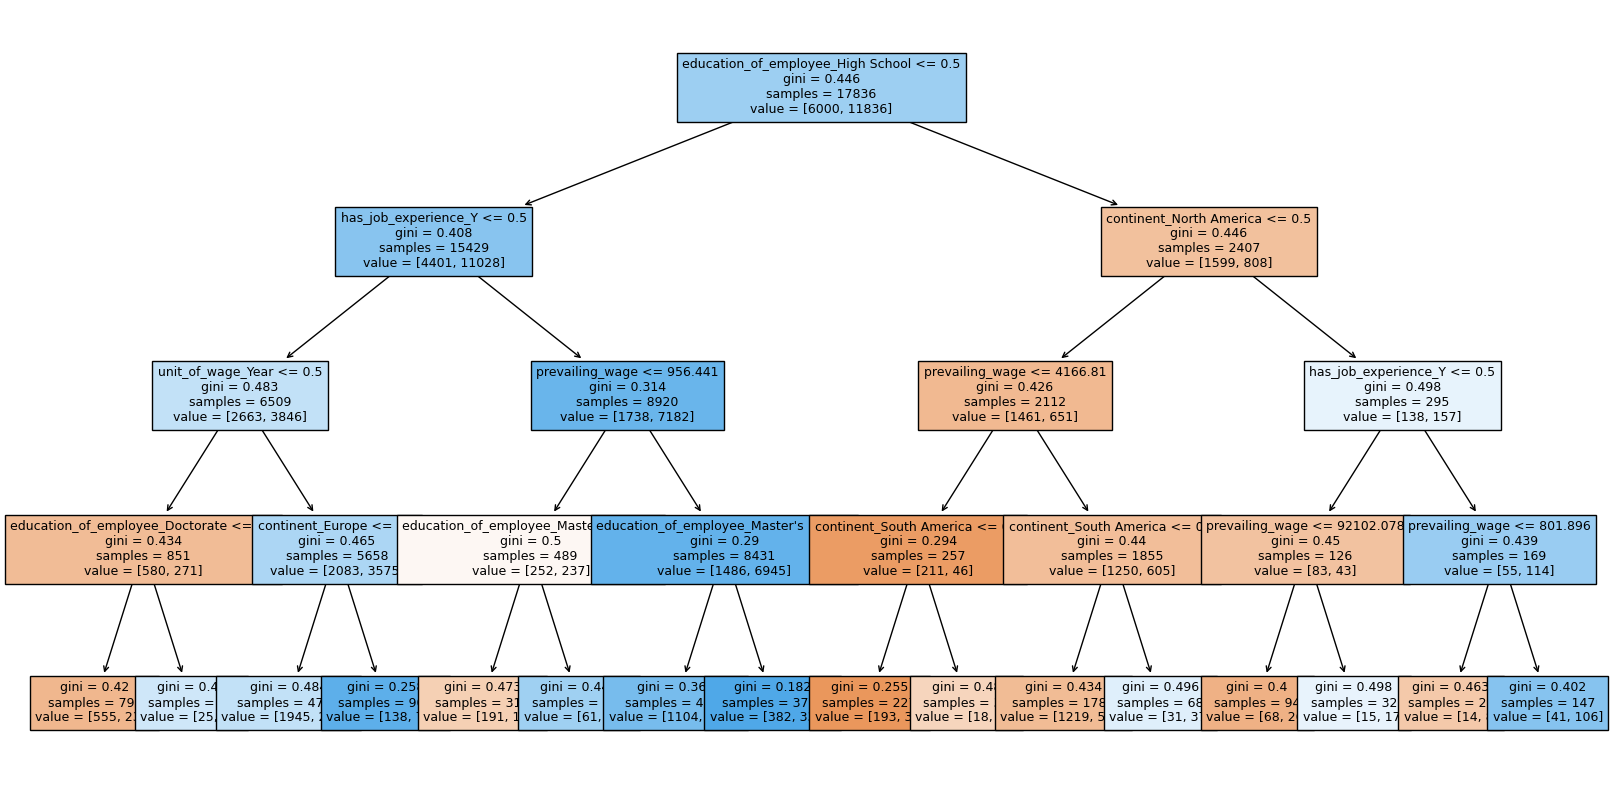

In [148]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [149]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- unit_of_wage_Year <= 0.50
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- weights: [555.00, 238.00] class: 0
|   |   |   |--- education_of_employee_Doctorate >  0.50
|   |   |   |   |--- weights: [25.00, 33.00] class: 1
|   |   |--- unit_of_wage_Year >  0.50
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- weights: [1945.00, 2808.00] class: 1
|   |   |   |--- continent_Europe >  0.50
|   |   |   |   |--- weights: [138.00, 767.00] class: 1
|   |--- has_job_experience_Y >  0.50
|   |   |--- prevailing_wage <= 956.44
|   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |--- weights: [191.00, 119.00] class: 0
|   |   |   |--- education_of_employee_Master's >  0.50
|   |   |   |   |--- weights: [61.00, 118.00] class: 1
|   |   |--- prevailing_wage >  956.44
|   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |---

**Observations from the pre-pruned tree:**

>Using the above extracted decision rules we can make interpretations from the decision tree model like:
> * If the `education_of_employee_High School` is less than or equal to 0.05, the `has_job_experience_Y` is less than or equal to 0.5, the `unit_of_wage_Year ` is less than or equal to 0.50, the `education_of_employee_Doctorate ` is greater than 0.5 then the visa application will most likely be certified.
> *  **Interpretations from other decision rules can be made similarly**

**** Looking at which features contributed the most to the model in pre-pruning

In [150]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.08448999, 0.        ,
       0.06825831, 0.01768688, 0.        , 0.0068286 , 0.0053212 ,
       0.40757552, 0.06456235, 0.24630163, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09897552, 0.        ])

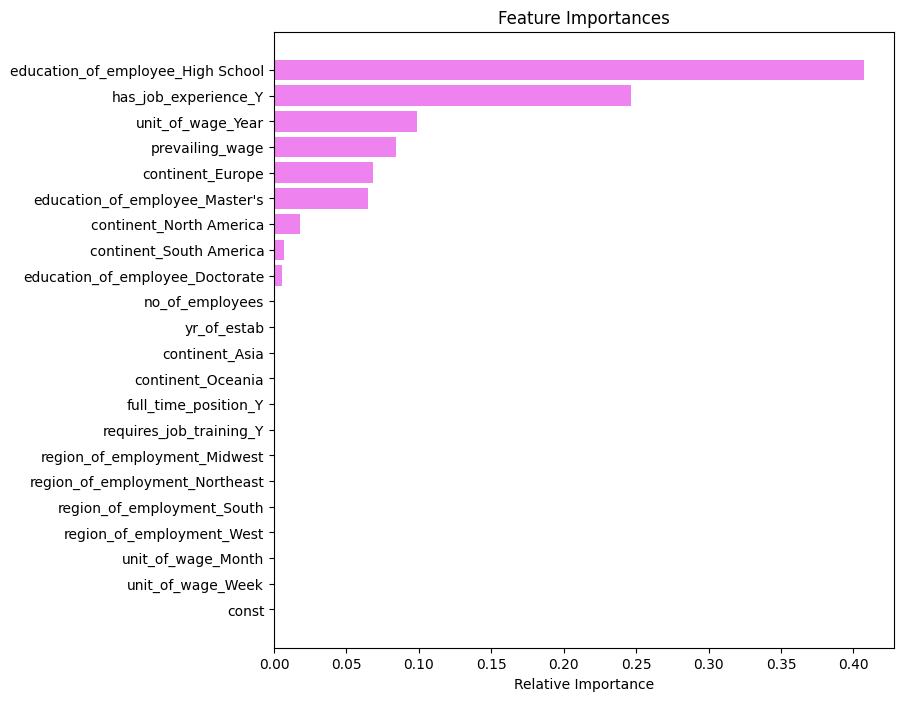

In [151]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

> In the pre pruned decision tree `education_of_employee_High School` and `has_job_experience_Y`, `unit_of_wage_Year `, `prevailing_wage` and `continent_europe` are the top 5 most important features

### Decision Tree (Post pruning)

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [152]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [153]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000    -0.00000
1        0.00000    -0.00000
2        0.00000    -0.00000
3        0.00000    -0.00000
4        0.00000    -0.00000
...          ...         ...
2253     0.00702     0.42032
2254     0.00795     0.42826
2255     0.00975     0.43801
2256     0.02674     0.46475
2257     0.03525     0.50000

[2258 rows x 2 columns]

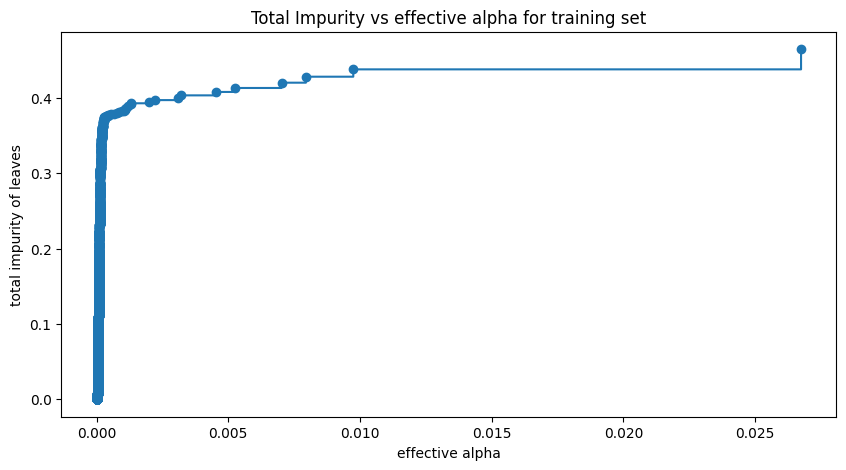

In [154]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We see that as effective alpha increases, so does impurity of the leaves, this is becuase the tree is becoming less complex.

> Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [155]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.035245852661076826


> For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

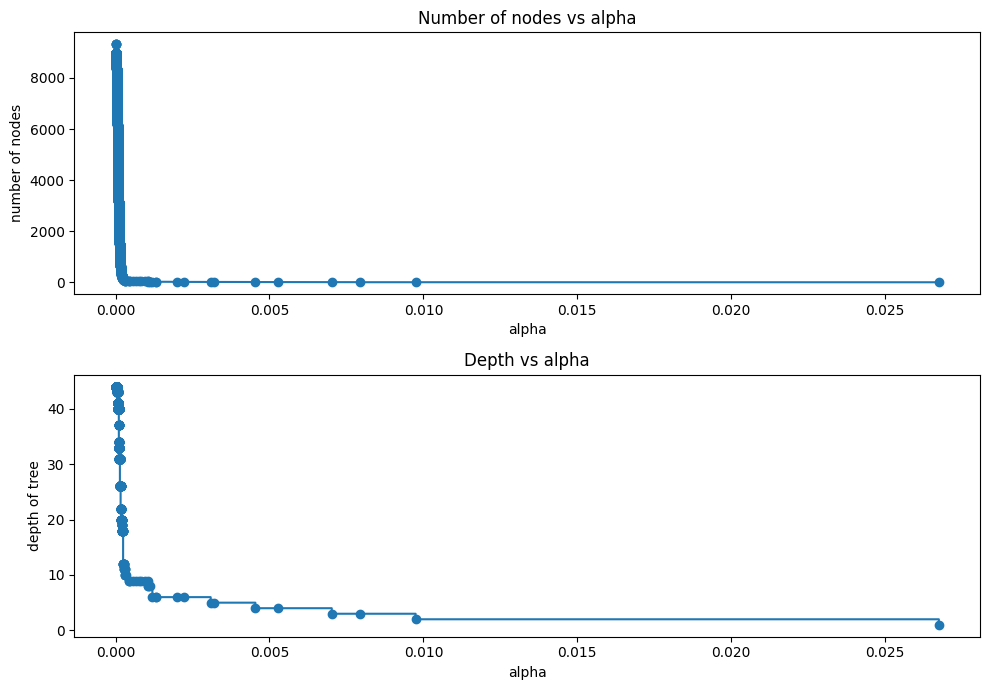

In [156]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

> We see that as alpha increases the depth of the tree decreases (the tree gets smaller) and the number of nodes decreases.  

In [157]:
# Calculating the f1 score on the training dataset for every training tree created above
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [158]:
# Calculating the f1 score on the testing dataset
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [159]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

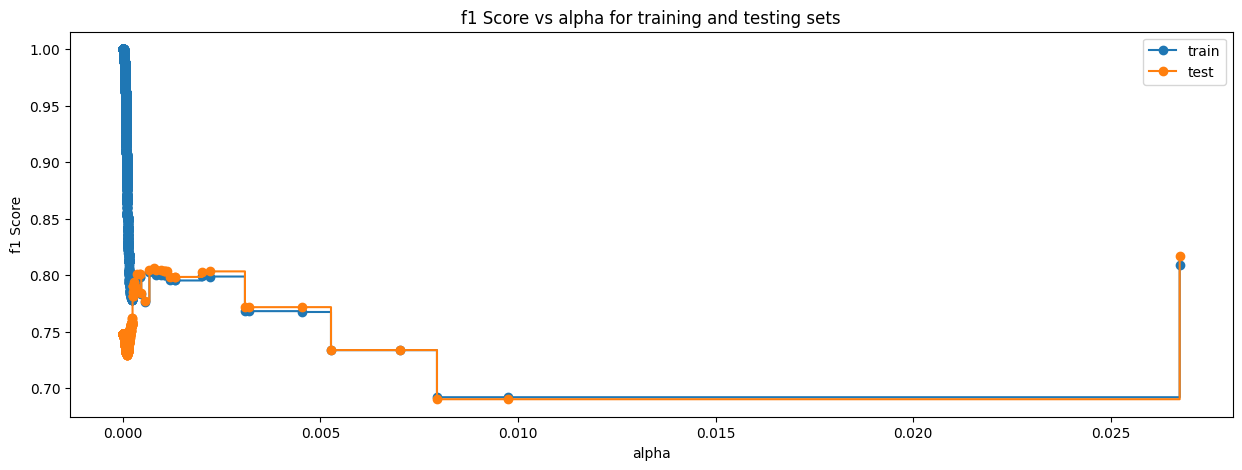

In [160]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1 Score")
ax.set_title("f1 Score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

> 1. We see that as alpha increases the training f1 scores decreases, this is expected because the tree becomes smaller.  However at greater than 0.025 alpha value the f1 score for both the training and test data increased
> 2. We see that as alpha increased the f1 score increased and then decreased for the test data.

In [161]:
# creating the model where we get highest train and test f1 score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.02674334382689947, class_weight='balanced',
                       random_state=1)


In [162]:
np.argmax(f1_test)

2256

In [163]:
# checking the f1 score for the best model
print (f1_test[2256])

0.817065944298654


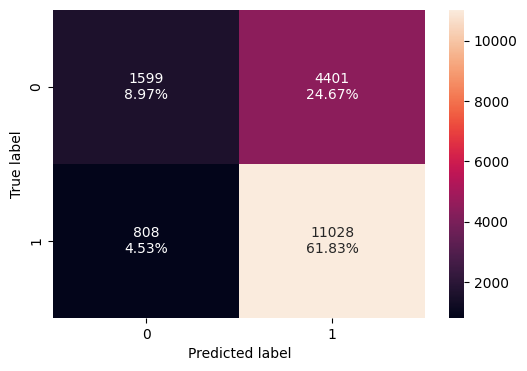

In [164]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [165]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.70795 0.93173    0.71476 0.80895

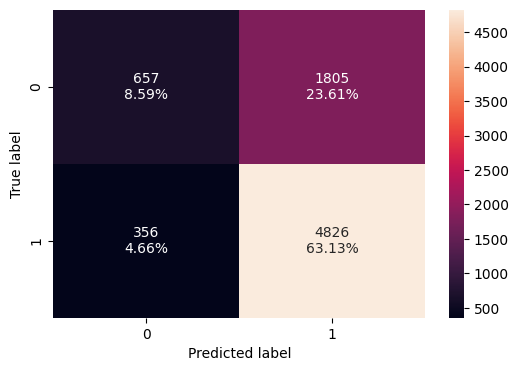

In [166]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [167]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.71729 0.93130    0.72779 0.81707

> In the post-pruned tree also, the model is giving a generalized result since the f1 scores on the train set is 0.808 and test data  is 0.817 which shows that the model is able to generalize well on unseen data.

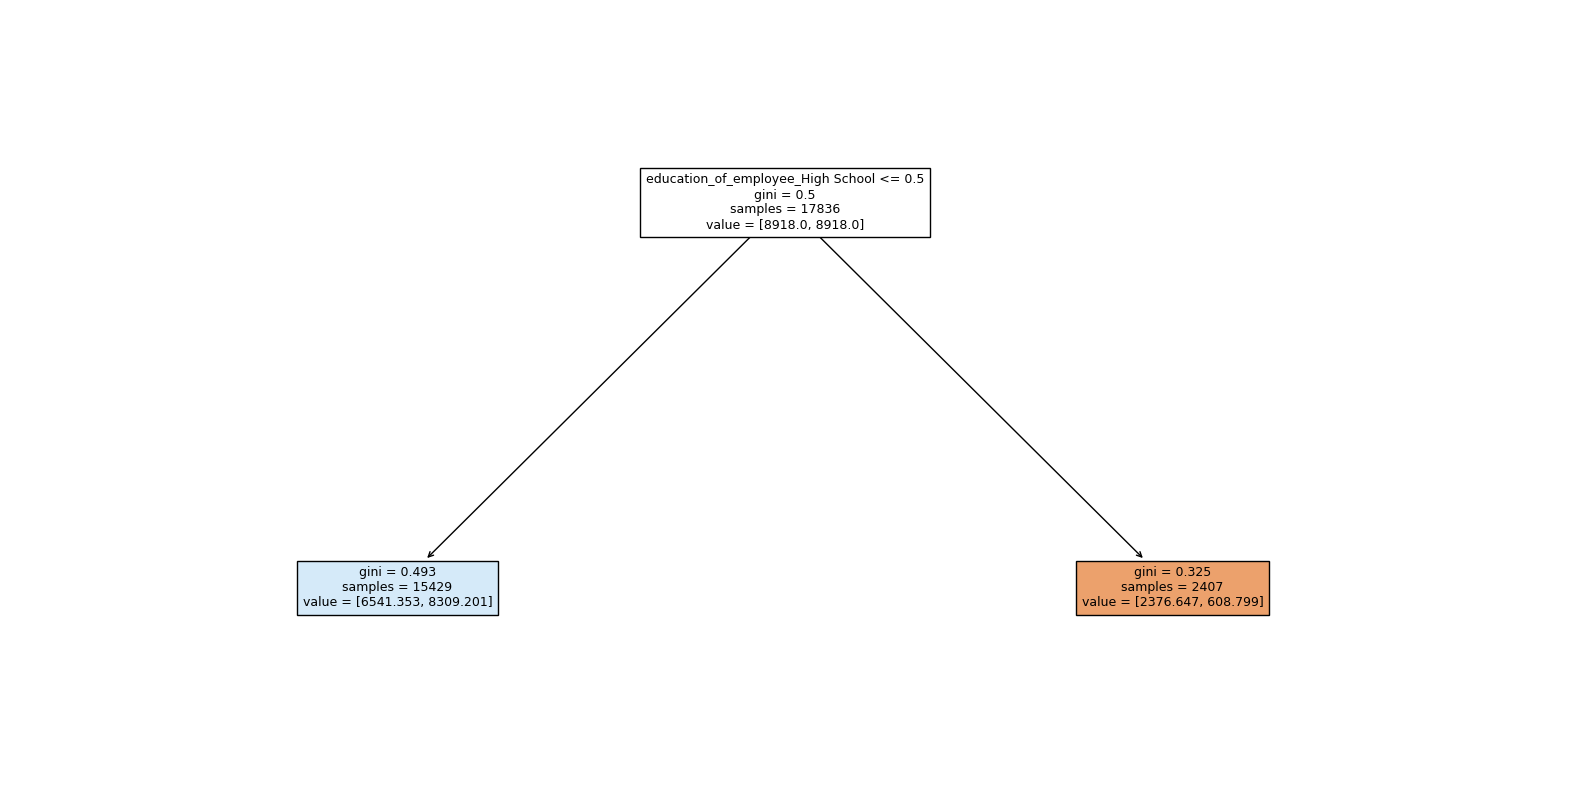

In [168]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [169]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- weights: [6541.35, 8309.20] class: 1
|--- education_of_employee_High School >  0.50
|   |--- weights: [2376.65, 608.80] class: 0



In [170]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

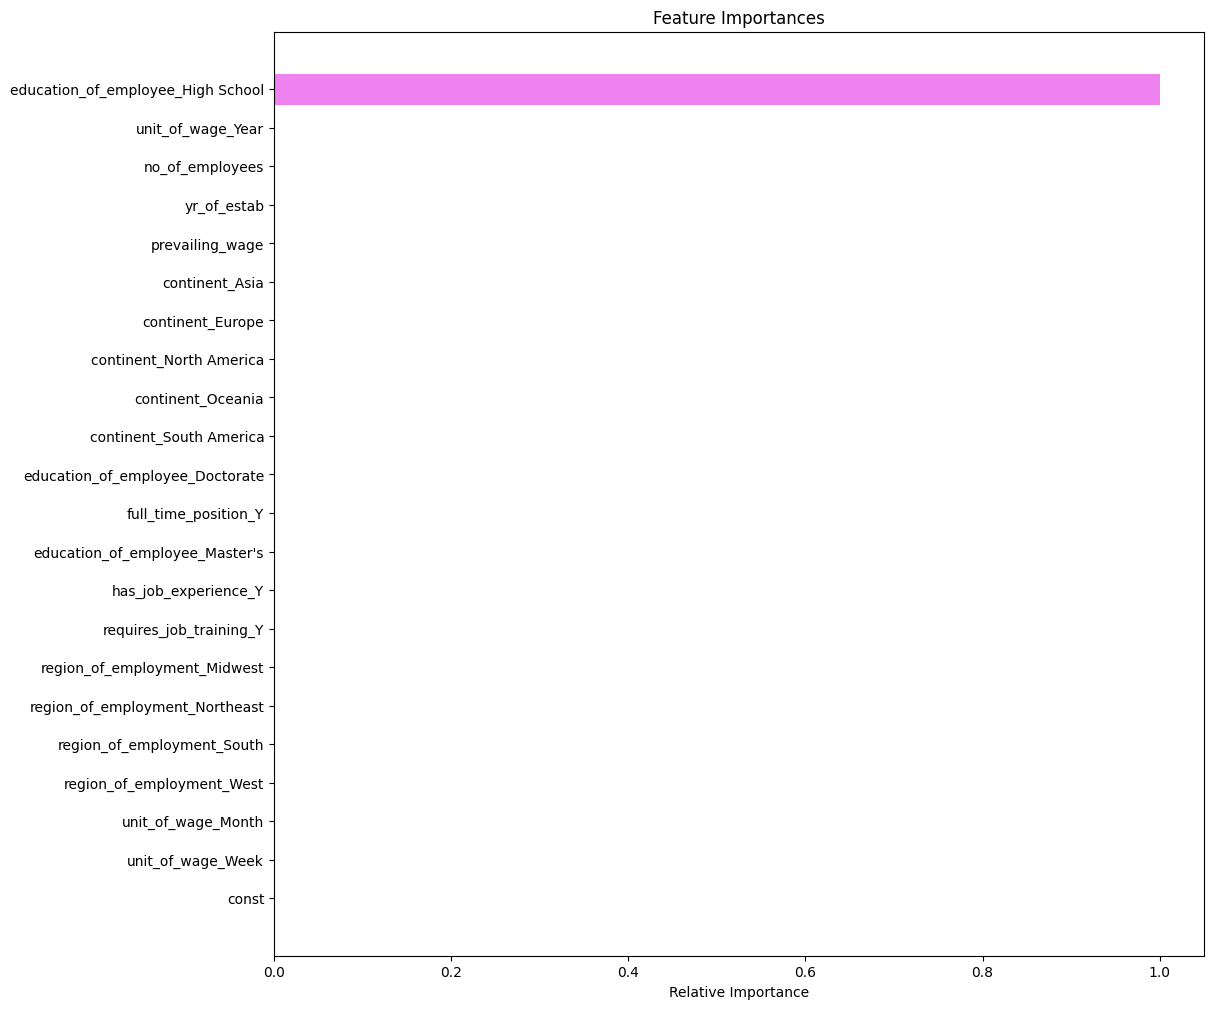

In [171]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

> Our post pruning decision tree shows that only education_of_employee_High_school is important to determine of the visa will be certified.  It appears that agressive pruning lead to an oversimplification of the model which maintained critical decision tree paths.  We could adjust the ccp=alpha scores to approx 0.0025 where the model is not as simplified but not overfitting

## Model Performance Comparison

In [172]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              1.00000   
Recall                                1.00000   
Precision                             1.00000   
F1                                    1.00000   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           1.00000                      0.73385   
Recall                             1.00000                      0.91509   
Precision                          1.00000                      0.74322   
F1                                 1.00000                      0.82025   

           Decision Tree (Post-Pruning)  
Accuracy                        0.70795  
Recall                          0.93173  
Precision                       0.71476  
F1                              0.80895

In [173]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.65777   
Recall                                0.73968   
Precision                             0.75157   
F1                                    0.74557   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.66039                      0.73823   
Recall                             0.74334                      0.91027   
Precision                          0.75264                      0.75436   
F1                                 0.74796                      0.82501   

           Decision Tree (Post-Pruning)  
Accuracy                        0.71729  
Recall                          0.93130  
Precision                       0.72779  
F1                              0.81707

> 1. Decision tree models with pre-pruning and post-pruning both are giving equally high F1 scores on both training and test sets.
> 2. The best f1 scores are in the decision tree with pre pruning, this also gave the best precision and accuracy.
> 3. For the decision tree we will choose the pre pruning method

**Comparing the results of Logistic Regression and Decision Trees**

In [174]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.697 Threshold",
    "Logistic Regression-0.65 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.74058   
Recall                                         0.87688   
Precision                                      0.77161   
F1                                             0.82088   

           Logistic Regression-0.697 Threshold  \
Accuracy                               0.68577   
Recall                                 0.66789   
Precision                              0.83559   
F1                                     0.74239   

           Logistic Regression-0.65 Threshold  
Accuracy                              0.71010  
Recall                                0.74759  
Precision                             0.81012  
F1                                    0.77760

> 1. We previously determined that the model with a a threshold of 0.5 (the default Threshold) is giving the best F1 score. This is the best model using the logistic regression approach.
> 2. Comparing this to the pre pruning decision tree, we see that the pre pruning decision tree is the best method so far to get the best overall scores in f1 and the other performance measurements

## Building bagging and boosting models

In [175]:
# specifying the independent  and dependent variables
X = df1.drop(["case_status"], axis=1)
Y = df1["case_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True, dtype = int)

# splitting data in train and test sets
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)

(17836, 22) (7644, 22)


In [176]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              25480 non-null  float64
 1   no_of_employees                    25480 non-null  int64  
 2   yr_of_estab                        25480 non-null  int64  
 3   prevailing_wage                    25480 non-null  float64
 4   continent_Asia                     25480 non-null  int32  
 5   continent_Europe                   25480 non-null  int32  
 6   continent_North America            25480 non-null  int32  
 7   continent_Oceania                  25480 non-null  int32  
 8   continent_South America            25480 non-null  int32  
 9   education_of_employee_Doctorate    25480 non-null  int32  
 10  education_of_employee_High School  25480 non-null  int32  
 11  education_of_employee_Master's     25480 non-null  int

In [177]:
# Checking the shape of the training and test data to ensure that they have the same distribution of 1's and 0's
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 22)
Shape of test set :  (7644, 22)
Percentage of classes in training set:
case_status
1   0.66792
0   0.33208
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1   0.66784
0   0.33216
Name: proportion, dtype: float64


**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [178]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [179]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.66039 0.74515    0.74603 0.74559


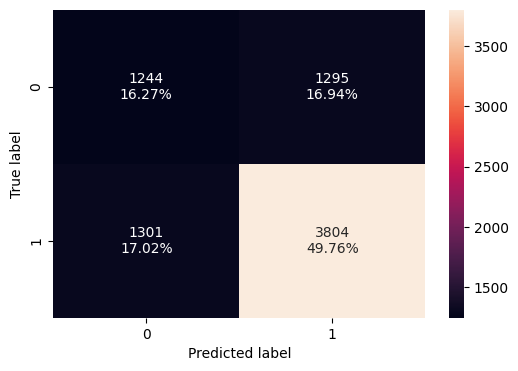

In [180]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

> The decision tree is overfitting the data

### Hyperparameter Tuning

In [181]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.71019 0.72576    0.81968 0.76987
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.70748 0.72654    0.81534 0.76839


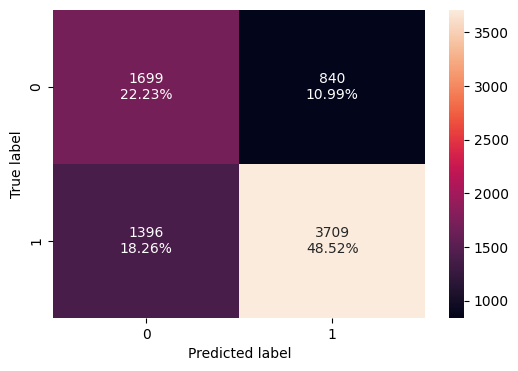

In [182]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

> 1. The tuned decision tree is no longer overfitting the data.
> 2. Let is see if we can improve the model

### Bagging Model

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.72004 0.83134    0.76842 0.79865


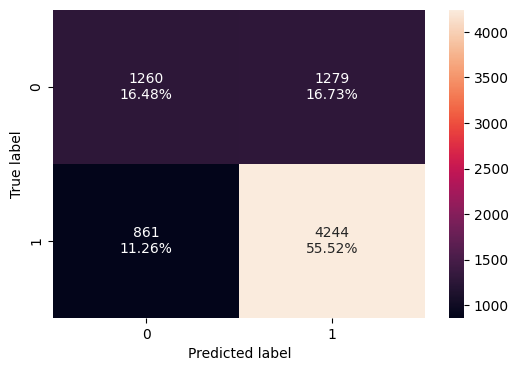

In [183]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

> 1. Random forest is is overfitting the training data.
> 2. Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Random Forest

In [184]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.67,1:0.33},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_samples=0.4,
                       n_estimators=110, oob_score=True, random_state=1)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.91730 0.97347    0.90914 0.94021
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.73221 0.86229    0.76610 0.81135


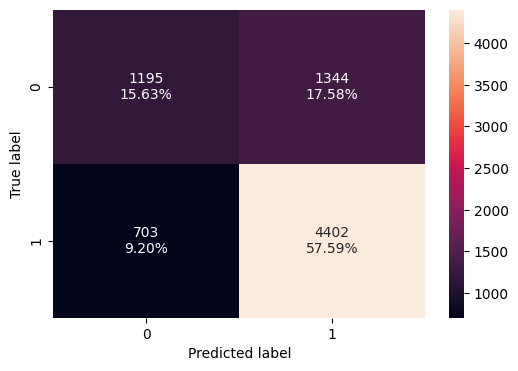

In [185]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

> 1. The overfitting has reduced and the model performance has improved.
> 2. The test recall and test f1-score have increased.

### Bagging Classifier

   Accuracy  Recall  Precision      F1
0   0.98537 0.98623    0.99181 0.98901
   Accuracy  Recall  Precision      F1
0   0.69558 0.76885    0.77386 0.77135


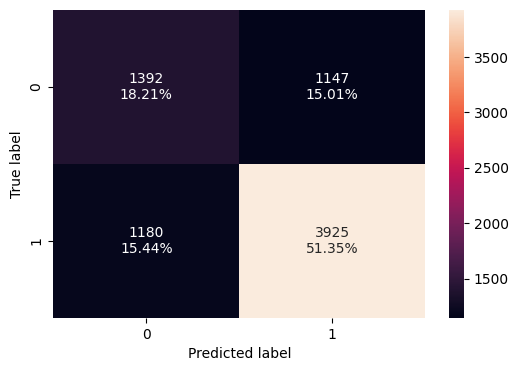

In [186]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

> 1. Bagging classifier is overfitting the training data.
> 2. Let's try a weighted bagging classifier and hyperparameter tuning and see if the model performance improves.

### Bagging Classifier with weighted decision tree

   Accuracy  Recall  Precision      F1
0   0.98301 0.98363    0.99087 0.98724
   Accuracy  Recall  Precision      F1
0   0.68878 0.75103    0.77580 0.76321


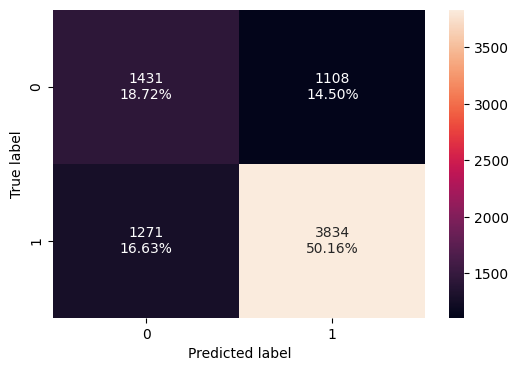

In [187]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

#Calculating different metrics
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print(bagging_wt_model_train_perf)
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt,X_test,y_test)
print(bagging_wt_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_wt,X_test,y_test)


> The weighted bagging classifier is still overfitting and the F1 has slightly decreased

### Hyperparameter Tuning

In [188]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

   Accuracy  Recall  Precision      F1
0   0.99770 0.99975    0.99682 0.99828
   Accuracy  Recall  Precision      F1
0   0.72802 0.88443    0.75200 0.81285


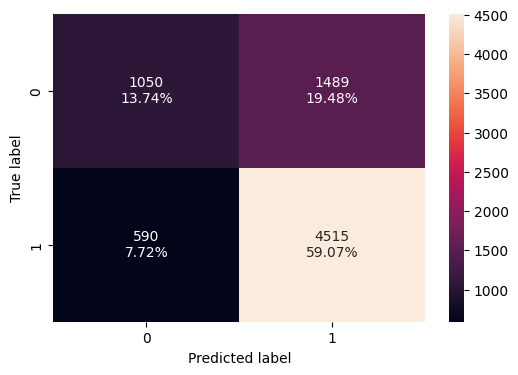

In [189]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

> 1. The model performance has increased after hyperparameter tuning.  However the model is still overfitting.
> 2. Let's try now try boosting models.

## Boosting - Model Building and Hyperparameter Tuning

In [190]:
# specifying the independent  and dependent variables
X = df1.drop(["case_status"], axis=1)
Y = df1["case_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True, dtype = int)

# splitting data in train and test sets
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)

(17836, 22) (7644, 22)


In [191]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              25480 non-null  float64
 1   no_of_employees                    25480 non-null  int64  
 2   yr_of_estab                        25480 non-null  int64  
 3   prevailing_wage                    25480 non-null  float64
 4   continent_Asia                     25480 non-null  int32  
 5   continent_Europe                   25480 non-null  int32  
 6   continent_North America            25480 non-null  int32  
 7   continent_Oceania                  25480 non-null  int32  
 8   continent_South America            25480 non-null  int32  
 9   education_of_employee_Doctorate    25480 non-null  int32  
 10  education_of_employee_High School  25480 non-null  int32  
 11  education_of_employee_Master's     25480 non-null  int

In [192]:
# Checking the shape of the training and test data to ensure that they have the same distribution of 1's and 0's
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 22)
Shape of test set :  (7644, 22)
Percentage of classes in training set:
case_status
1   0.66792
0   0.33208
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1   0.66784
0   0.33216
Name: proportion, dtype: float64


### AdaBoost Classifier

   Accuracy  Recall  Precision      F1
0   0.73806 0.88743    0.76041 0.81903
   Accuracy  Recall  Precision      F1
0   0.73299 0.88501    0.75653 0.81574


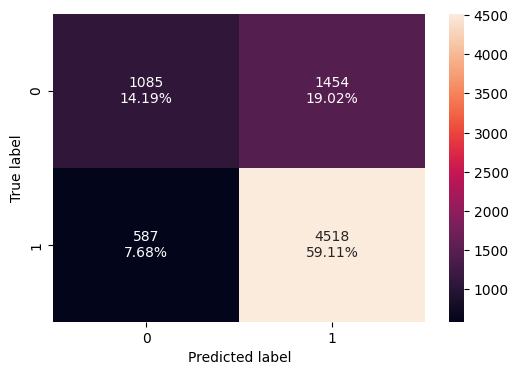

In [193]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

> 1. Adaboost is giving more generalized performance than previous models and the F1 score is comparable to the tuned bagging estimator.  This model is not overfitting
> 2. Lets try to tune the AdaBoost

### Hyperparameter Tuning - AdaBoost

In [194]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

   Accuracy  Recall  Precision      F1
0   0.75314 0.88819    0.77505 0.82777
   Accuracy  Recall  Precision      F1
0   0.74084 0.88188    0.76565 0.81966


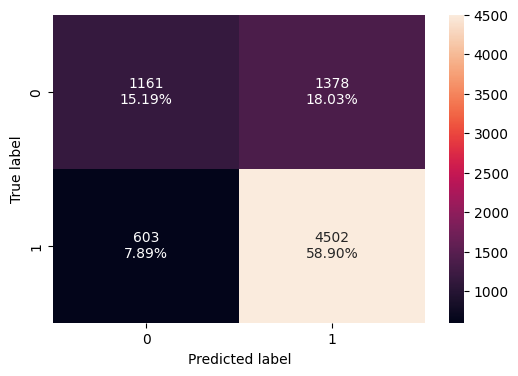

In [195]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

> The model performance has increased slightly with tuning.

### Gradient Boosting Classifier

Training performance:
    Accuracy  Recall  Precision      F1
0   0.75942 0.88290    0.78411 0.83058
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74477 0.87346    0.77359 0.82050


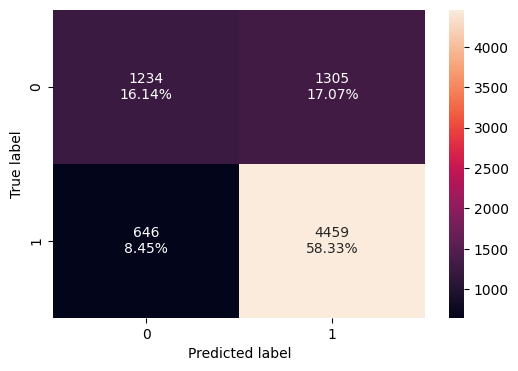

In [196]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

> 1. The gradient boosting classifier is performing slightly better in F1 score compared to AdaBoost Tuned.
> 2. Let's tune the GradientBoost

### Hyperparameter Tuning - Gradient Boosting Classifier

In [197]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.75471 0.88584    0.77779 0.82830
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74333 0.88012    0.76895 0.82079


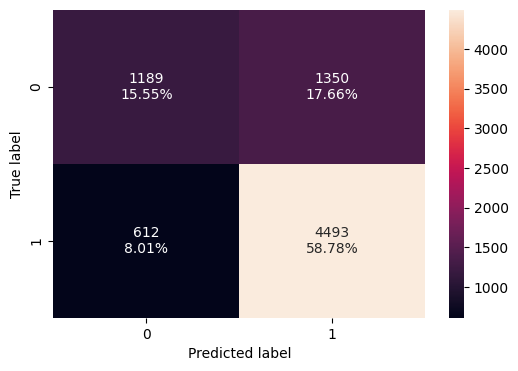

In [198]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

> The tuned Gradient Boost is performing slightly better than Adaboost and is not overfitting

### XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision      F1
0   0.84357 0.93108    0.84925 0.88828
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.72855 0.85504    0.76579 0.80796


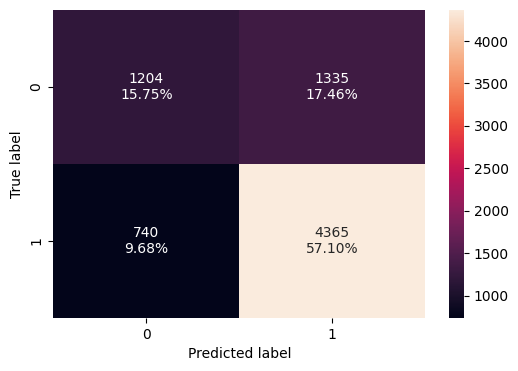

In [199]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

> 1. xgboost classifier is performing well but not as good as the GradientBoost Classifier Tuned
> 2. Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning - XGBoost Classifier

In [200]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.76183 0.88760    0.78425 0.83273
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74568 0.87796    0.77236 0.82178


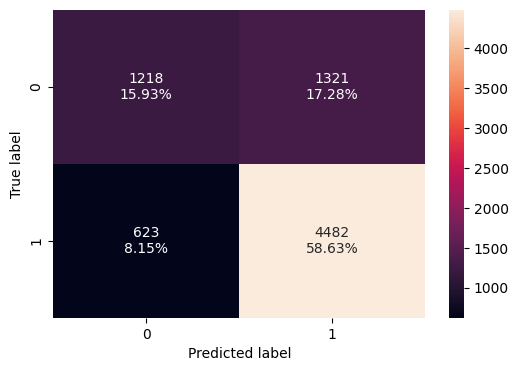

In [201]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

> This model gives the best F1 score so far but it is time and resoiurce intensive

## Stacking Model

In [202]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_samples=0.4,
                                                       n_estimators=110,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
                                DecisionTreeClas...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy  Recall  Precision      F1
0   0.76362 0.88827    0.78577 0.83388
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74267 0.87542    0.77052 0.81962


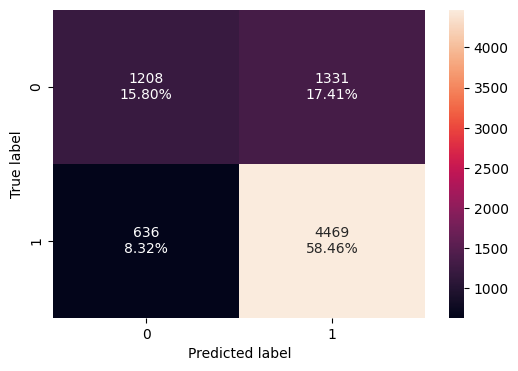

In [203]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

> The stacking classifier is giving a similar performance as compared to XGBoost and is not overfitting.

## Comparing all models

In [204]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_wt_model_train_perf.T, bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Classifer Weighted",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Decision Tree Estimator  Random Forest Estimator  \
Accuracy         1.00000                  0.71019                  1.00000   
Recall           1.00000                  0.72576                  1.00000   
Precision        1.00000                  0.81968                  1.00000   
F1               1.00000                  0.76987                  1.00000   

           Random Forest Tuned  Bagging Classifier  \
Accuracy               0.91730             0.98537   
Recall                 0.97347             0.98623   
Precision              0.90914             0.99181   
F1                     0.94021             0.98901   

           Bagging Classifer Weighted  Bagging Estimator Tuned  \
Accuracy                      0.98301                  0.99770   
Recall                        0.98363                  0.99975   
Precision                     0.99087                  0.99682   
F1                            0.98724                  0.99828   

           Adaboost Classifier  Adabosst Classifier Tuned  \
Accuracy               0.73806                    0.75314   
Recall                 0.88743                    0.88819   
Precision              0.76041                    0.77505   
F1                     0.81903                    0.82777   

           Gradient Boost Classifier  Gradient Boost Classifier Tuned  \
Accuracy                     0.75942                          0.75471   
Recall                       0.88290                          0.88584   
Precision                    0.78411                          0.77779   
F1                           0.83058                          0.82830   

           XGBoost Classifier  XGBoost Classifier Tuned  Stacking Classifier  
Accuracy              0.84357                   0.76183              0.76362  
Recall                0.93108                   0.88760              0.88827  
Precision             0.84925                   0.78425              0.78577  
F1                    0.88828                   0.83273              0.83388

In [205]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_wt_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Classifier Weighted",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Decision Tree Estimator  Random Forest Estimator  \
Accuracy         0.66039                  0.70748                  0.72004   
Recall           0.74515                  0.72654                  0.83134   
Precision        0.74603                  0.81534                  0.76842   
F1               0.74559                  0.76839                  0.79865   

           Random Forest Tuned  Bagging Classifier  \
Accuracy               0.73221             0.69558   
Recall                 0.86229             0.76885   
Precision              0.76610             0.77386   
F1                     0.81135             0.77135   

           Bagging Classifier Weighted  Bagging Estimator Tuned  \
Accuracy                       0.68878                  0.72802   
Recall                         0.75103                  0.88443   
Precision                      0.77580                  0.75200   
F1                             0.76321                  0.81285   

           Adaboost Classifier  Adabosst Classifier Tuned  \
Accuracy               0.73299                    0.74084   
Recall                 0.88501                    0.88188   
Precision              0.75653                    0.76565   
F1                     0.81574                    0.81966   

           Gradient Boost Classifier  Gradient Boost Classifier Tuned  \
Accuracy                     0.74477                          0.74333   
Recall                       0.87346                          0.88012   
Precision                    0.77359                          0.76895   
F1                           0.82050                          0.82079   

           XGBoost Classifier  XGBoost Classifier Tuned  Stacking Classifier  
Accuracy              0.72855                   0.74568              0.74267  
Recall                0.85504                   0.87796              0.87542  
Precision             0.76579                   0.77236              0.77052  
F1                    0.80796                   0.82178              0.81962

>Although XGBoost Classifier tuned is the best performing model, the GradientBoost Classifier tuned has very close results and better recall.  Considering that XGBoost is time and resiurce intensive, it is decided that the GradientBoost Classifier Tuned is the best model.

### Feature importance of Random Forest

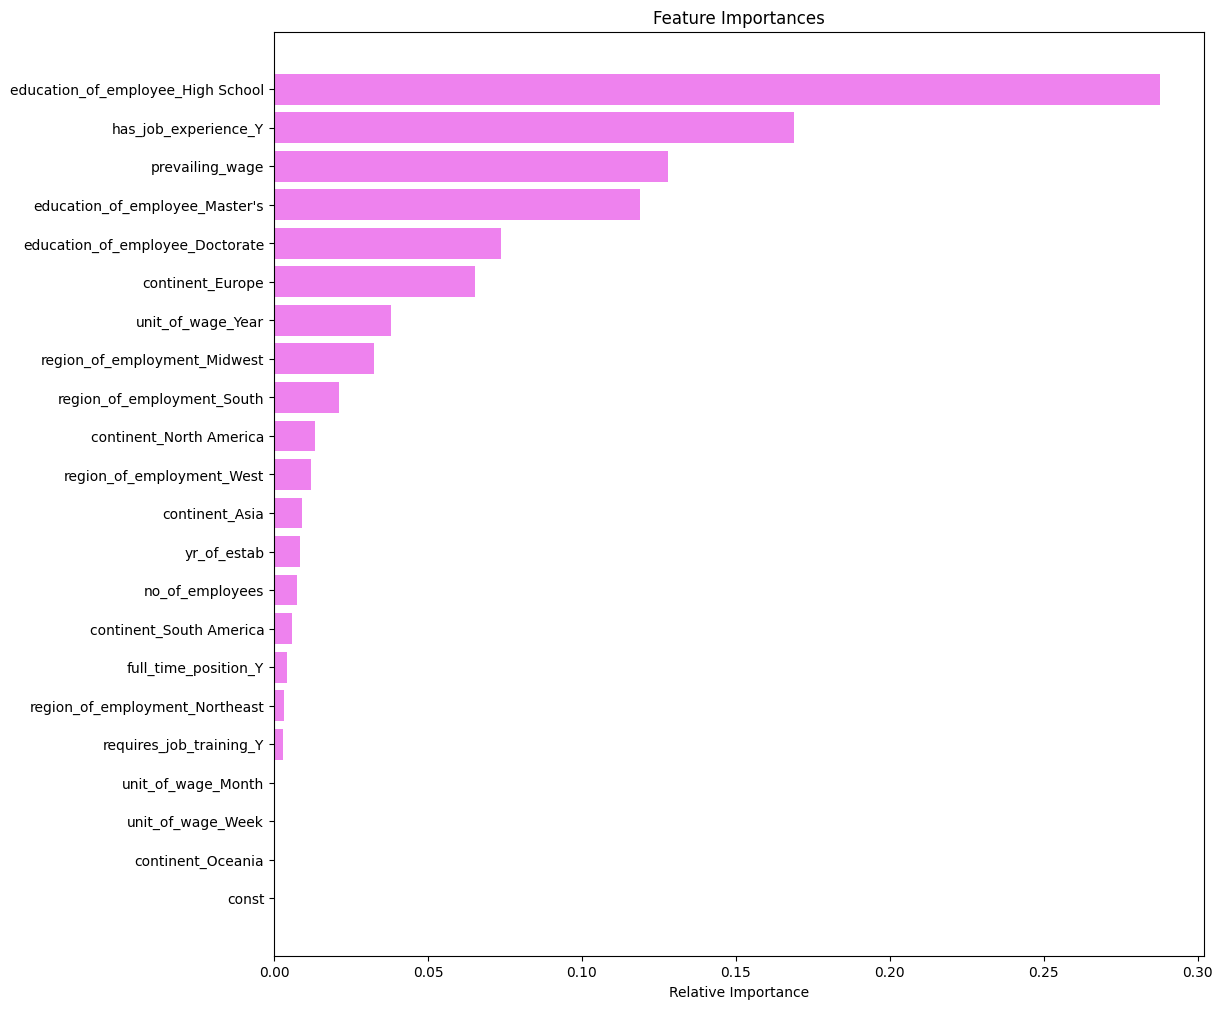

In [206]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

> The top 5 variables which are most important in the model is `education_of_employee_High School`, `has_job_experience_Y`, `prevailing_wage`, `education_of_employee_Master's` and `education_of_employee_Doctorate`

## Conclusions
> * In this analysis we created various models to assist in shortlisting the candidates having higher chances of VISA approval.  We used machine learning techniques to train a model to predict if a visa would be certified or denied.   We used logistic regression, decision trees, bagging, boosting and stacking techniques.  We used various approaches such as default thresholds, AUC-ROC curves and Precision-Recall curve to determine the best threshold for our logistic regression model.  For decision trees, we used hyperparamentes, gini impurity and CCP alpha to get the best models from the pre pruning and post pruning trees.  For Bagging and Boosting we used Decision Tree, Ramdom Forest, Bagging Classifier, AdaBoost, Gradient Boost, XGBoost.  We also utilized hyperparameter tuning and weighted models to get best model for EasyVisa.  Lastly we used the process of Stacking to combine different homogenous models to create a Meta Model to try to obtain better accuracy.
> * We decided that both False Positives and False Negatives were important to reduce as both chances of denying a visa to a suitable candidate and to approve a visa for an unsuitable candidate.  For this reason, although we measured all performance metrics:  Accuracy, Precision, Recall and F1, we aimed to maximize the F1 score as this gives the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly.  While doing this we also kept an eye on the other perfomrance metrics Accuracy, Precision and Recall values as we wanted the best model to perform well in those metrics.
> * Comparing all models, we found that the bagging and boosting models performed well compared to logistic regression and decision trees. Overall, the model with the best F1 and comparable recall, precision and accuracy was from the XGBoost Classifier Tuned, however the chosen final model was the GradientBoost Classifier Tuned Model, which has a slightly lower F1, precision and accuracy and a higher recall.  This decision was made as the XGBoost Classifier Tuned is time and resource intensive and the gain in information from the model was not that significant.
> * This modellng process can be improved by adding more data, variables and providing more information to help with outlier treatments and incorrect data. Additionally, the prevailing wage needed to be normalized to avoid having very low weekly wages. 

## Actionable Insights and Recommendations

> **We have been able to build a predictive model:**
> 1. That company can deploy to predict if a work visa application would e certified.
> 2. That company can use to recommend with visa applicaions should be processed so as to utilize time and resources effectively. 

### Insights 

>**Important Features for Visal Approval**
> 1. **Education**:  The education of the applicant is important in the visal approval process.  We see that High School level education has the least visa certifications and rate of visa certifications increses as the level of education increases.
> 2. **Job Experience**:  Those who have jobe experience have a better chance of getting their work visa certified
> 3. **Prevailing Wage**:  This can be a good indicator if the visa will be certified.  Certified visas tend to have higher prevailing wages
> 4. **Continent**:  Those from Europe had the highest rate of visa approvals whilst those from South America had the lowest certification rate
> 5. **Unit of Wage**:  Job applications with a yearly salary had better chances of visa certification

### Recommendations 
> 1. `prevailing_wage` should be standrdized so that the hourly wage is comparable with the weekly, monthly and yearly wages.
> 2. As education seems to be an important factor in visa certifications, applicants should focus on this part of the work visa process, showcasing there educational experiencces
> 3. Full time positions are more likely to be certified, companies should offer more full time positions.
> 4. Yearly wages are also more likely to be certified, companies can offer yearly wages.
> 5. Companies can provide training on filling out the work visa application to ensure that the high impact factors are addressed in the application
> 6. Companies or agents can perform targeted marketing to fill the job poisiton by focusing on the continents with higher success rates for visa certifications (Europe) and combining other high impact features such as ensuring the position is full time and have yearly wages.
> 7. Companies can use this information to tweak job offers so that the work visa will most likely be certified.
> 8. Additionally some companies or countries have a limit on the percentage of nationaities or gender of employees emlpoyed.  For example the comapny may need to fulfill a certain percentage of minorities in the workpalce or have a certian number of males and females.  This information should be considered when developing the model.
> 9. There is no information on the ethnicity/race and gender of the applicants which may affect the certification process.
> 10. Other variables can be included in the analysis such as number of years of education, wether the place of education is in a qualifying list, medical conditions of the employees, dependents and family status etc.
> 11. This model should continuously be refined and improved to with monitorning and feedback so as to improve the prediction.